In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import methyltree 
from tqdm import tqdm
import scipy.stats as stats
import scanpy as sc
import cospar as cs
import yaml
from matplotlib import cbook, cm, colors, rcParams
from datetime import datetime, timedelta
sns.set_style('white')
rcParams["axes.spines.right"] = False
rcParams["axes.spines.top"] = False
rcParams["font.size"] = 13
# %config InlineBackend.figure_format = 'svg' #'retina'         # or 'svg'
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10)

cs.settings.set_figure_params()

# 293T (Fig1,ED.Fig1)

In [2]:
data_sets = '293T'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 60; config samples: 60; merged samples: 60
Genome reference: GRCh38


In [3]:
clone_key = 'clone_id'

In [4]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/cell_type_293T_neutral_thresh_20231227_scBSseq_293T_CMY_onlymet_293T_readNcutoff_5_0.5_0.9_readcutoff3_minCov0.1_met_ExcludeSex0_clone_id.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0_clone_id', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0_clone_id', '.h5ad'].


use provided adata
adata shape:  (58, 280334)
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|██▎                                                                                                                                                                                                                                                       | 9/1000 [00:00<00:00, 1654.41it/s]


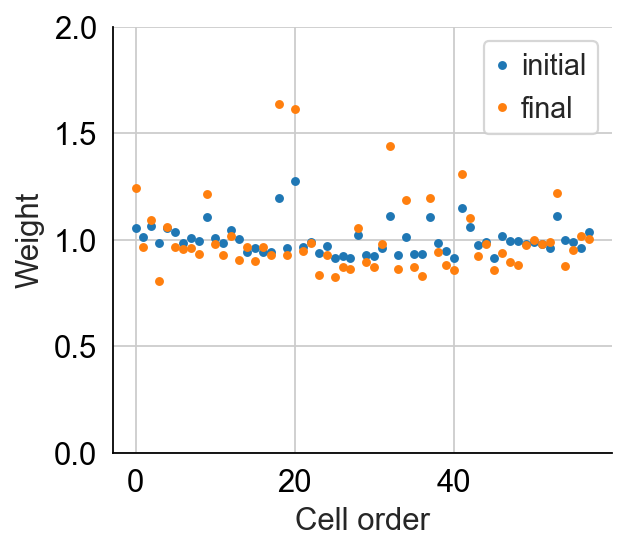

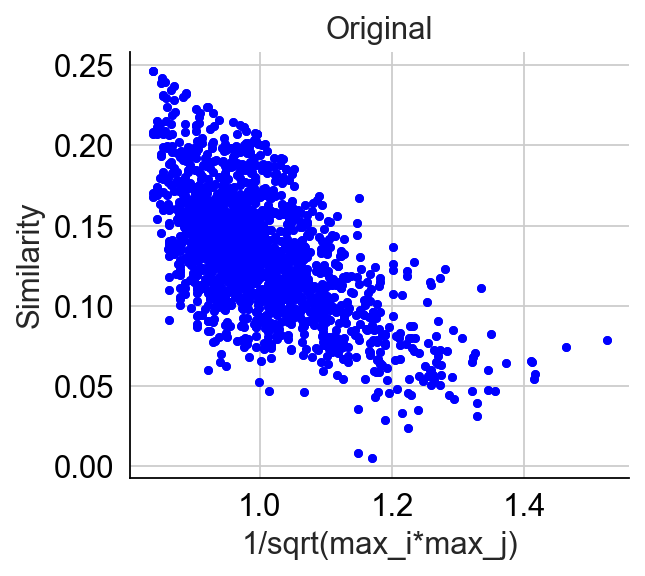

std: 0.059


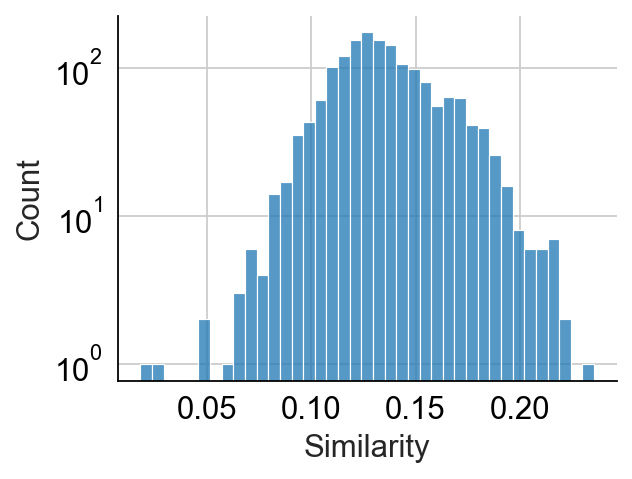

Reconstruction method: UPGMA
   clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  P10_1          11       1.0         1.0      0.0         0.0   
1   P8_1          12       1.0         1.0      0.0         0.0   
2   P8_2          11       1.0         1.0      0.0         0.0   
3   P8_3          12       1.0         1.0      0.0         0.0   
4   P9_1          12       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.163636           0.281818        0.885662           0.590909  
1         0.208333           0.266667        0.878510           0.566667  
2         0.172727           0.218182        0.924436           0.609091  
3         0.200000           0.291667        0.876755           0.558333  
4         0.175000           0.275000        0.891317           0.591667  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.2666666666666

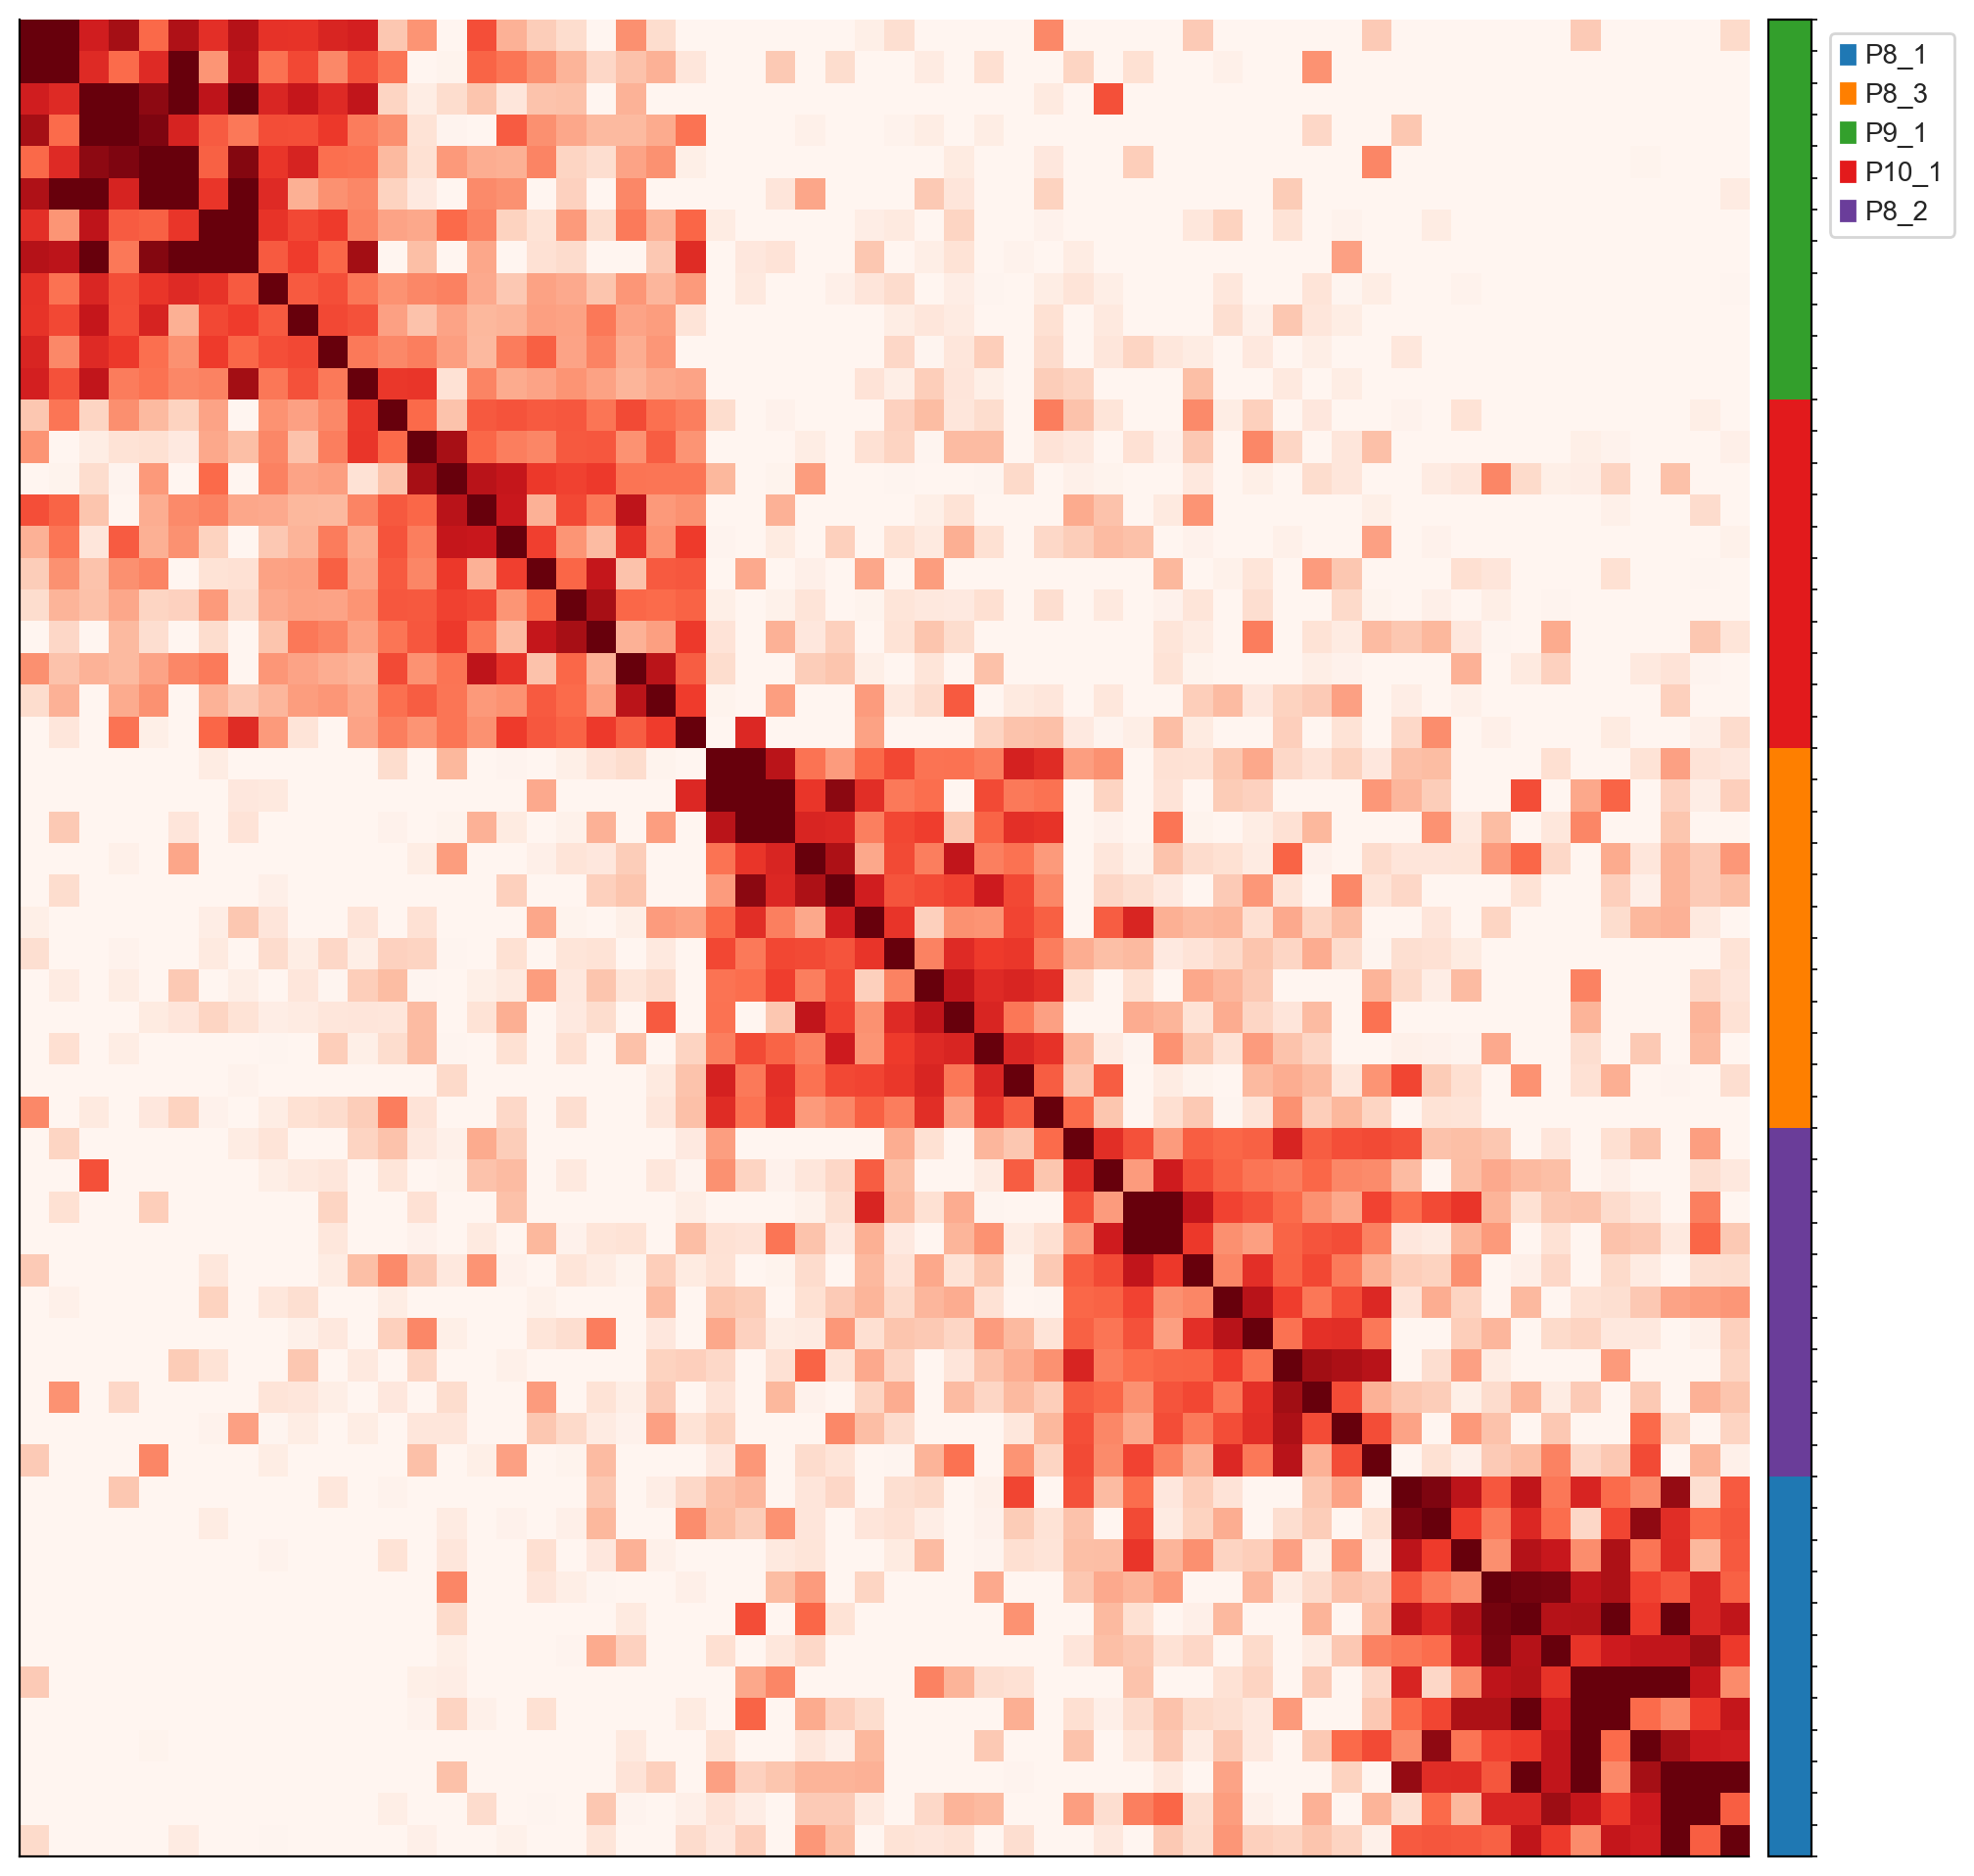

In [5]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# H9 (ED.Fig2)

In [6]:
data_sets = 'H9'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 51; config samples: 51; merged samples: 51
Genome reference: GRCh38


In [7]:
clone_key = 'Clone ID'

In [8]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/cell_type_H9_neutral_thresh_20231204_scBSseq_H9_CMY_onlymet_H9_readNcutoff_5_0.2_0.6_nomerge_readcutoff3_minCov0.1_met_ExcludeSex0_final_clone.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0_final_clone', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0_final_clone', '.h5ad'].


In [9]:
adata

AnnData object with n_obs × n_vars = 51 × 43323
    obs: 'lineage', 'nGC', 'nCG', 'cell_type', 'UMAP_rna_y', 'UMAP_rna_x', 'final_clone', 'cell', 'pass_accQC', 'pass_metQC', 'id_met', 'id_acc', 'stage', 'source', 'met_Nmet_reads', 'met_Nnonmet_reads', 'met_N_tot_reads', 'met_rate', 'corr_met', 'met_min', 'met_max', 'met_range', 'plate_ID', 'HQ', 'date', 'clone', 'Pseudo_Clone_ID', 'generation_information_from_all_the_data', 'generation_information_from_all_the_data_simple', 'new_clone', 'state_info_idx', 'time_info', 'Clone ID'
    uns: 'accuracy', 'clonal_time_points', 'clone_id', 'data_des', 'neighbors', 'order_x', 'ordered_clone_array', 'time_ordering', 'umap'
    obsm: 'X_clone', 'X_eig', 'X_emb', 'X_join_N', 'X_similarity', 'X_umap', 'X_umap_rna'
    obsp: 'connectivities', 'distances'

use provided adata
adata shape:  (51, 43323)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 273.29it/s]


duration: 0.26778602600097656
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▊                                                                                                                                                                                                                                                          | 3/1000 [00:00<00:01, 687.33it/s]


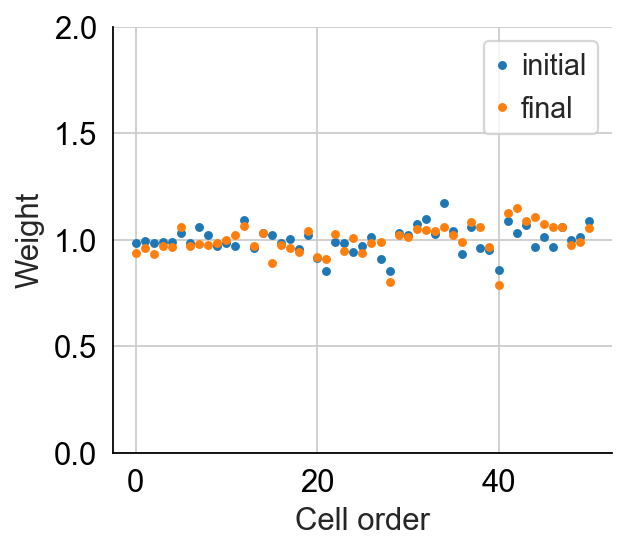

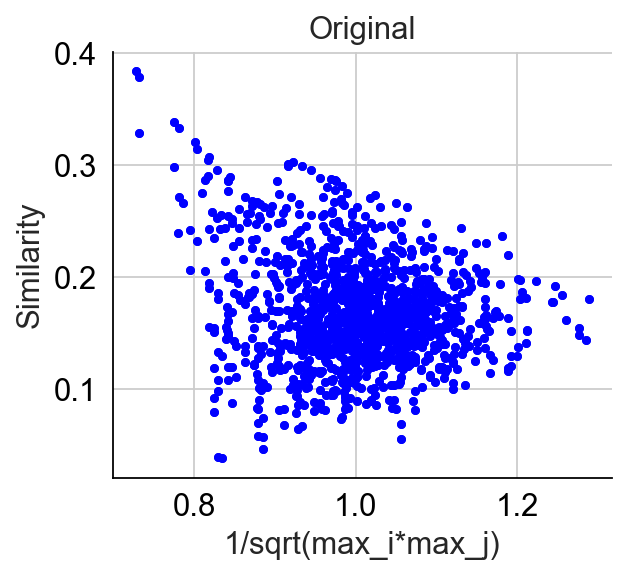

std: 0.027


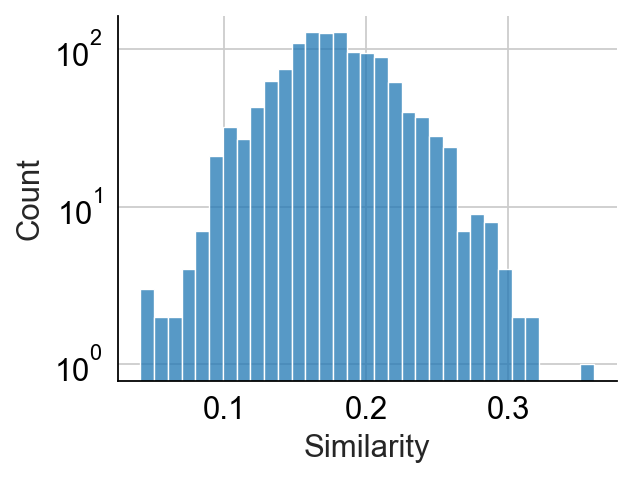

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity   entropy  wassertein  \
0     A          12  0.916667    0.916667  0.115431    0.083333   
1     B          12  1.000000    1.000000  0.000000    0.000000   
2     C          12  0.916667    0.916667  0.115431    0.083333   
3     D          10  1.000000    1.000000  0.000000    0.000000   
4     E           5  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.191667           0.283333        0.878510           0.575000  
1         0.241667           0.350000        0.829649           0.583333  
2         0.175000           0.283333        0.883159           0.583333  
3         0.210000           0.280000        0.884812           0.580000  
4         0.120000           0.260000        0.948319           0.620000  
mean continuity: 0.9666666666666666
mean accuracy: 0.9666666666666666
mean entropy: 0.0461725164735073
mean wassertein

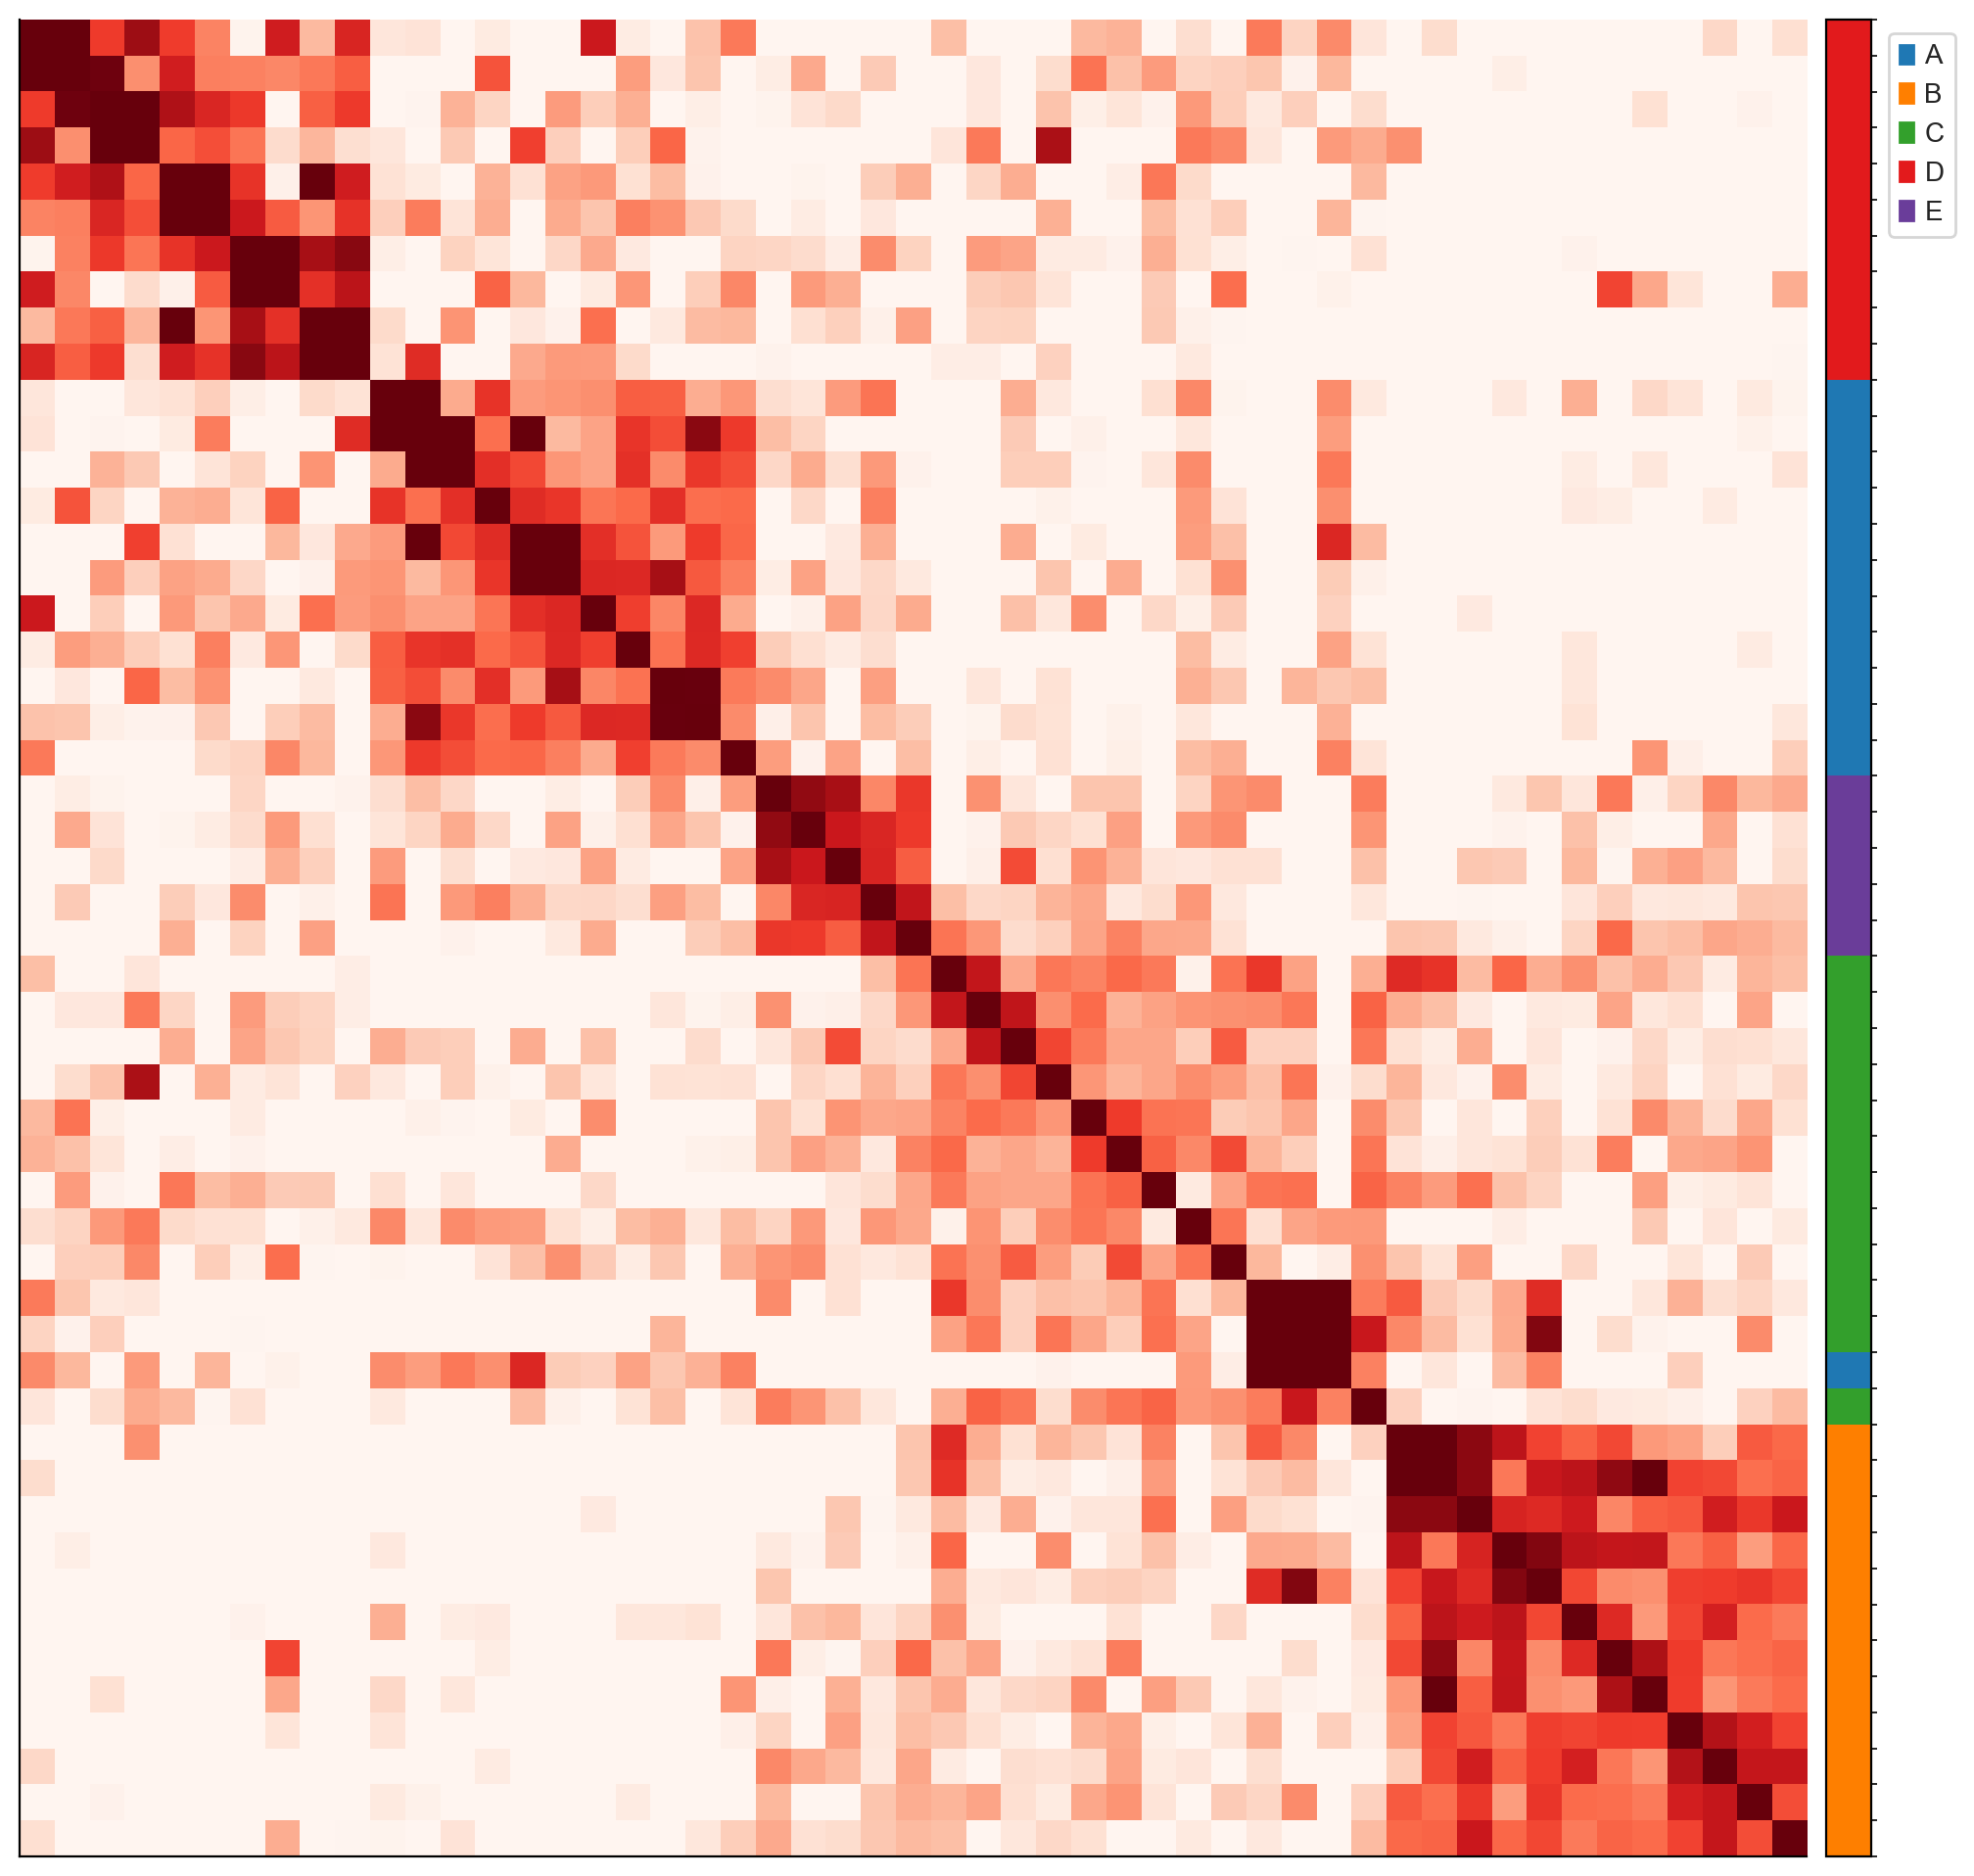

In [10]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# Cancer (ED.Fig2)

In [11]:
data_sets = 'cancer'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 1295; config samples: 1295; merged samples: 1295
Genome reference: GRCh38


In [12]:
clone_key = 'Sublineage'

In [13]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/patient_CRC11_neutral_thresh_Bian_2018_CpG_CRC10_readNcutoff_5_0.3_0.5_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (254, 234280)
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|█▌                                                                                                                                                                                                                                                         | 6/1000 [00:00<00:01, 784.23it/s]


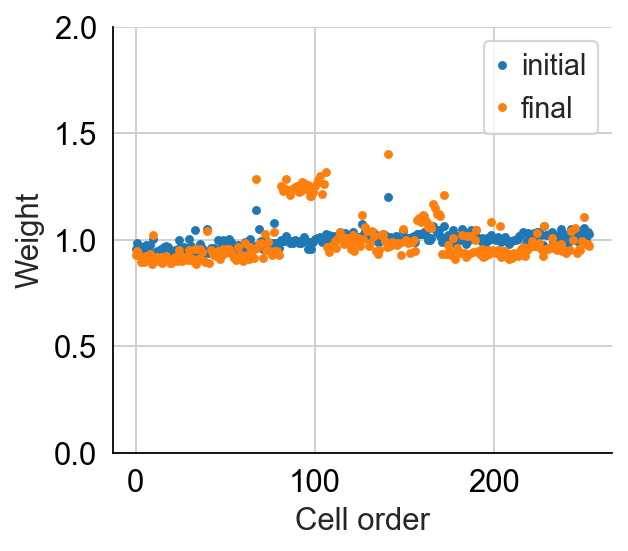

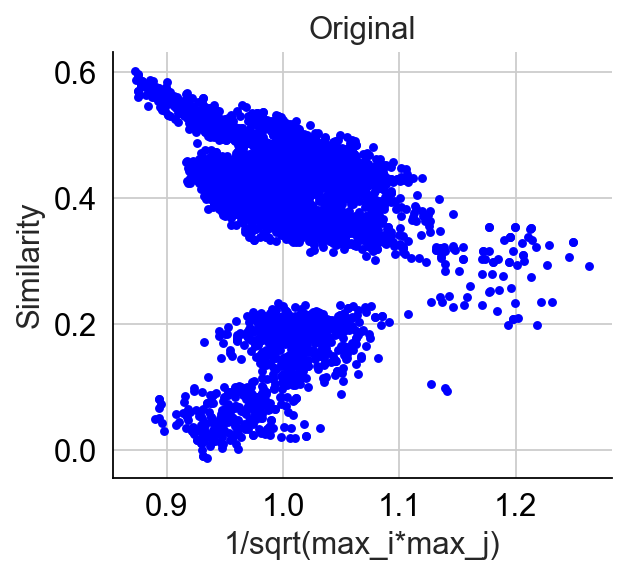

std: 0.054


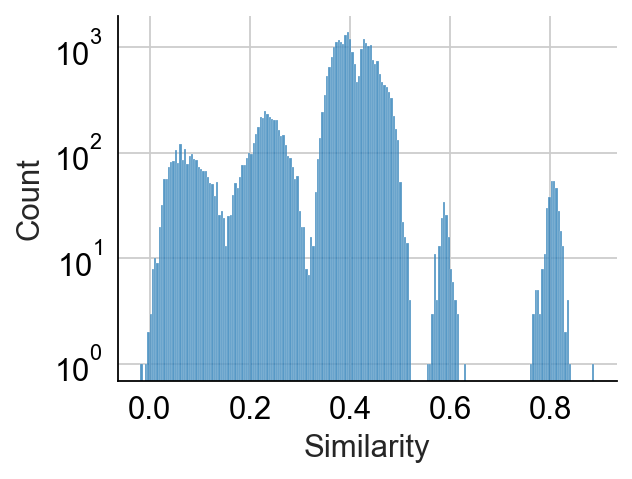

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0    A1           6       1.0         1.0      0.0         0.0   
1    A2          22       1.0         1.0      0.0         0.0   
2    A3          38       1.0         1.0      0.0         0.0   
3    A4          35       1.0         1.0      0.0         0.0   
4    A5          14       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.033333           0.183333        0.987105           0.766667  
1         0.077273           0.145455        0.954382           0.745455  
2         0.073684           0.165789        0.942141           0.710526  
3         0.074286           0.182857        0.936625           0.737143  
4         0.100000           0.135714        0.963398           0.742857  
mean continuity: 0.9983552631578947
mean accuracy: 0.9967105263157895
mean entropy: 0.0035124652430694367
mean wassertein: 0

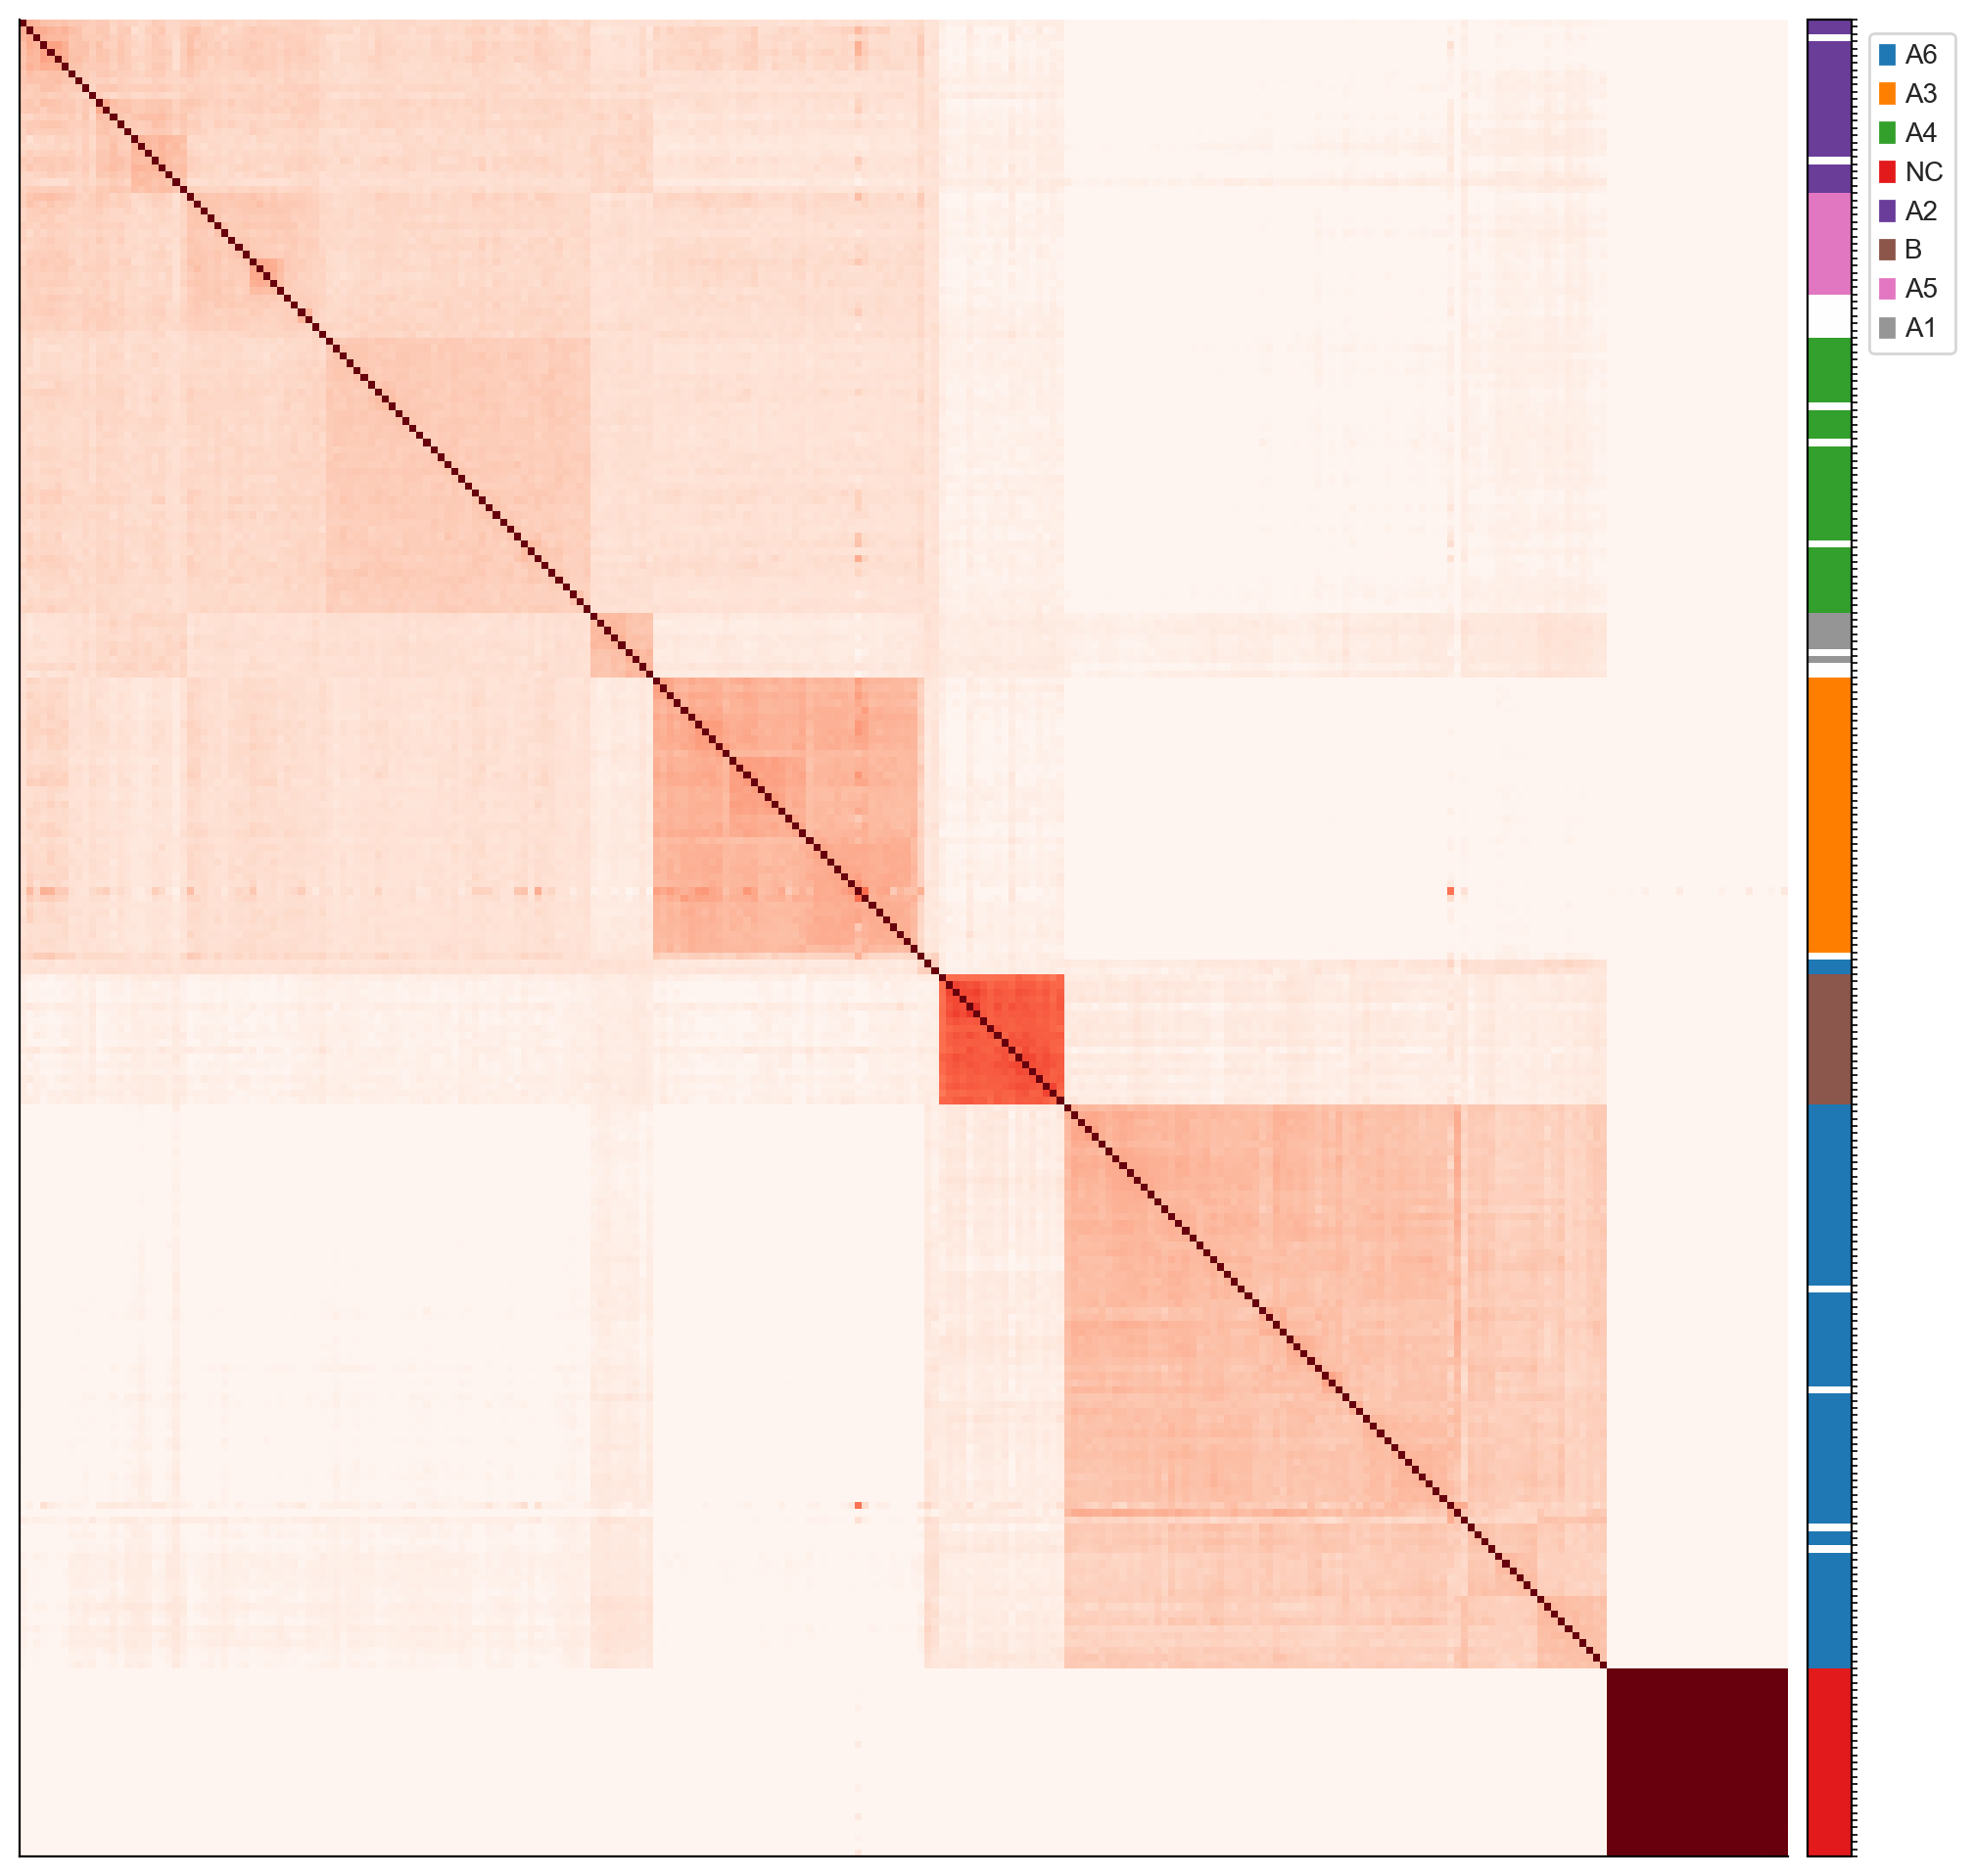

In [14]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# human_FGC (Fig2, ED.Fig3)

In [15]:
data_sets = 'human_FGC'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 823; config samples: 823; merged samples: 823
Genome reference: GRCh38


In [16]:
clone_key = 'sublineage'
cell_type_key='regress_cell_type' 

## 21W

In [17]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/final_sel_sublineage_21W_sel_neutral_thresh_Li_2021_CellResearch_F_FGC_17W_readNcutoff_5_0.3_0.6_hg19_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (144, 109113)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:07<00:00, 20.24it/s]


duration: 7.414499998092651
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  2%|███▉                                                                                                                                                                                                                                                     | 16/1000 [00:00<00:00, 1718.40it/s]


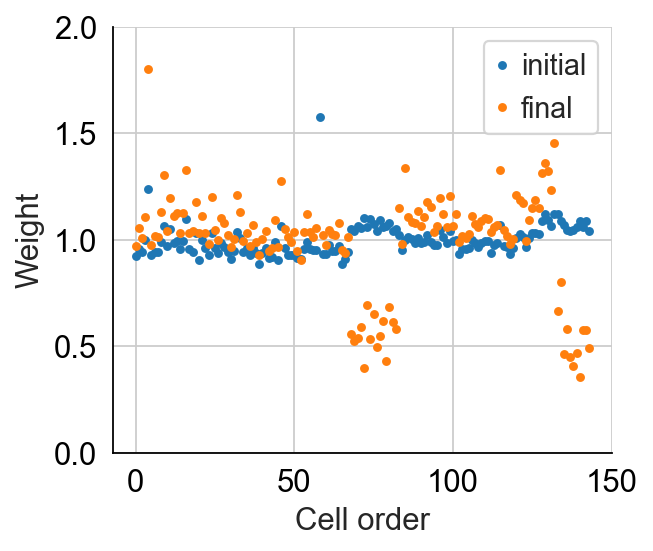

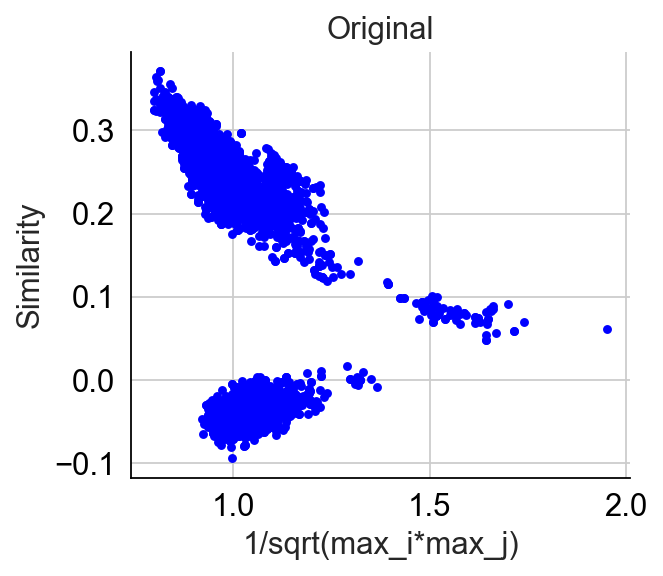

std: 0.070
Remove cell-type signal with fast method


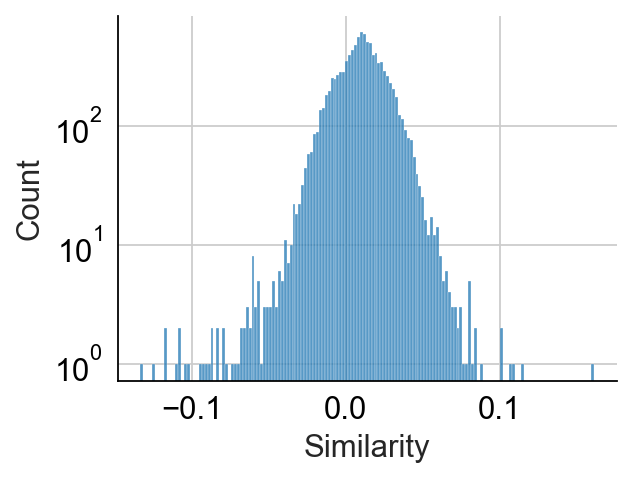

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  Embryo_1          83       1.0         1.0      0.0         0.0   
1  Embryo_2          61       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.106024           0.574699        0.760186           0.374699  
1         0.070492           0.422951        0.840088           0.508197  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.498824807426427
mean random_accuracy: 0.08825794983211535
mean random_entropy: 0.8001370071017395
mean random_wassertein: 0.44144775824609916


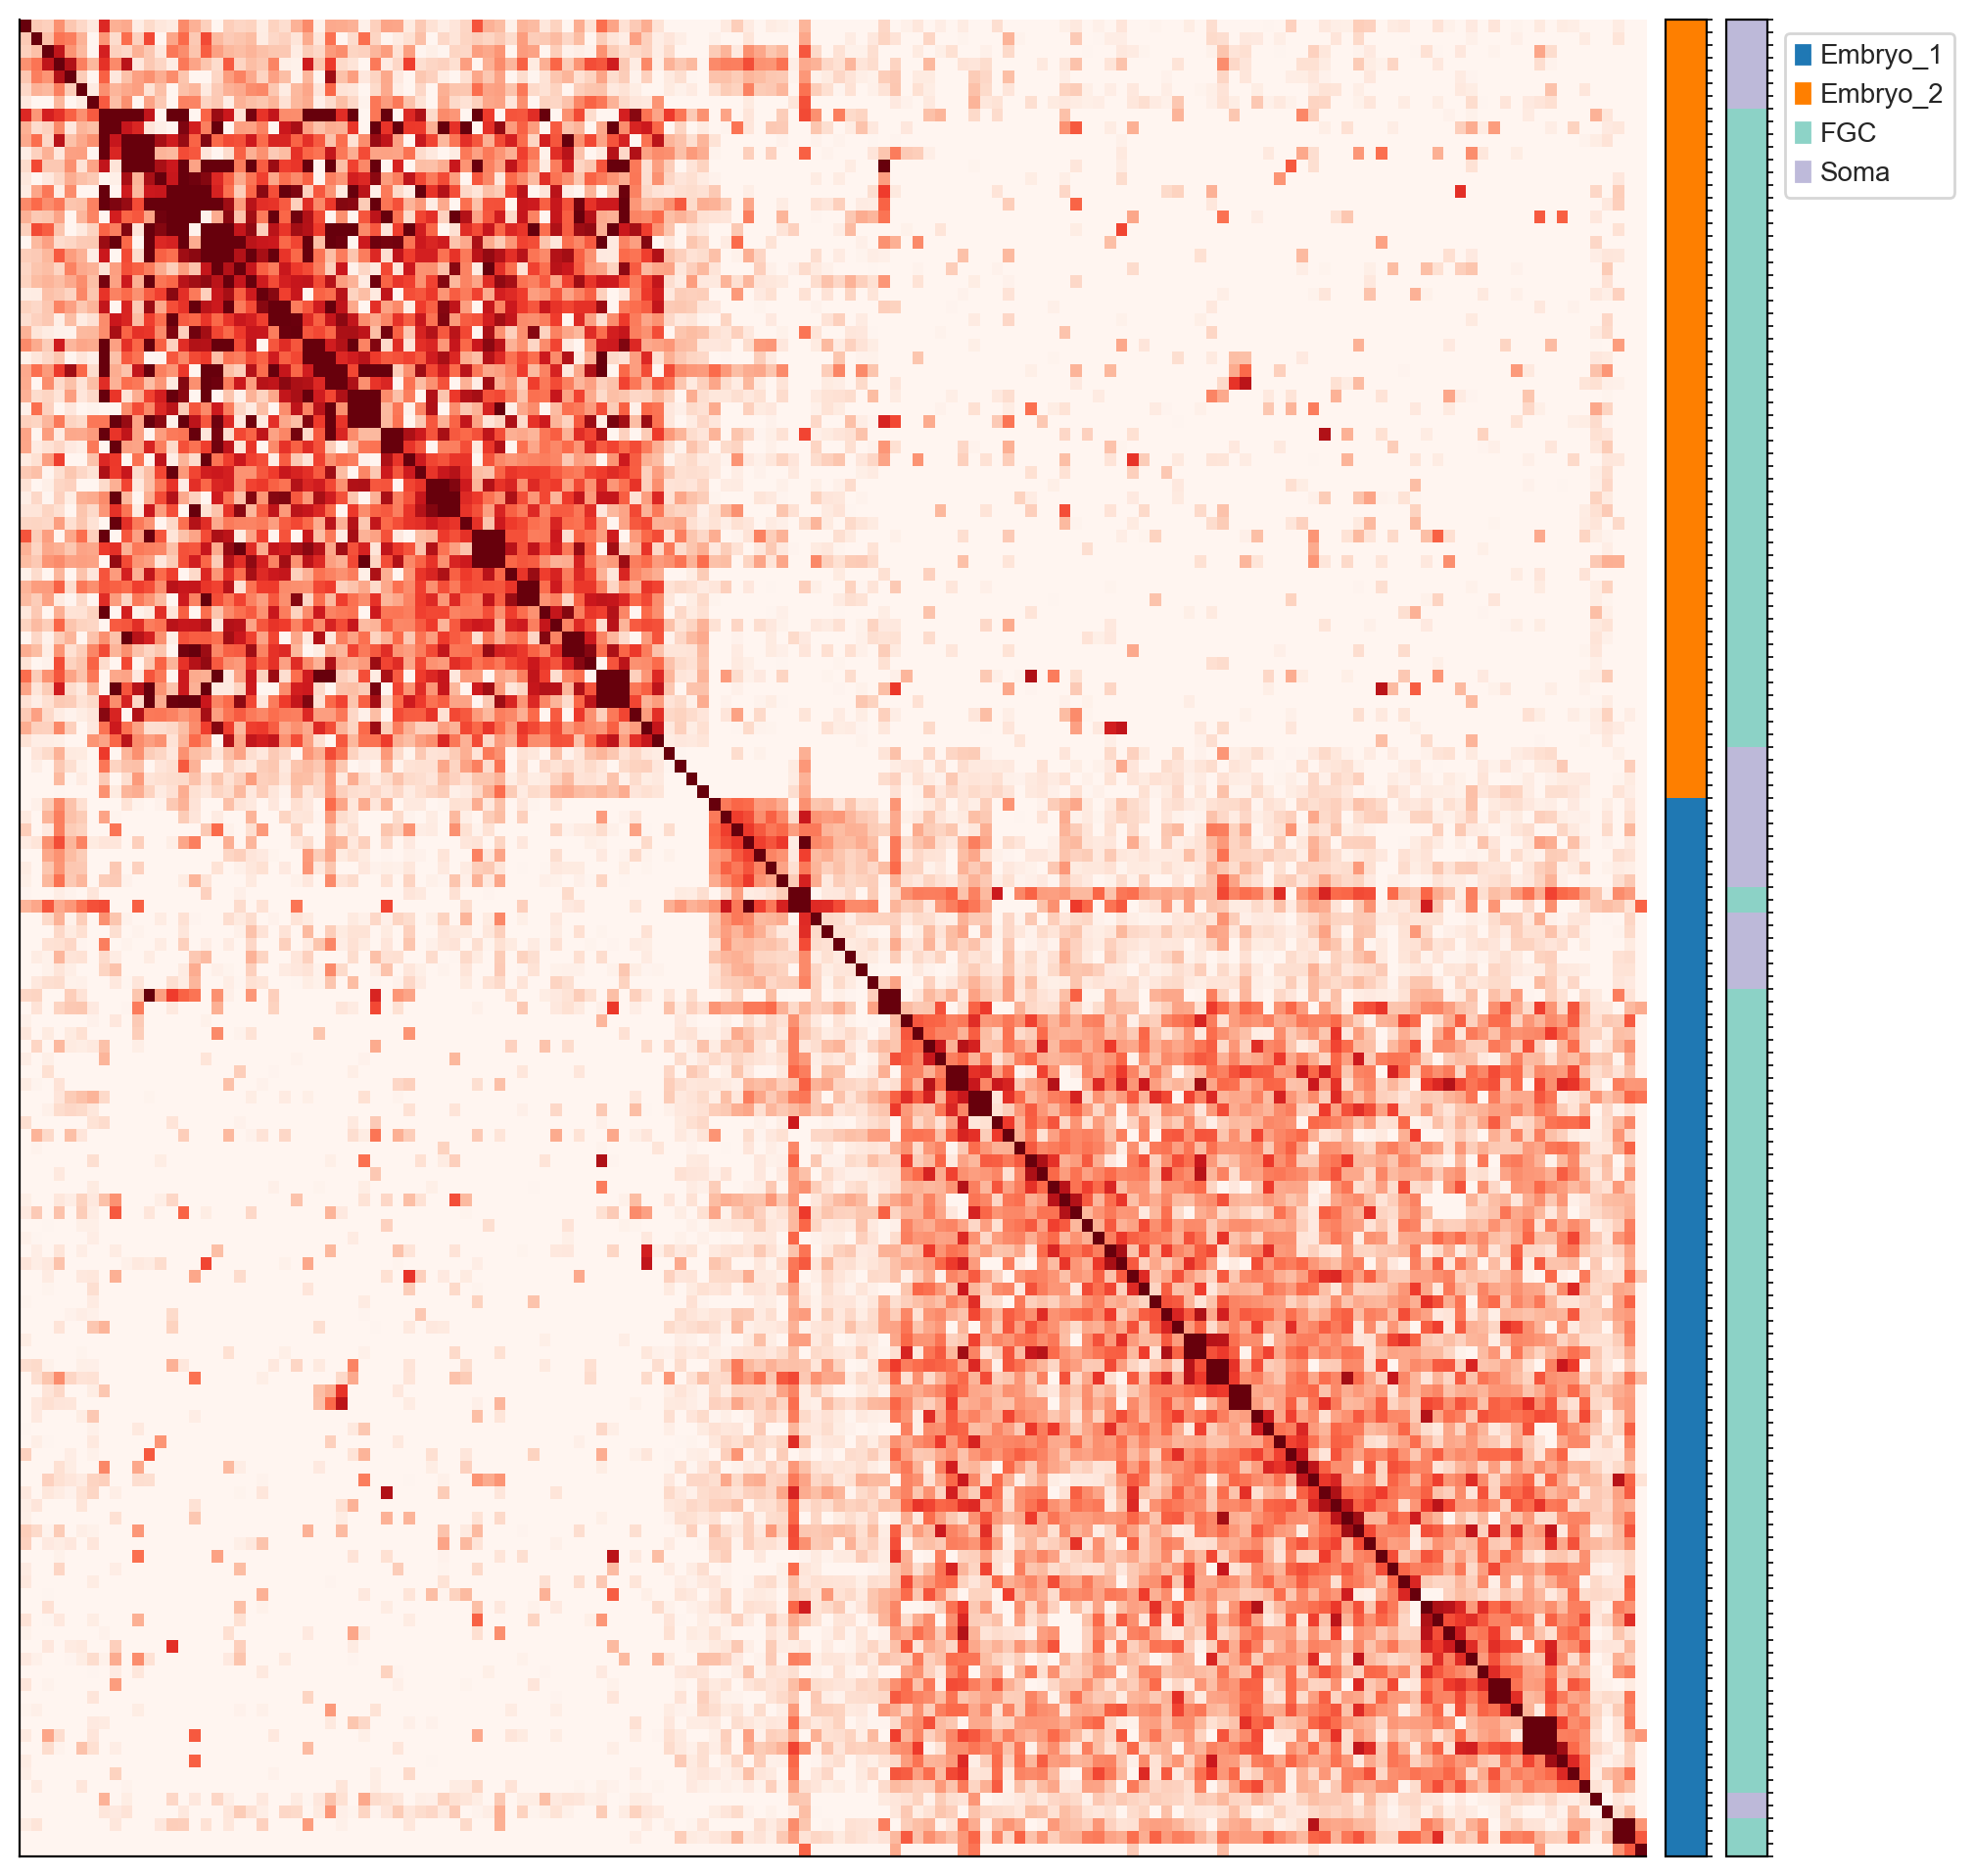

In [18]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=True,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    cell_type_key=cell_type_key,
    heatmap_additional_key_list=['regress_cell_type']
)


## 7W

In [19]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/final_sel_sublineage_7W_sel_neutral_thresh_Li_2021_CellResearch_F_FGC_17W_readNcutoff_5_0.3_0.6_hg19_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (60, 90609)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 71.37it/s]


duration: 0.9046988487243652
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|███▏                                                                                                                                                                                                                                                     | 13/1000 [00:00<00:00, 3439.91it/s]


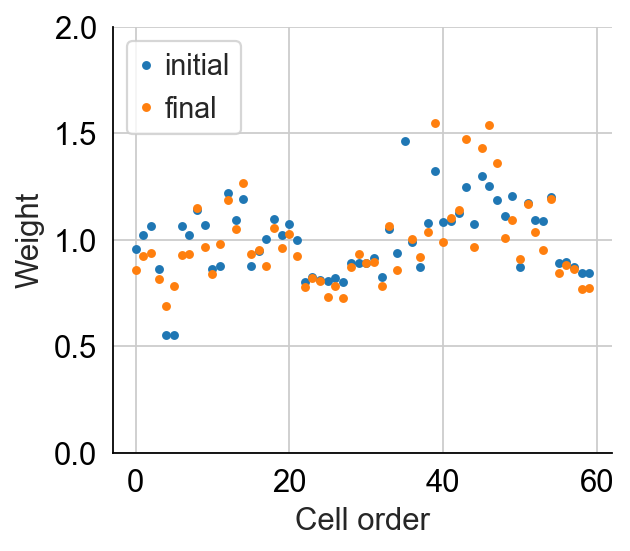

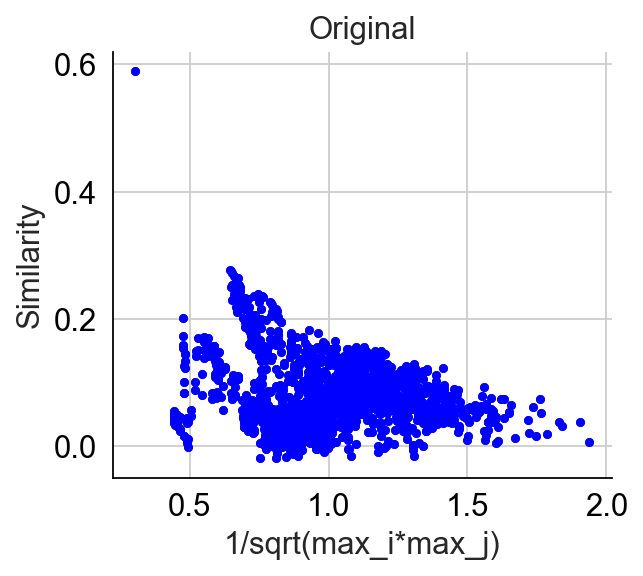

std: 0.081
Remove cell-type signal with fast method


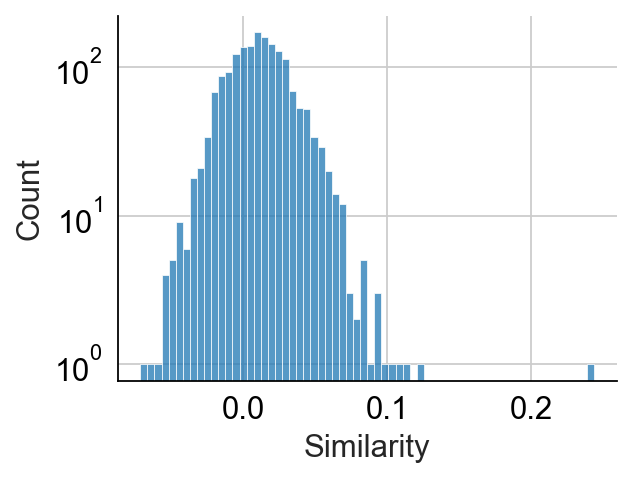

Reconstruction method: UPGMA
       clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_10          27       1.0         1.0      0.0         0.0   
1   embryo_5          33       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.137037           0.466667        0.786101           0.466667  
1         0.169697           0.566667        0.726449           0.375758  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.5166666666666666
mean random_accuracy: 0.15336700336700337
mean random_entropy: 0.7562753296643876
mean random_wassertein: 0.42121212121212115


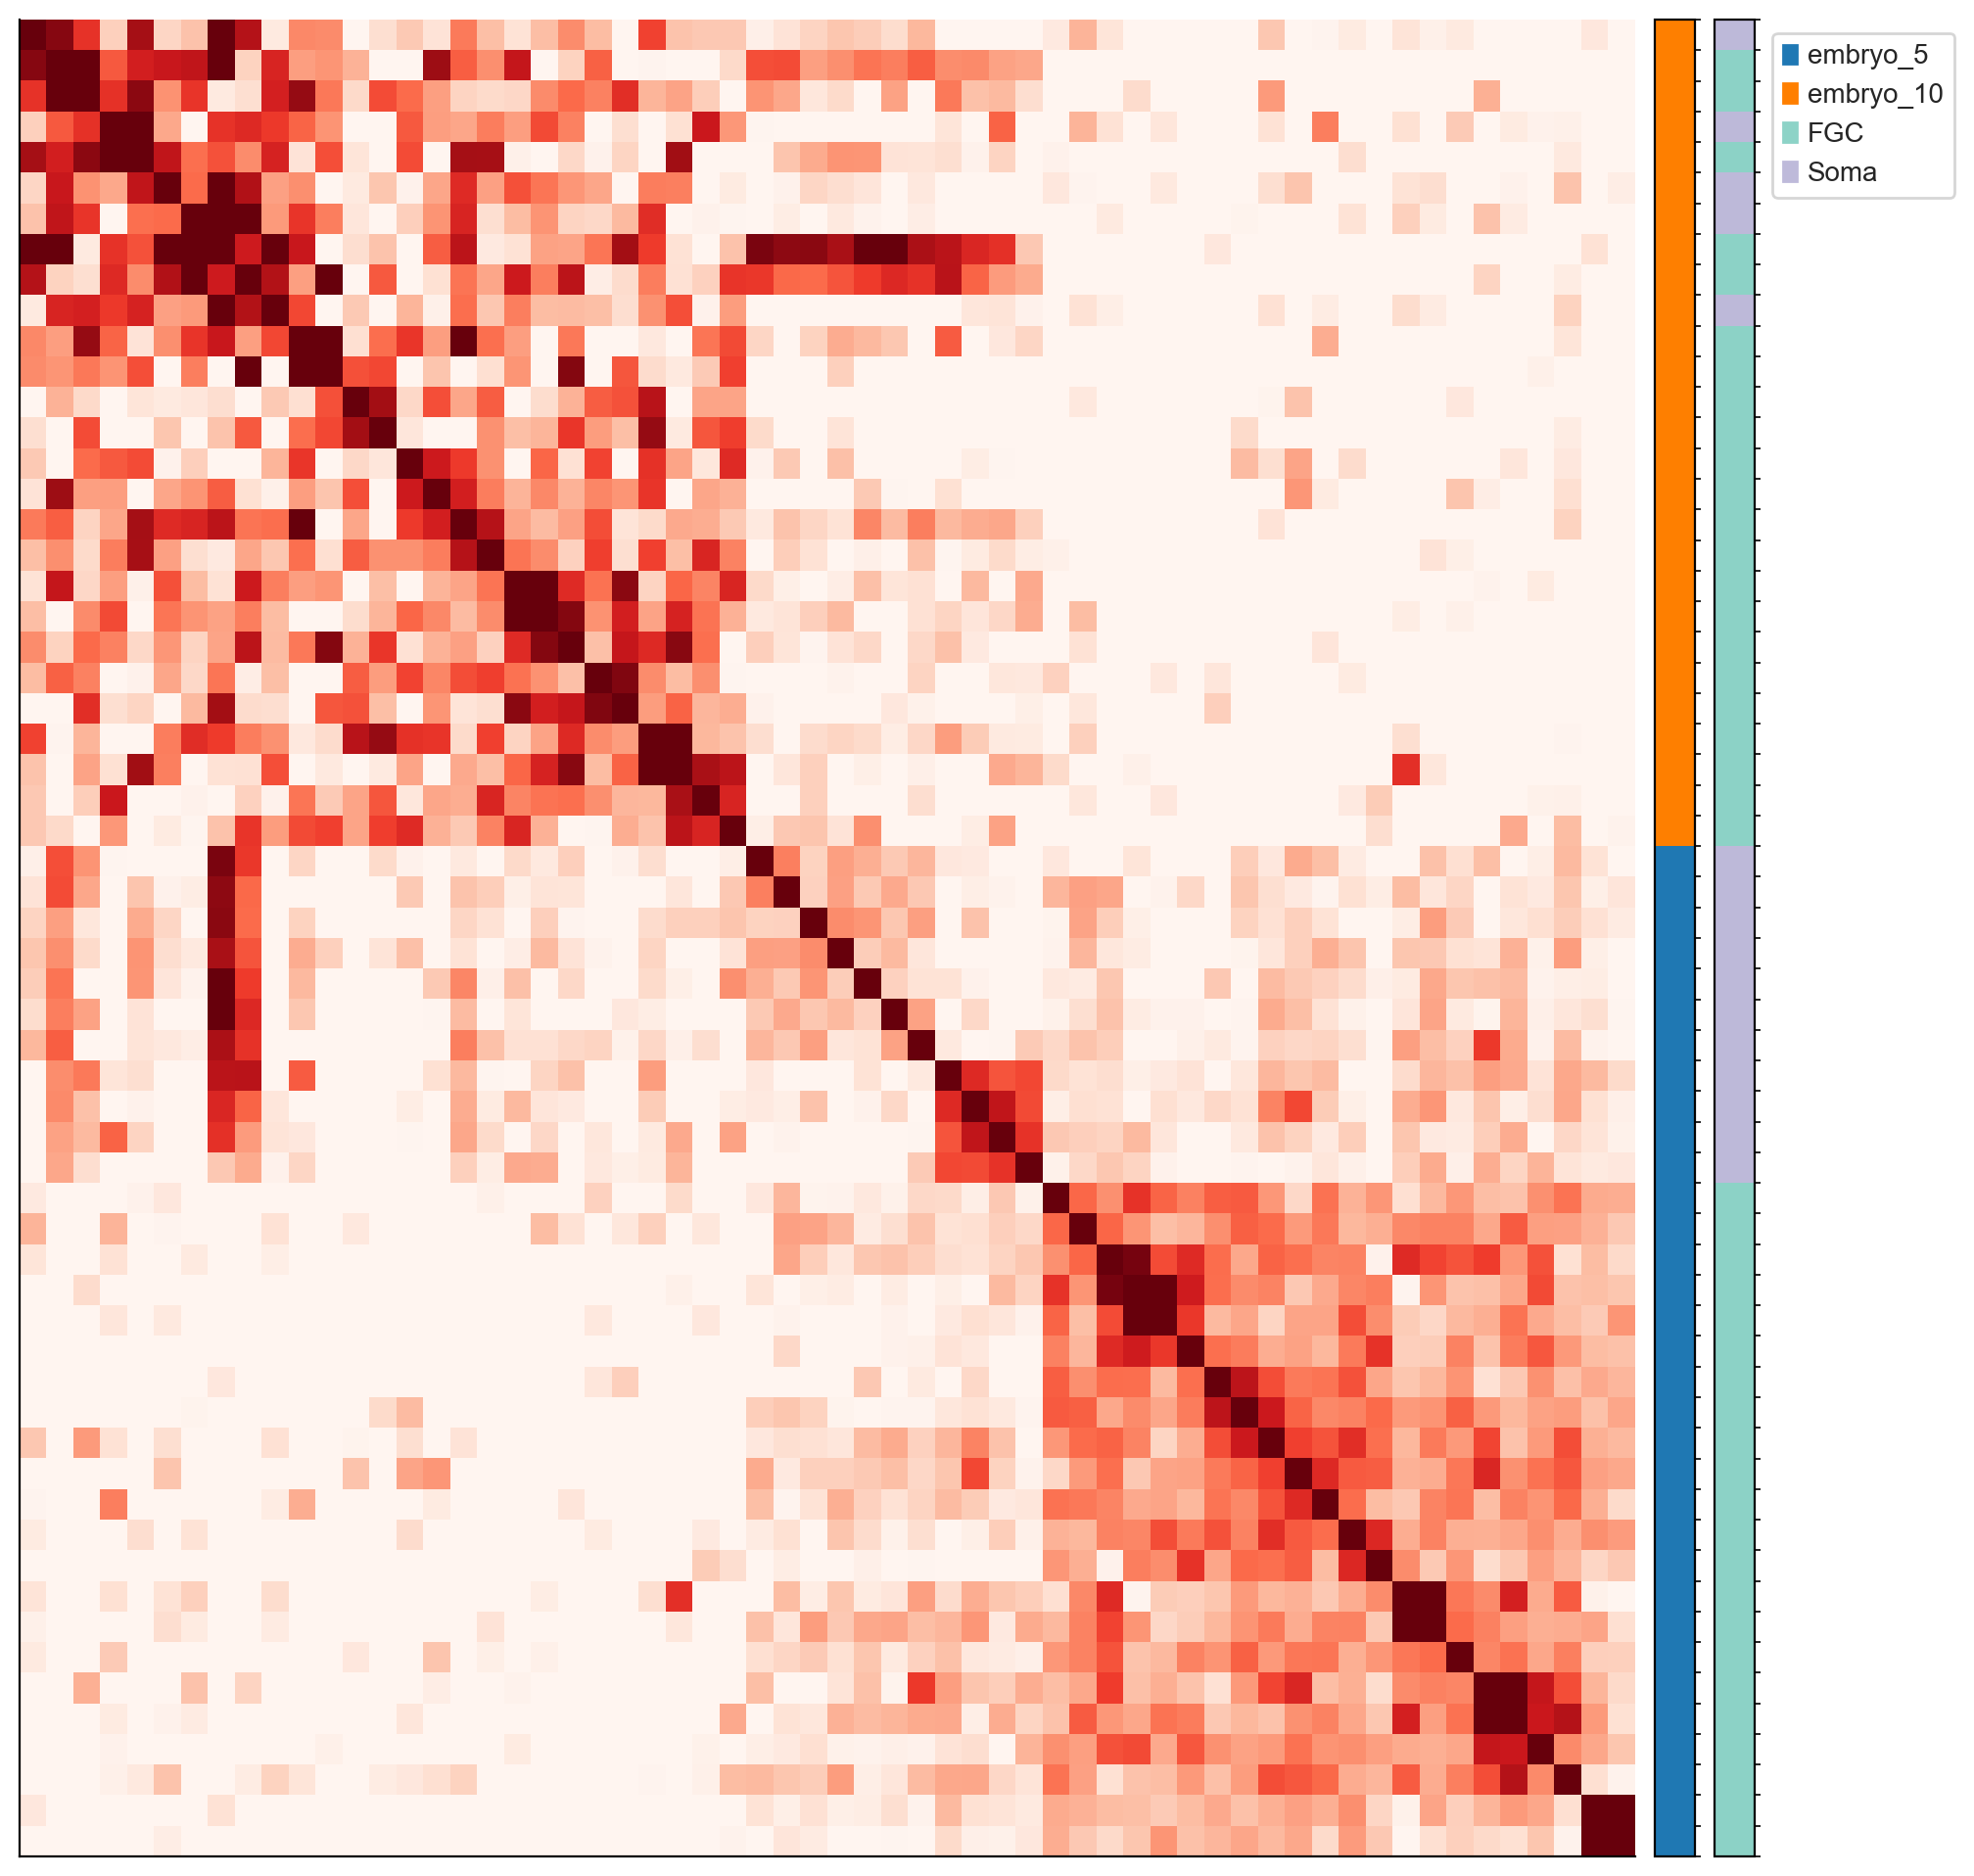

In [20]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=True,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    cell_type_key=cell_type_key,
    heatmap_additional_key_list=['regress_cell_type']
)


# mouse_LK (Fig3, ED.Fig4)

In [21]:
data_sets = 'mouse_LK'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 576; config samples: 576; merged samples: 576
Genome reference: mm10


In [22]:
clone_key = 'clone_info'

In [23]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/omics_all_neutral_thresh_20240207_scMultiOmicsseq_LK_DNApart_CMY_onlymet_LK_readNcutoff_5_0.1_0.6_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (494, 76279)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 494/494 [00:53<00:00,  9.21it/s]


duration: 54.755863189697266
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  2%|█████▎                                                                                                                                                                                                                                                    | 21/1000 [00:00<00:03, 301.51it/s]


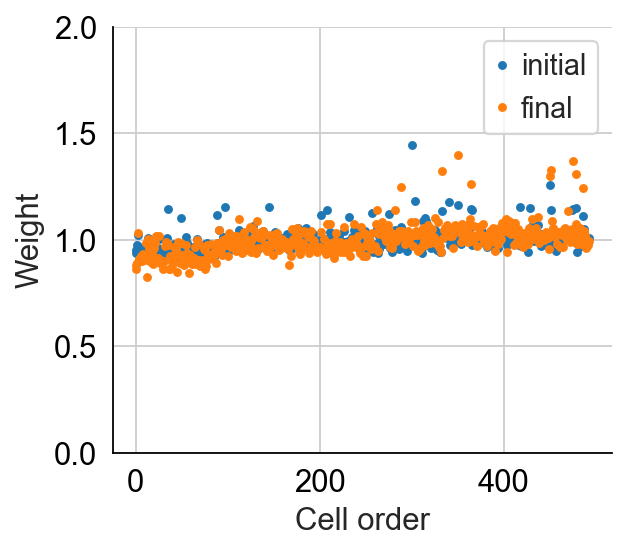

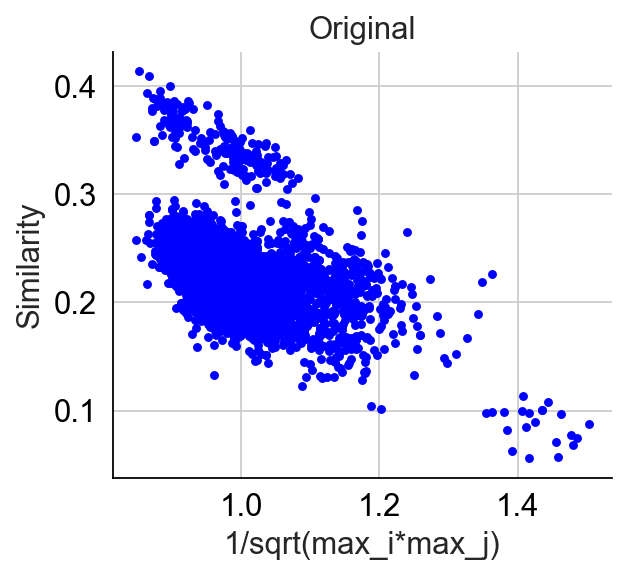

std: 0.026


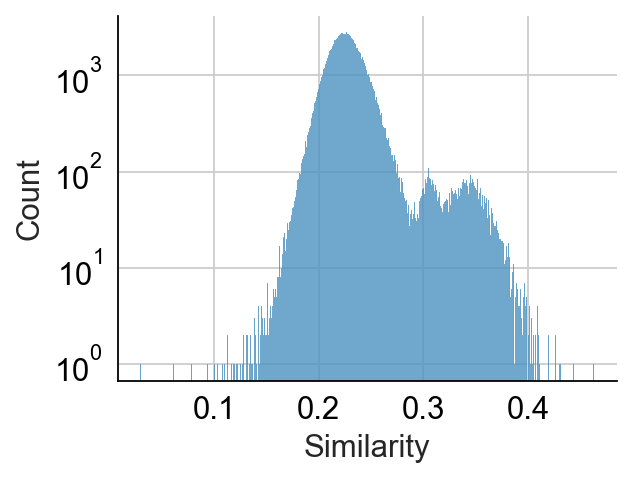

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0           4       1.0         1.0      0.0         0.0   
1   clone_1          21       1.0         1.0      0.0         0.0   
2  clone_10          22       1.0         1.0      0.0         0.0   
3  clone_11           3       1.0         1.0      0.0         0.0   
4  clone_12           3       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.000000           0.250000        1.000000           0.725000  
1         0.057143           0.090476        0.980485           0.828571  
2         0.081818           0.100000        0.975537           0.818182  
3         0.000000           0.333333        1.000000           0.666667  
4         0.000000           0.333333        1.000000           0.633333  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

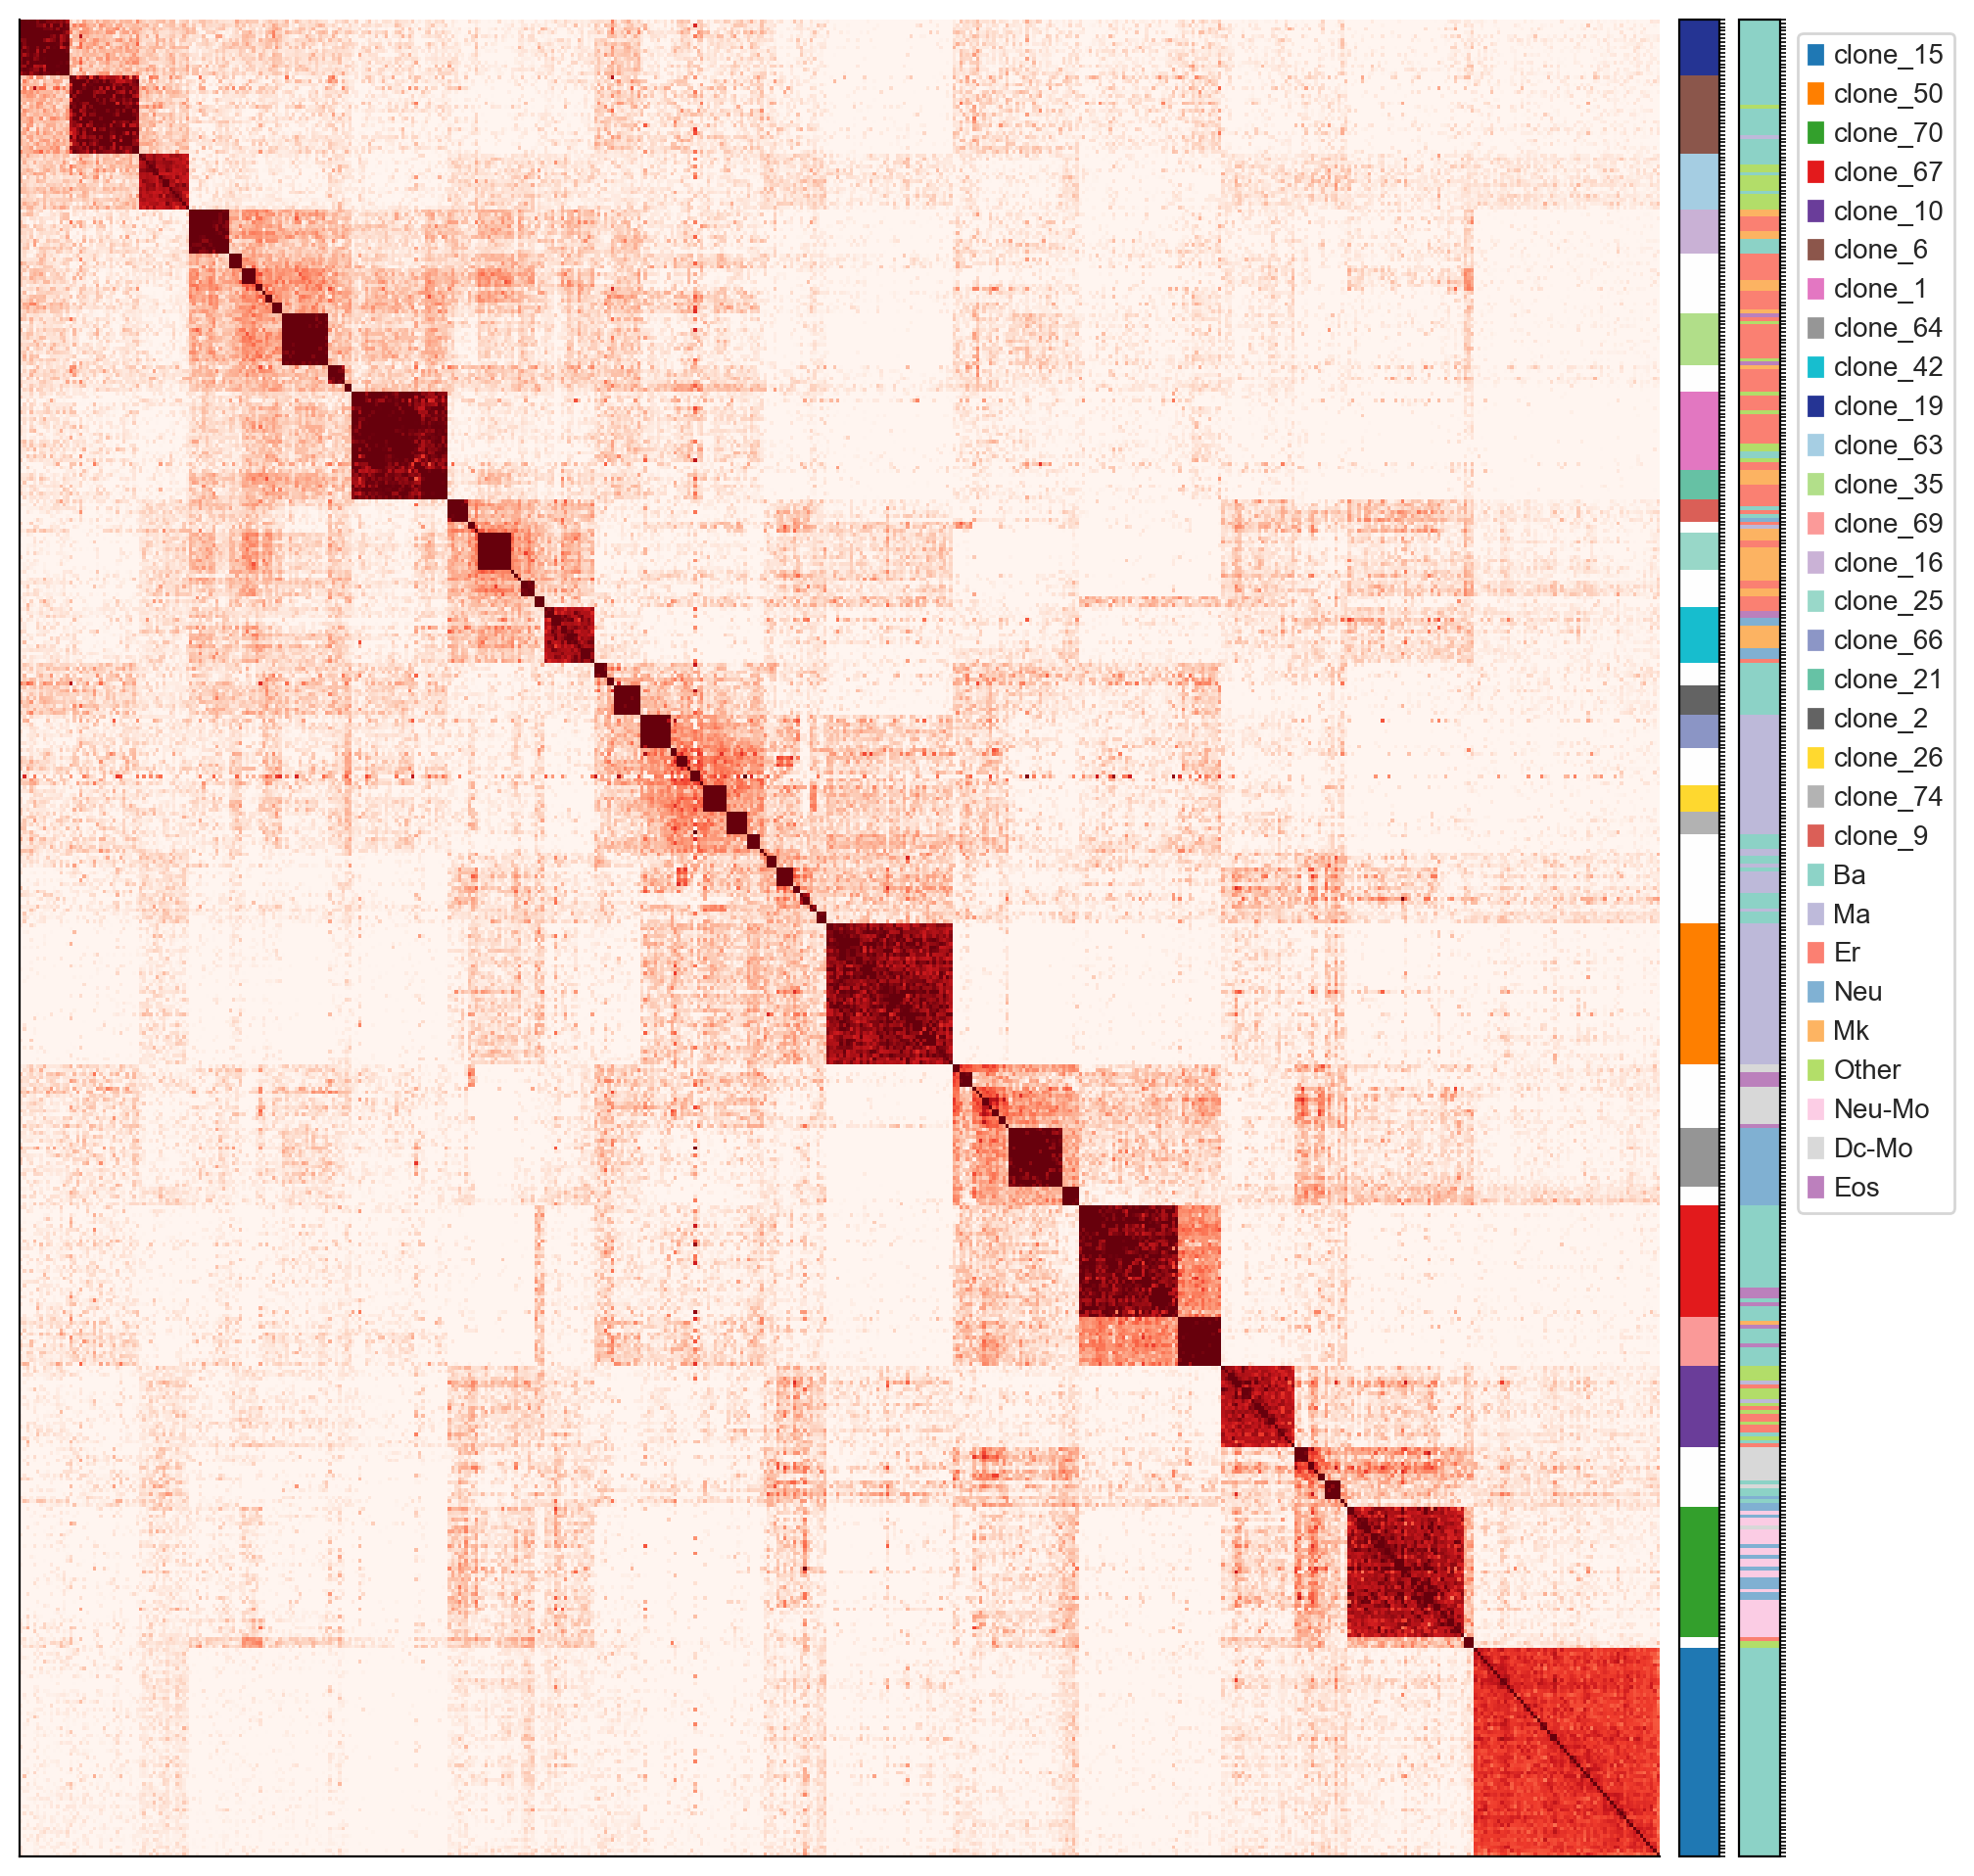

In [24]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    heatmap_additional_key_list=['cell_type']
)


# humanCD34 (Fig4)

In [25]:
data_sets = 'human_CD34'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 312; config samples: 312; merged samples: 312
Genome reference: hg38


In [26]:
clone_key = 'clone_id'

In [27]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/source_all_neutral_thresh_20240713_scMultiOmicsseq_human_HSC_CMY_DNApart_merge_20240413_20240528_20240708_readNcutoff_3_0.1_0.4_500bp_readcutoff1_minCov2_met_ExcludeSex0.h5ad')

Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].


## total cells

use provided adata
adata shape:  (261, 126412)
update sample
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|█▊                                                                                                                                                                                                                                                         | 7/1000 [00:00<00:01, 781.52it/s]


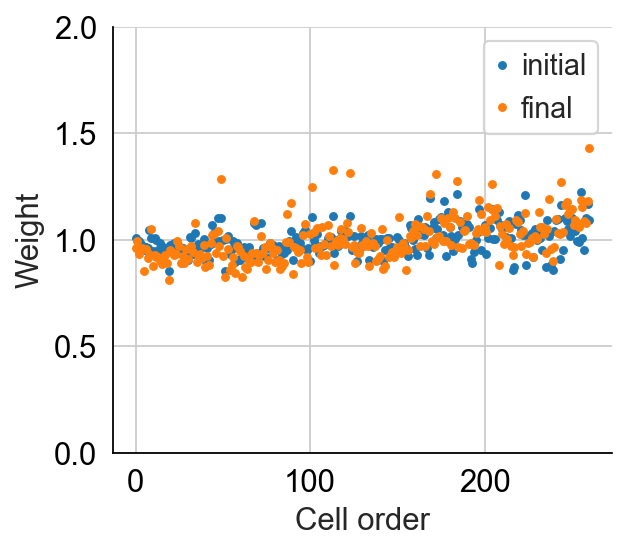

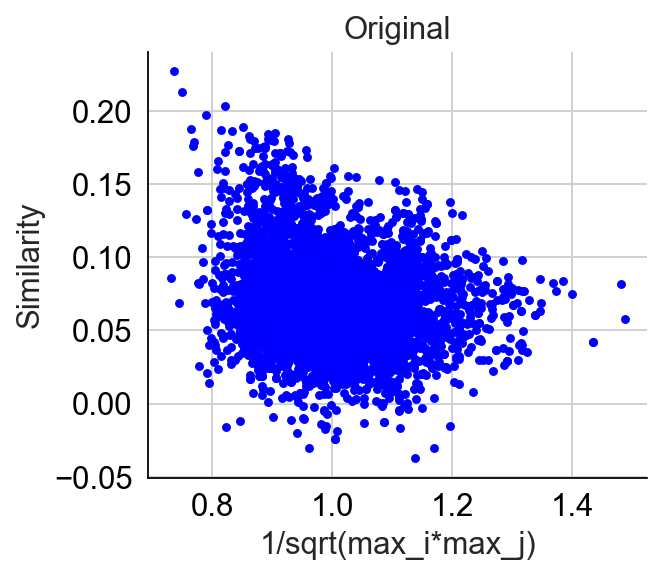

std: 0.017


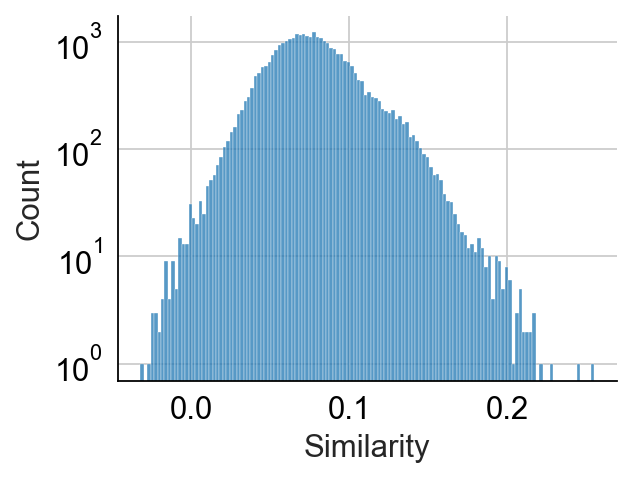

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  clone_12          36  0.972222    0.972222  0.035421    0.027778   
1  clone_13          23  0.956522    0.956522  0.057039    0.043478   
2  clone_16          13  1.000000    1.000000  0.000000    0.000000   
3  clone_17           5  1.000000    1.000000  0.000000    0.000000   
4  clone_19           7  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.094444           0.272222        0.893979           0.652778  
1         0.100000           0.143478        0.953610           0.708696  
2         0.076923           0.123077        0.975055           0.761538  
3         0.160000           0.280000        0.931092           0.660000  
4         0.057143           0.185714        0.969468           0.757143  
mean continuity: 0.9960413311862588
mean accuracy: 0.9960413311862588
mean entropy: 0.00513663

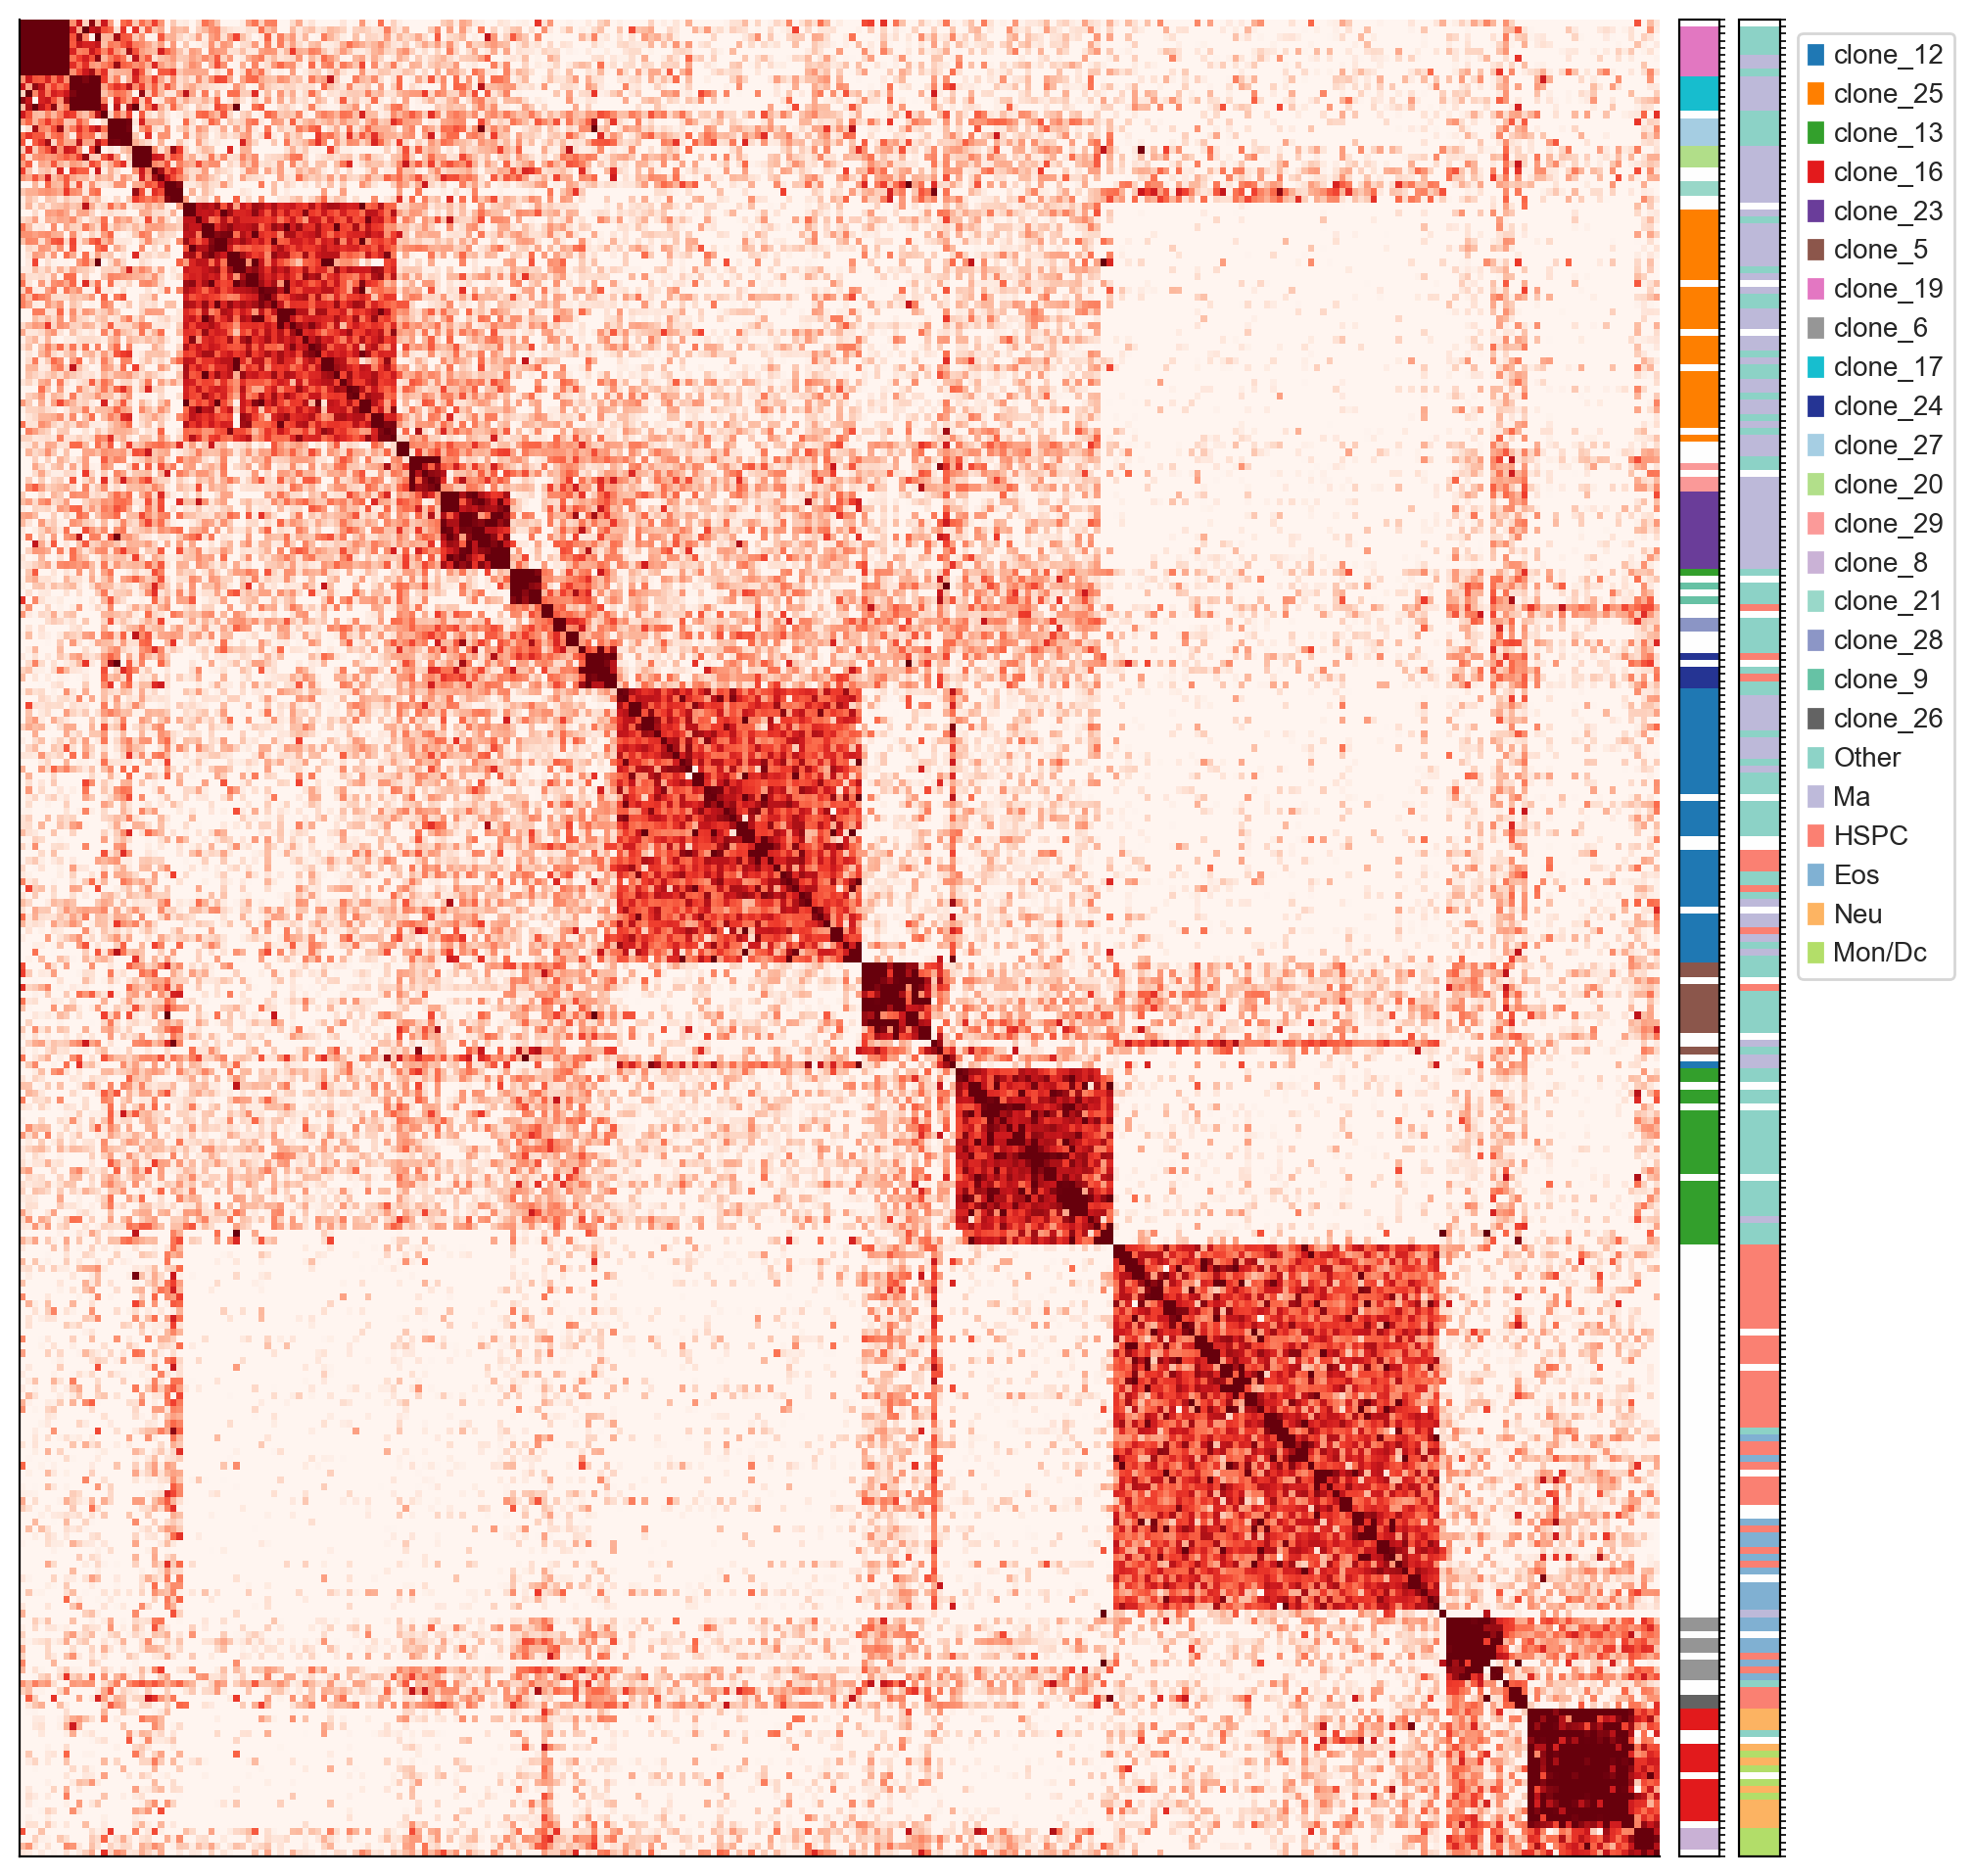

In [28]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    heatmap_additional_key_list=['celltype']
)


## cells with valid barcode

In [29]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/source_all_neutral_thresh_20240713_scMultiOmicsseq_human_HSC_CMY_DNApart_merge_20240413_20240528_20240708_readNcutoff_3_0.1_0.4_500bp_readcutoff1_minCov2_met_ExcludeSex0.h5ad')

Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.4_500bp_readcutoff1_minCov2_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (178, 126412)
update sample
Similarity shape mismatch ((178, 261))
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:07<00:00, 23.49it/s]


duration: 7.927978038787842
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|█▌                                                                                                                                                                                                                                                         | 6/1000 [00:00<00:03, 273.43it/s]


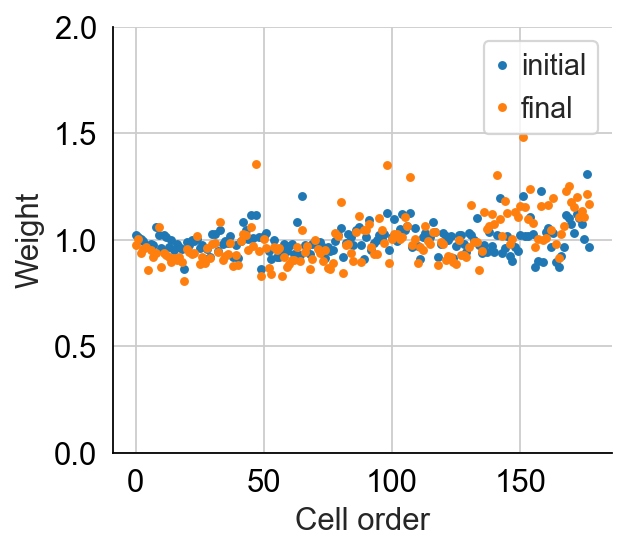

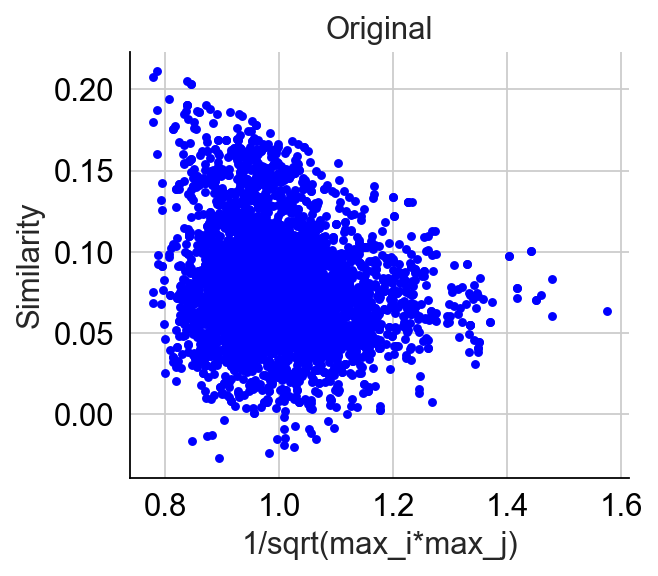

std: 0.022


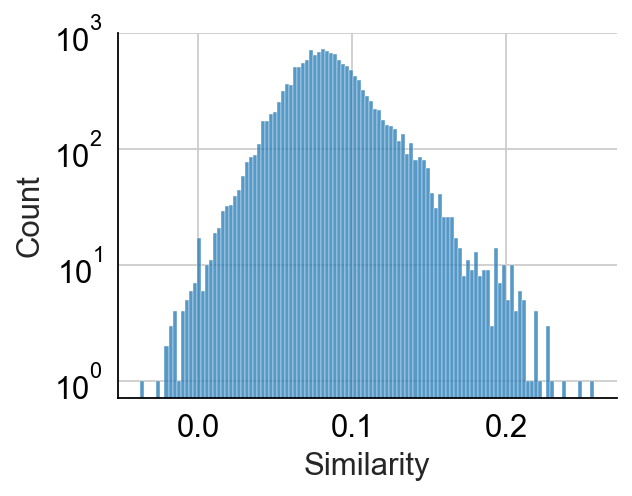

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  clone_12          36  0.972222    0.972222  0.035421    0.027778   
1  clone_13          23  0.956522    0.956522  0.057039    0.043478   
2  clone_16          13  1.000000    1.000000  0.000000    0.000000   
3  clone_17           5  1.000000    1.000000  0.000000    0.000000   
4  clone_19           7  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.097222           0.255556        0.900832           0.669444  
1         0.091304           0.160870        0.947372           0.721739  
2         0.123077           0.161538        0.946971           0.700000  
3         0.000000           0.200000        1.000000           0.700000  
4         0.085714           0.185714        0.969468           0.700000  
mean continuity: 0.9904857756307032
mean accuracy: 0.9904857756307032
mean entropy: 0.01298006

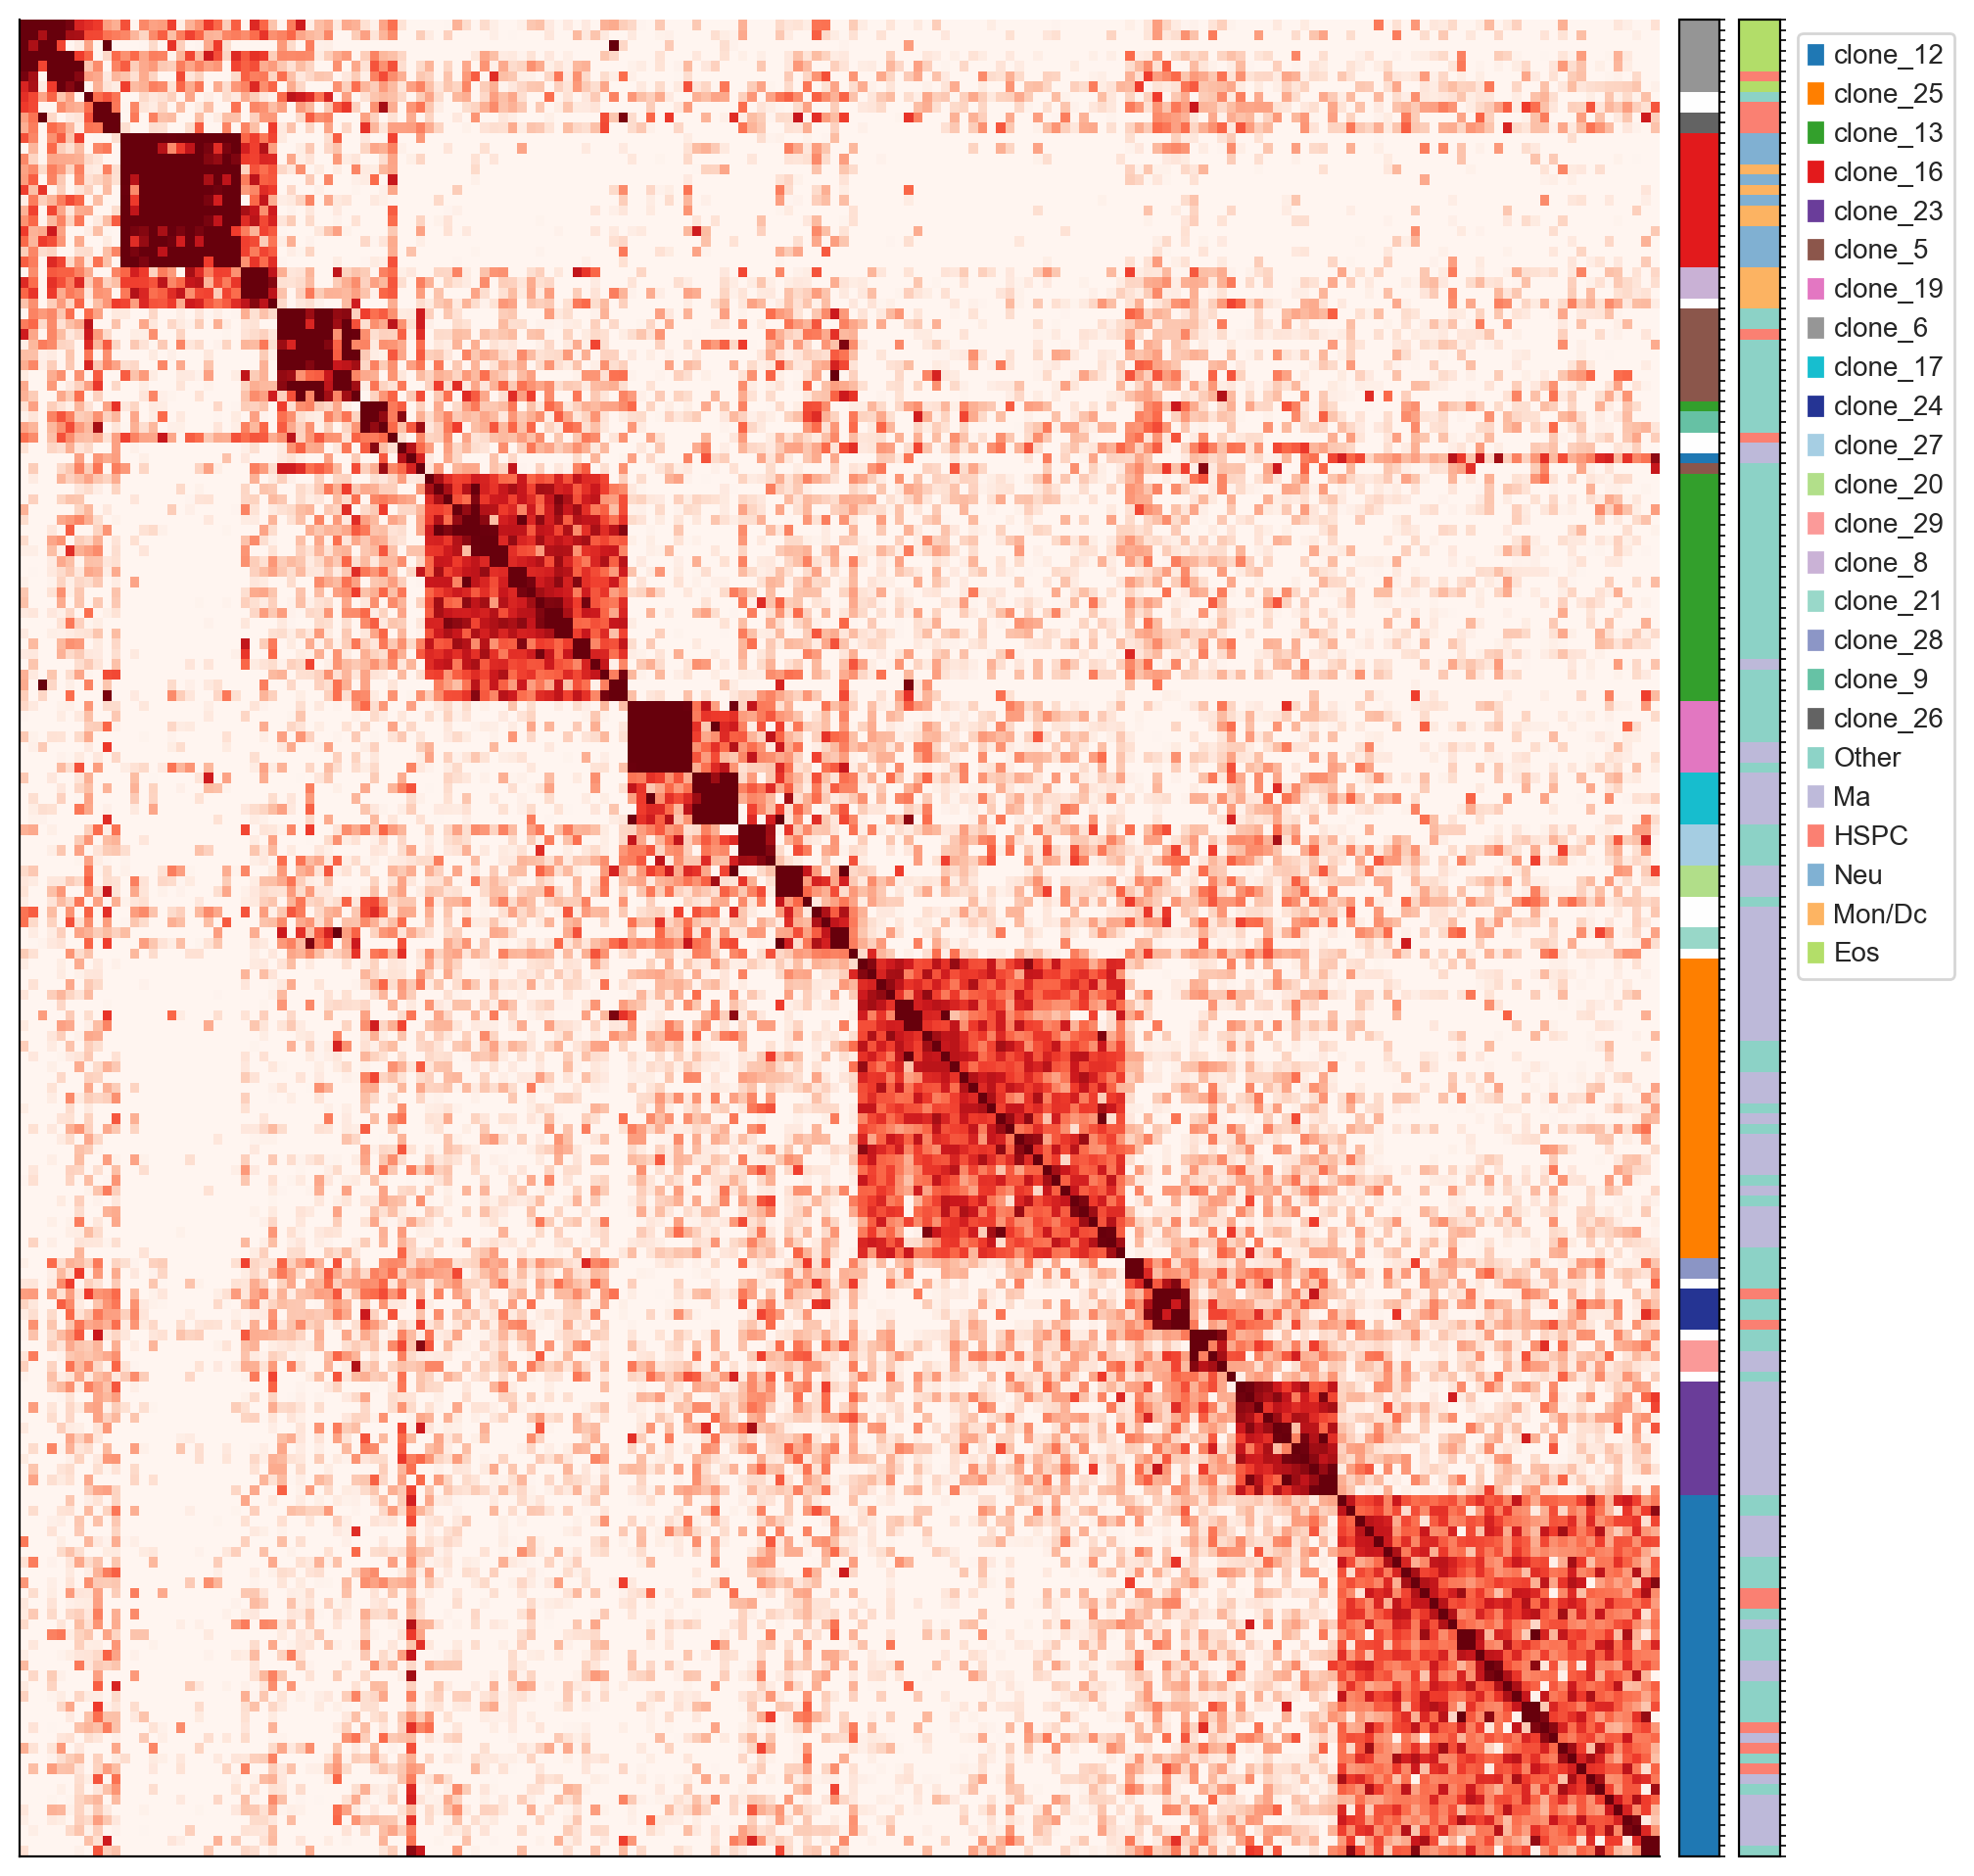

In [30]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata[adata.obs['clone_id'].notna()],
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
    heatmap_additional_key_list=['celltype']
)


# mouse_embryo (Fig5, ED.Fig5)

In [31]:
data_sets = 'mouse_embryo'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 167; config samples: 167; merged samples: 167
Genome reference: mm10


In [32]:
clone_key = 'clone_id'

## 2-Cell

In [33]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_2-Cell_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (25, 124505)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 97.39it/s]


duration: 0.3437058925628662
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▊                                                                                                                                                                                                                                                         | 3/1000 [00:00<00:00, 1821.76it/s]


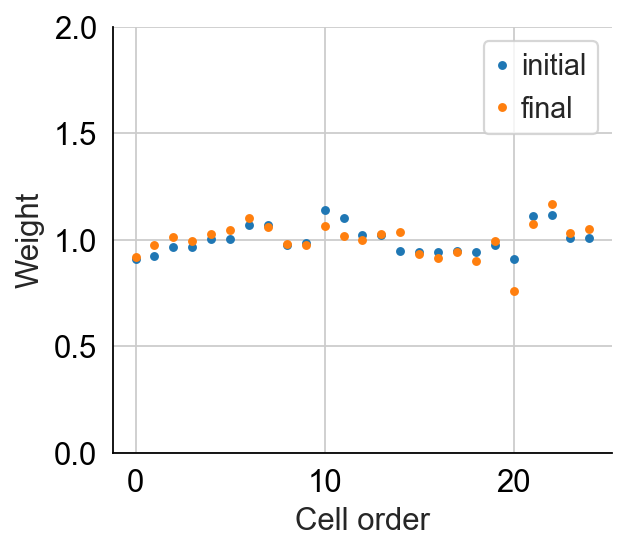

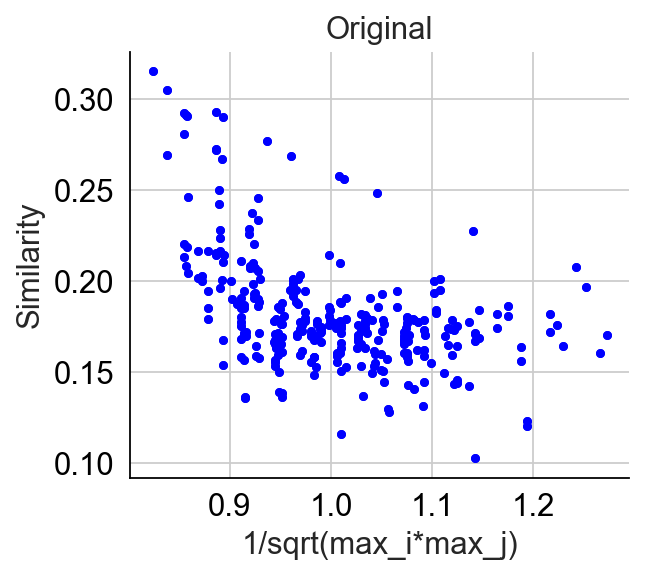

std: 0.038


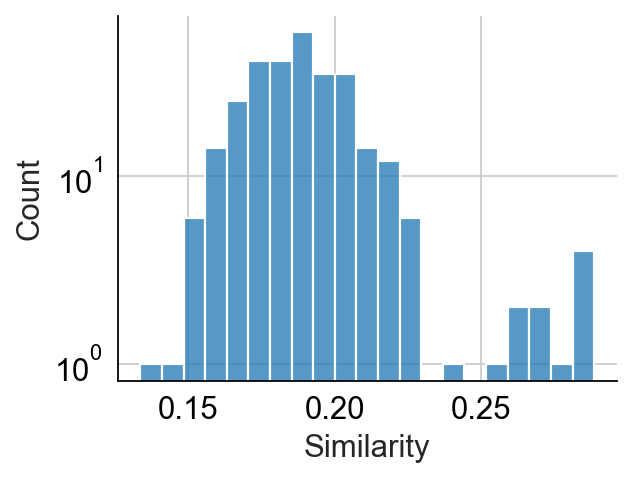

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_0           2       1.0         1.0      0.0         0.0   
1  embryo_1           2       1.0         1.0      0.0         0.0   
2  embryo_2           2       1.0         1.0      0.0         0.0   
3  embryo_3           2       1.0         1.0      0.0         0.0   
4  embryo_4           2       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0              0.2               0.60             0.8               0.40  
1              0.1               0.55             0.9               0.45  
2              0.0               0.50             1.0               0.50  
3              0.1               0.55             0.9               0.45  
4              0.1               0.55             0.9               0.45  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

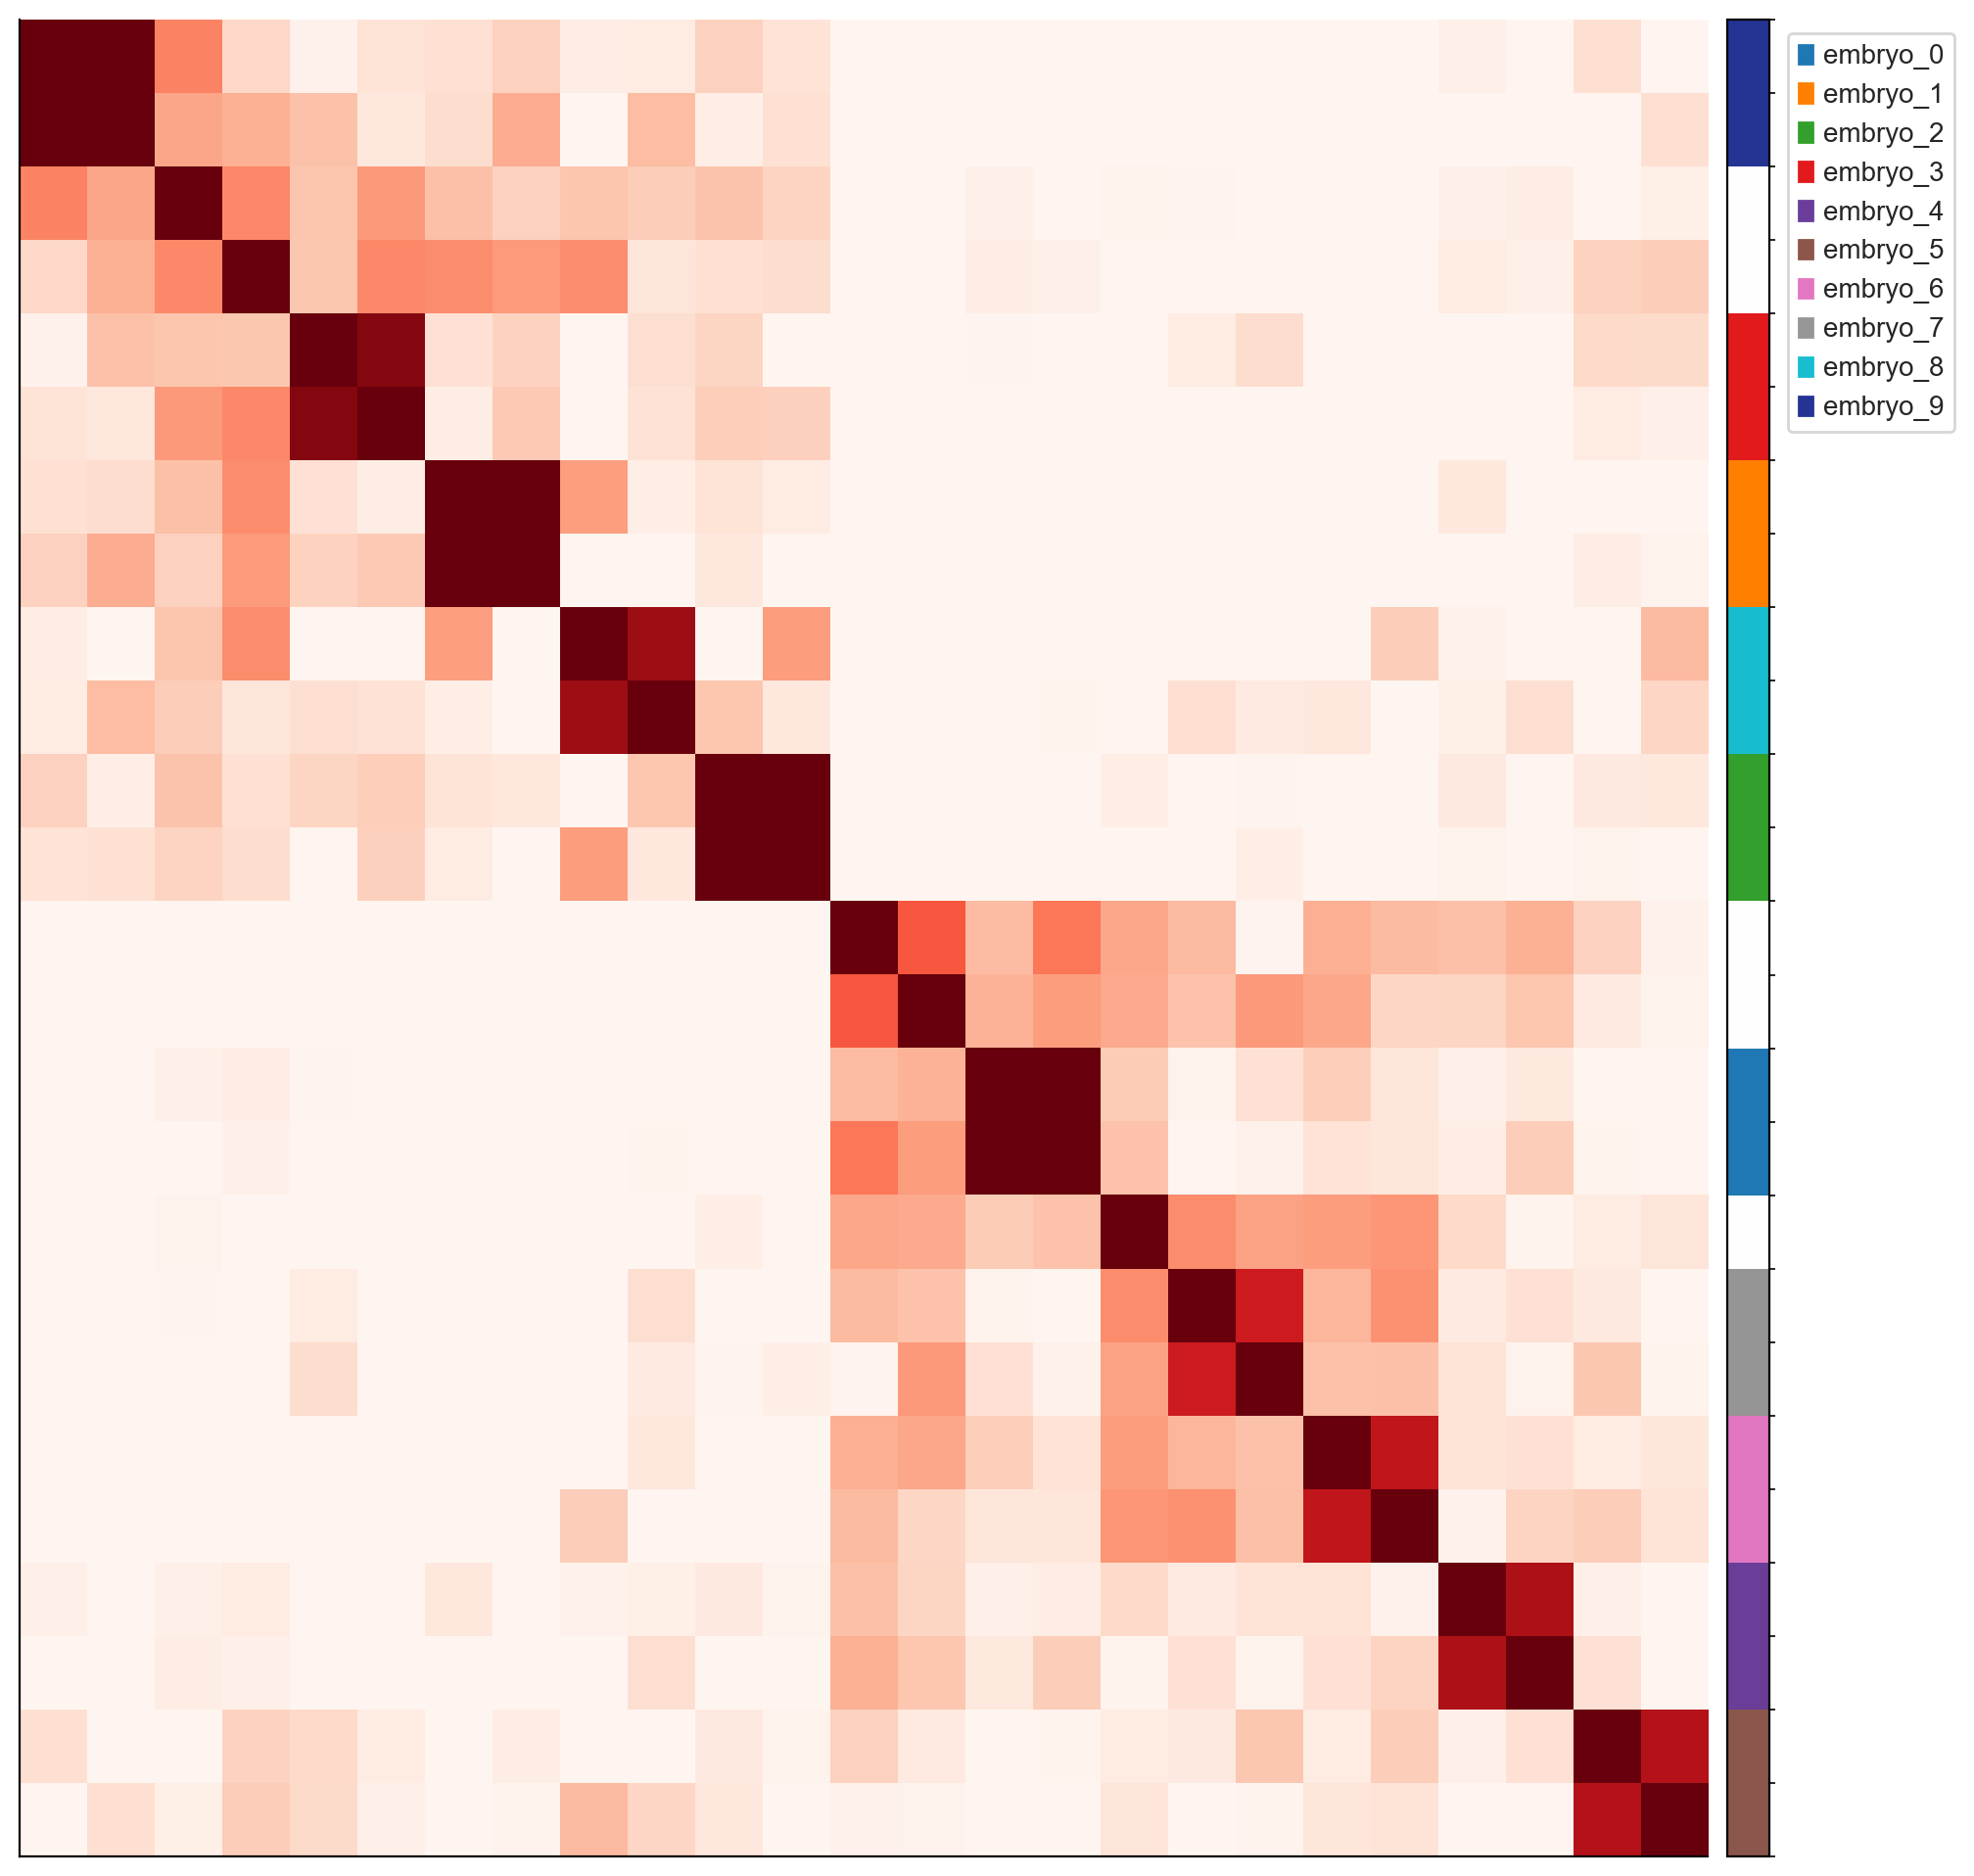

In [34]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## 4-Cell

In [35]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_4-Cell_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (23, 106644)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 173.52it/s]


duration: 0.1703939437866211
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▌                                                                                                                                                                                                                                                         | 2/1000 [00:00<00:00, 1418.43it/s]


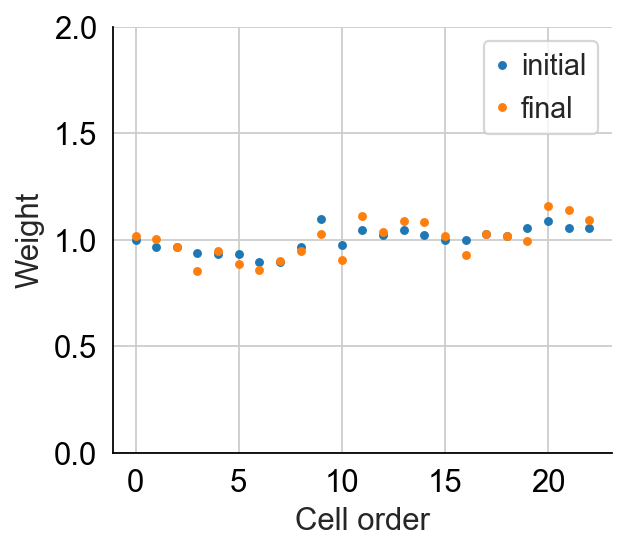

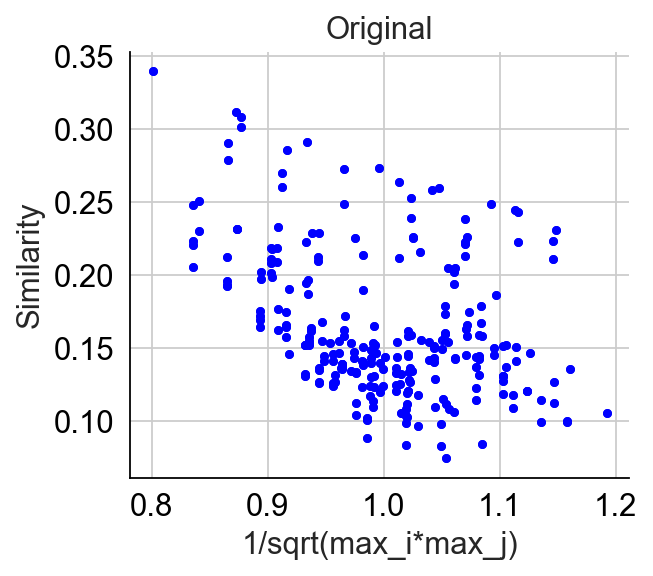

std: 0.042


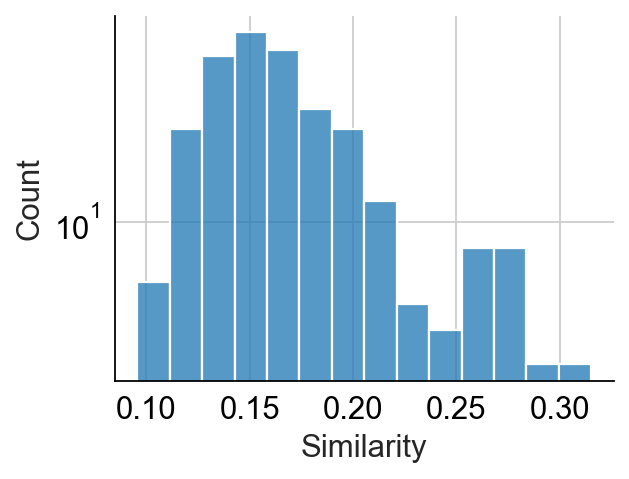

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_0           4       1.0         1.0      0.0         0.0   
1  embryo_1           4       1.0         1.0      0.0         0.0   
2  embryo_2           4       1.0         1.0      0.0         0.0   
3  embryo_3           3       1.0         1.0      0.0         0.0   
4  embryo_4           3       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.400000           0.500000        0.706128           0.425000  
1         0.450000           0.500000        0.750000           0.450000  
2         0.475000           0.525000        0.715564           0.450000  
3         0.266667           0.466667        0.831752           0.400000  
4         0.066667           0.366667        0.957938           0.466667  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

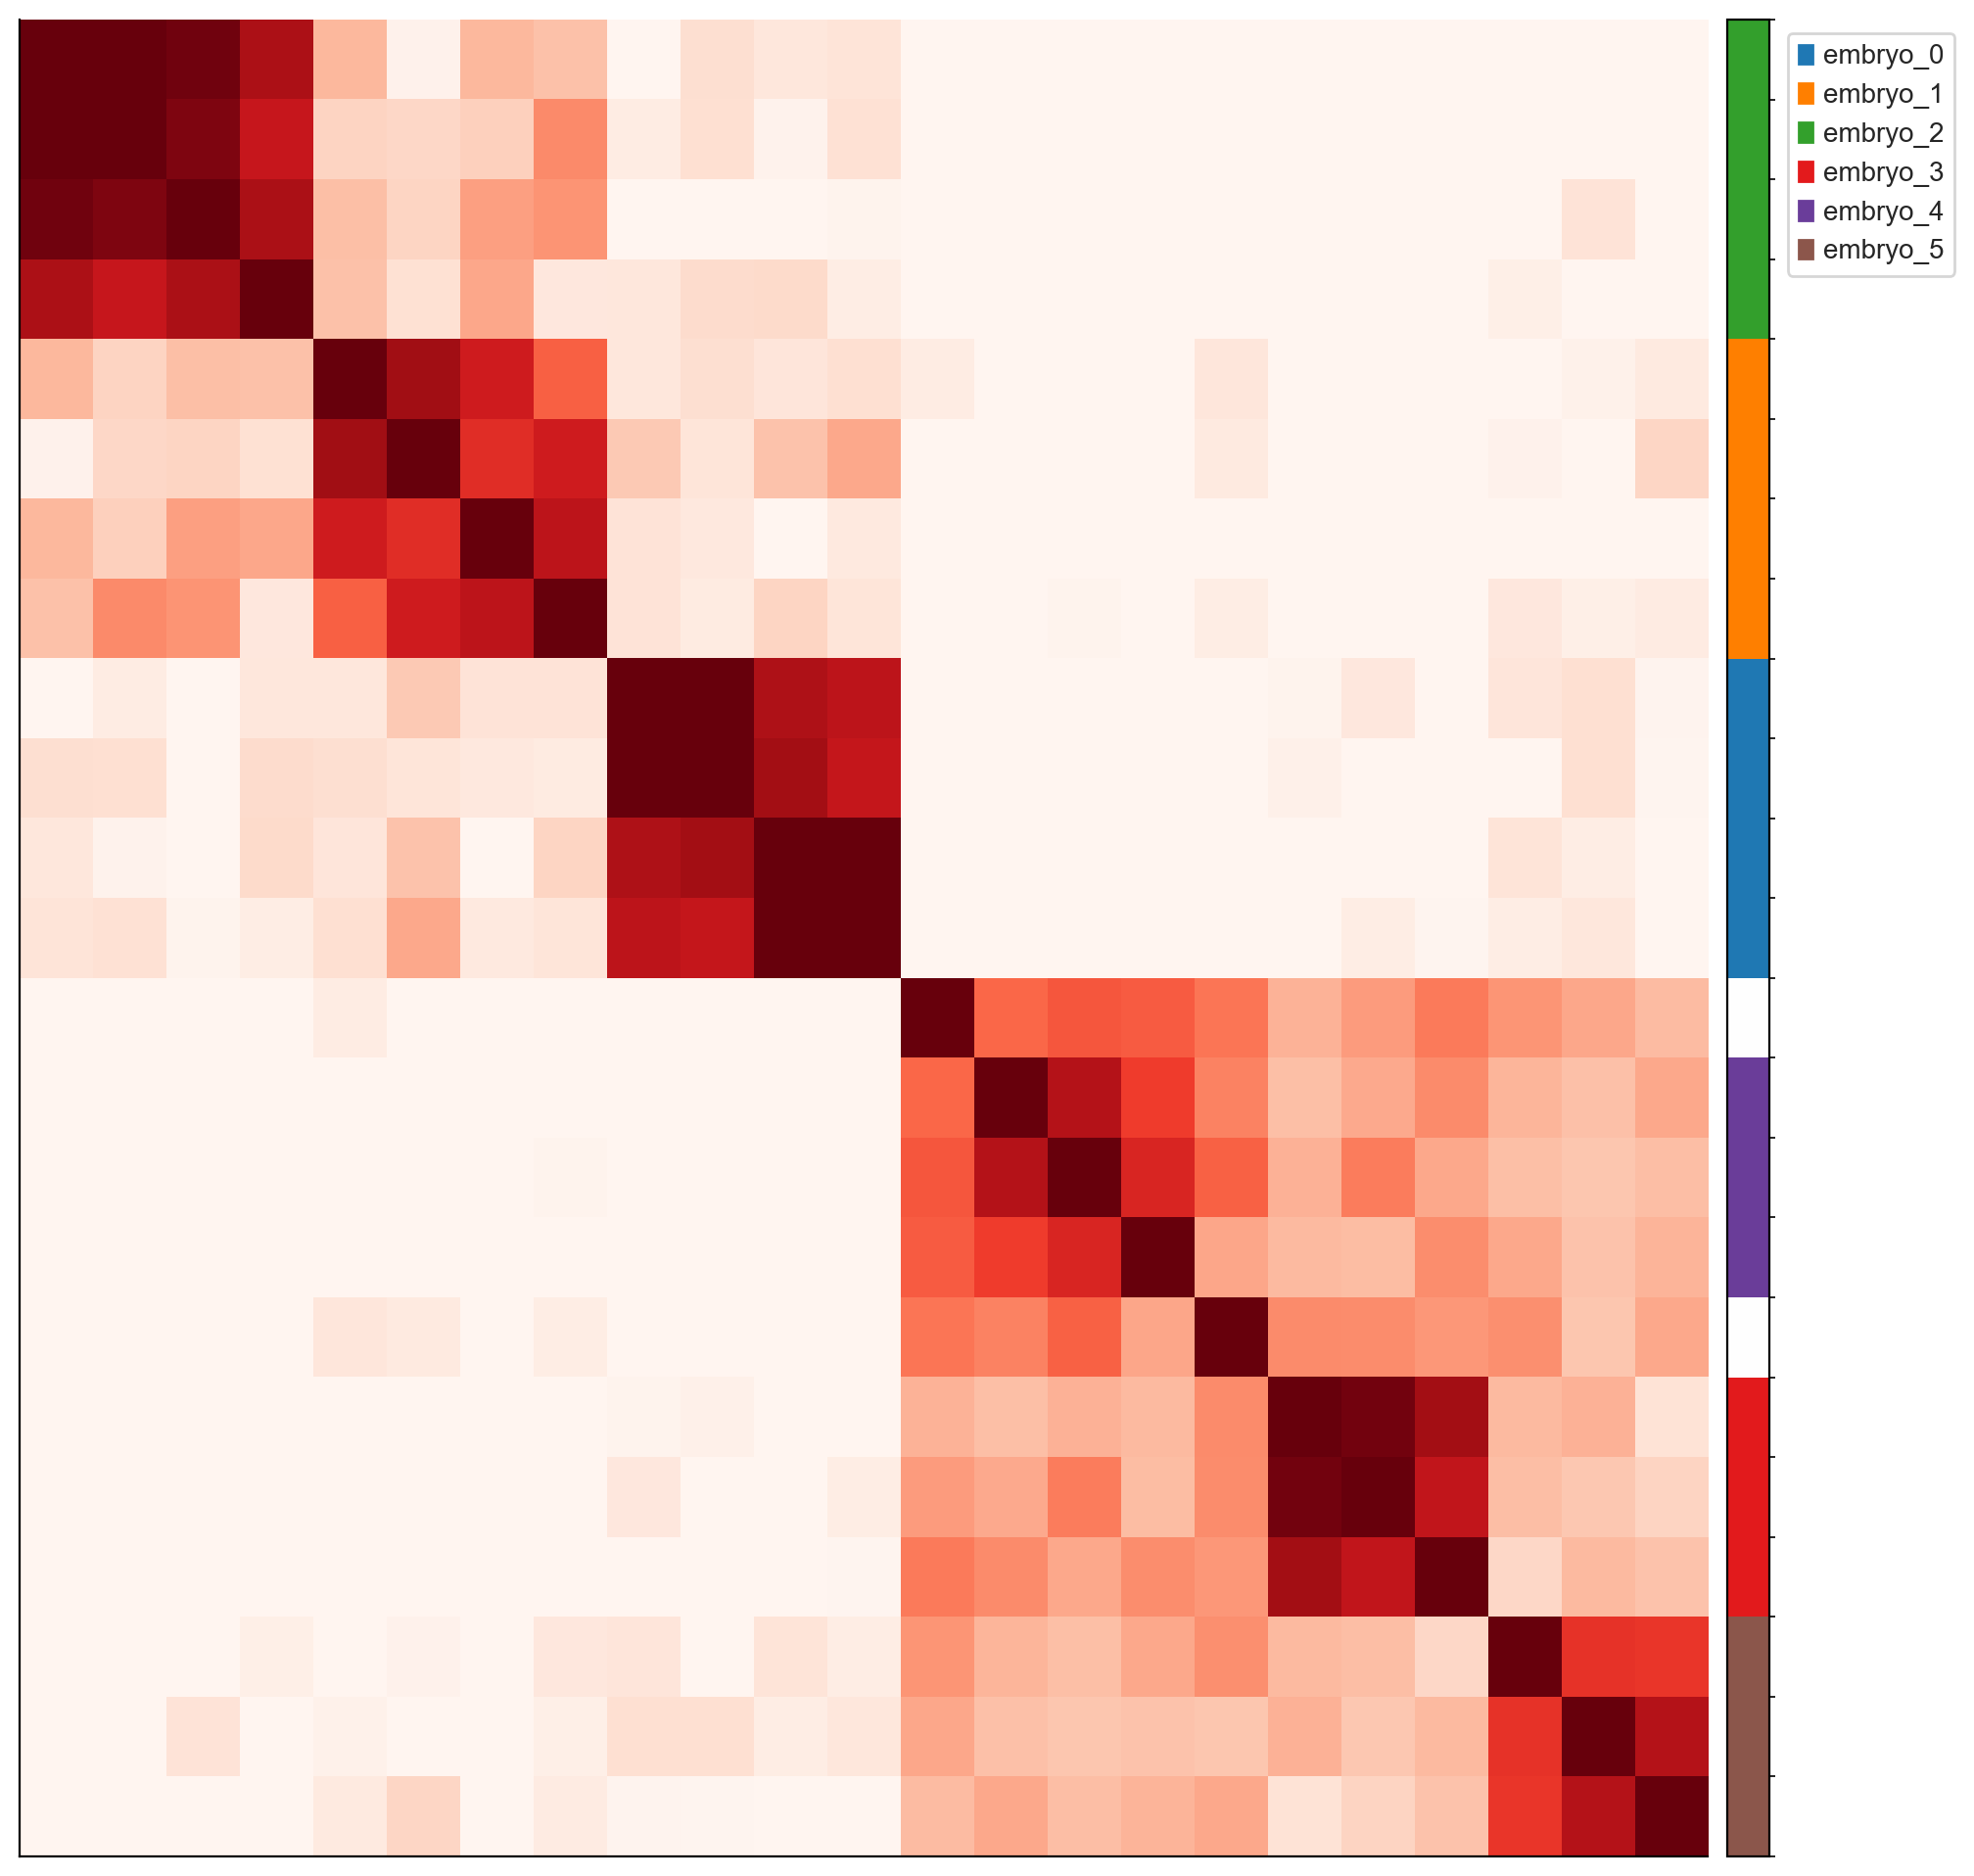

In [36]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## 8-Cell

In [37]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_8-Cell_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (35, 148549)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 69.76it/s]


duration: 0.5884029865264893
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▊                                                                                                                                                                                                                                                         | 3/1000 [00:00<00:00, 1590.36it/s]


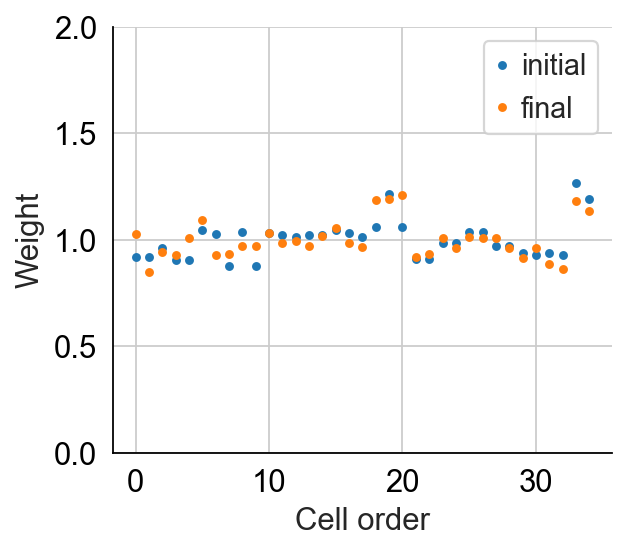

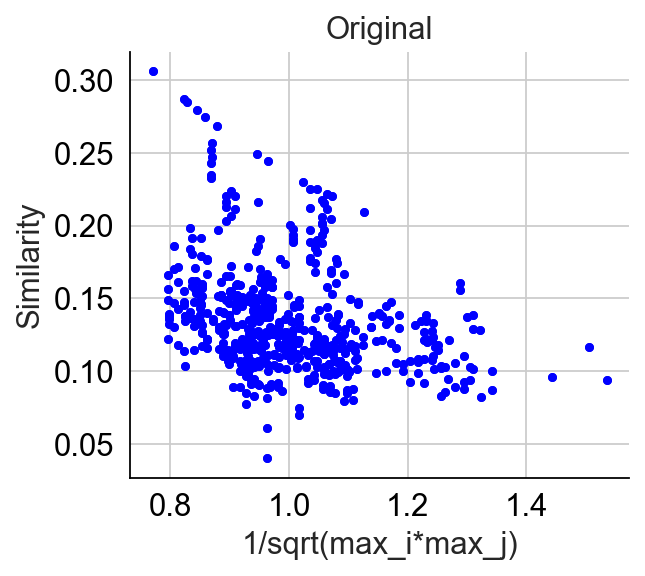

std: 0.036


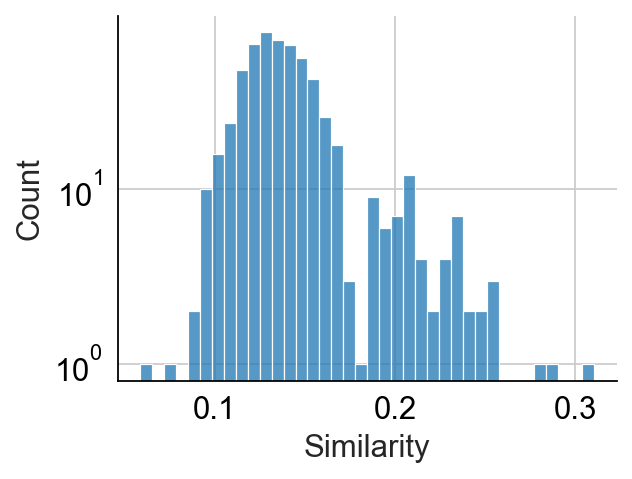

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  embryo_0           8       1.0         1.0      0.0         0.0   
1  embryo_1           4       1.0         1.0      0.0         0.0   
2  embryo_2           4       1.0         1.0      0.0         0.0   
3  embryo_3           4       1.0         1.0      0.0         0.0   
4  embryo_4           4       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0            0.275             0.3375        0.852043              0.550  
1            0.050             0.2750        0.975000              0.575  
2            0.150             0.3250        0.925000              0.550  
3            0.200             0.3500        0.900000              0.600  
4            0.150             0.3250        0.925000              0.550  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

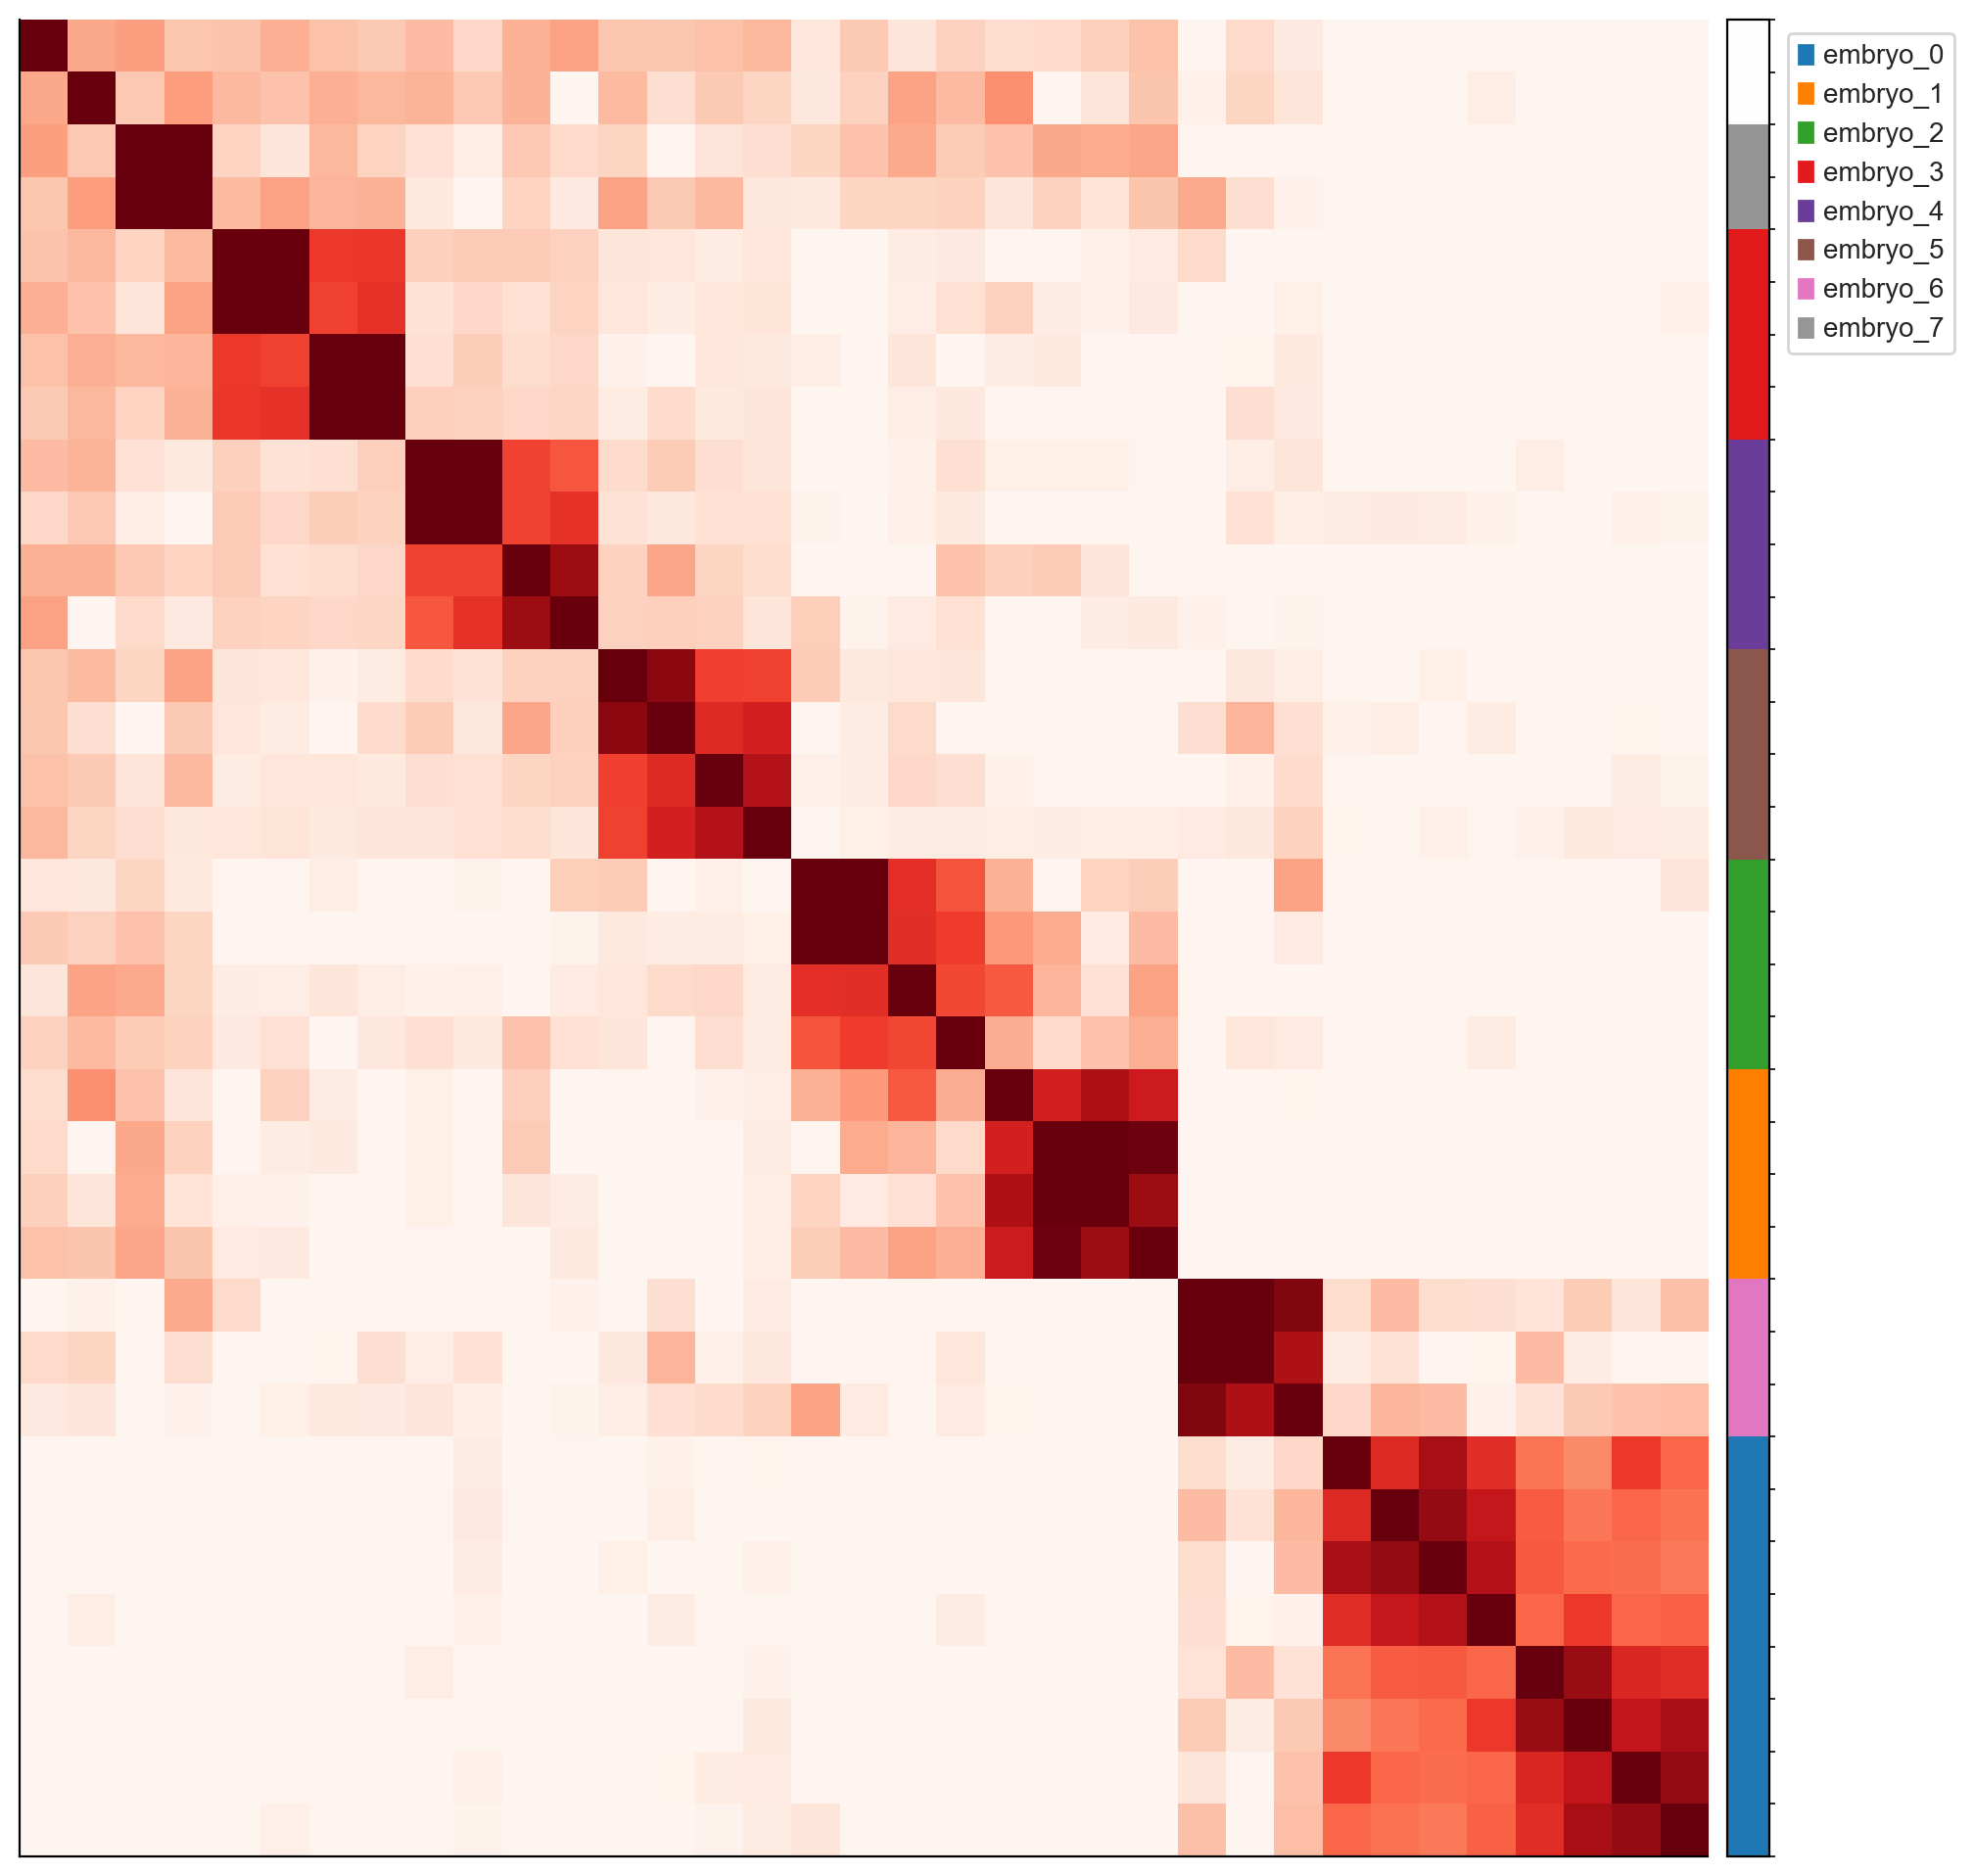

In [38]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## Morula

In [39]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_Morula_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (18, 132353)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 199.92it/s]


duration: 0.11916804313659668
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▌                                                                                                                                                                                                                                                         | 2/1000 [00:00<00:00, 2037.06it/s]


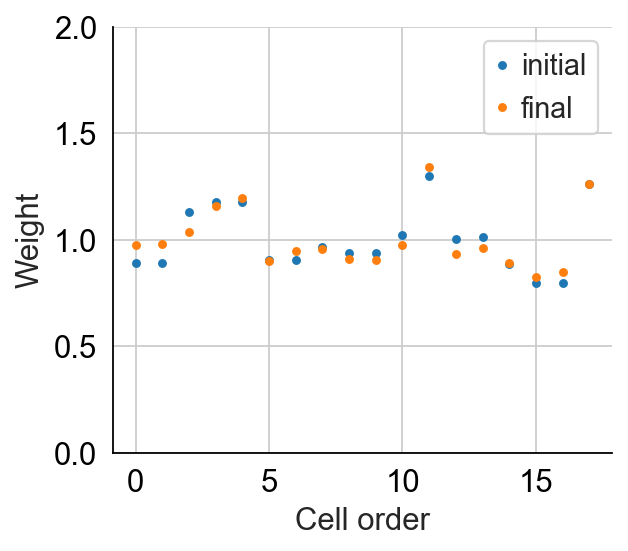

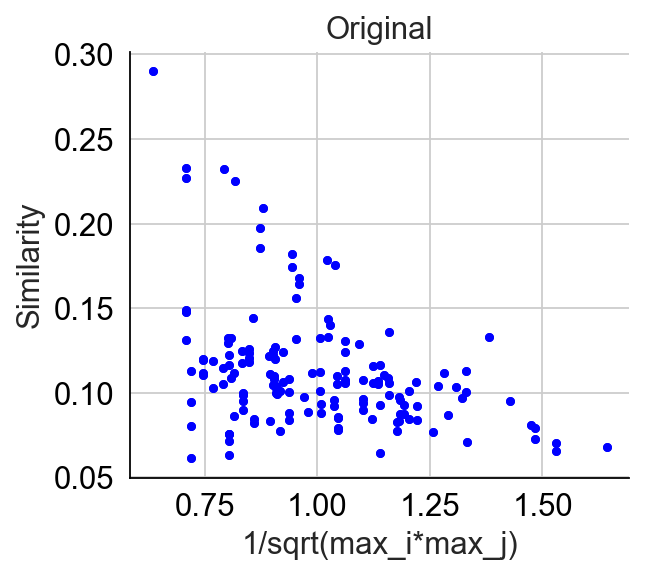

std: 0.075


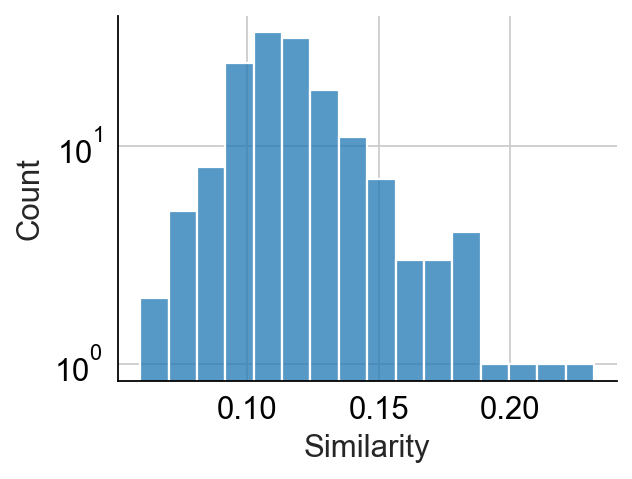

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  embryo_0           5       0.8         0.8  0.310918         0.2   
1  embryo_1           4       1.0         1.0  0.000000         0.0   
2  embryo_3           3       1.0         1.0  0.000000         0.0   
3  embryo_4           2       1.0         1.0  0.000000         0.0   
4  embryo_5           2       1.0         1.0  0.000000         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0            0.340           0.440000        0.786773              0.420  
1            0.275           0.400000        0.840564              0.425  
2            0.200           0.433333        0.873814              0.400  
3            0.100           0.550000        0.900000              0.450  
4            0.200           0.600000        0.800000              0.400  
mean continuity: 0.96
mean accuracy: 0.96
mean entropy: 0.06218350141651423
mean wassertein: 0

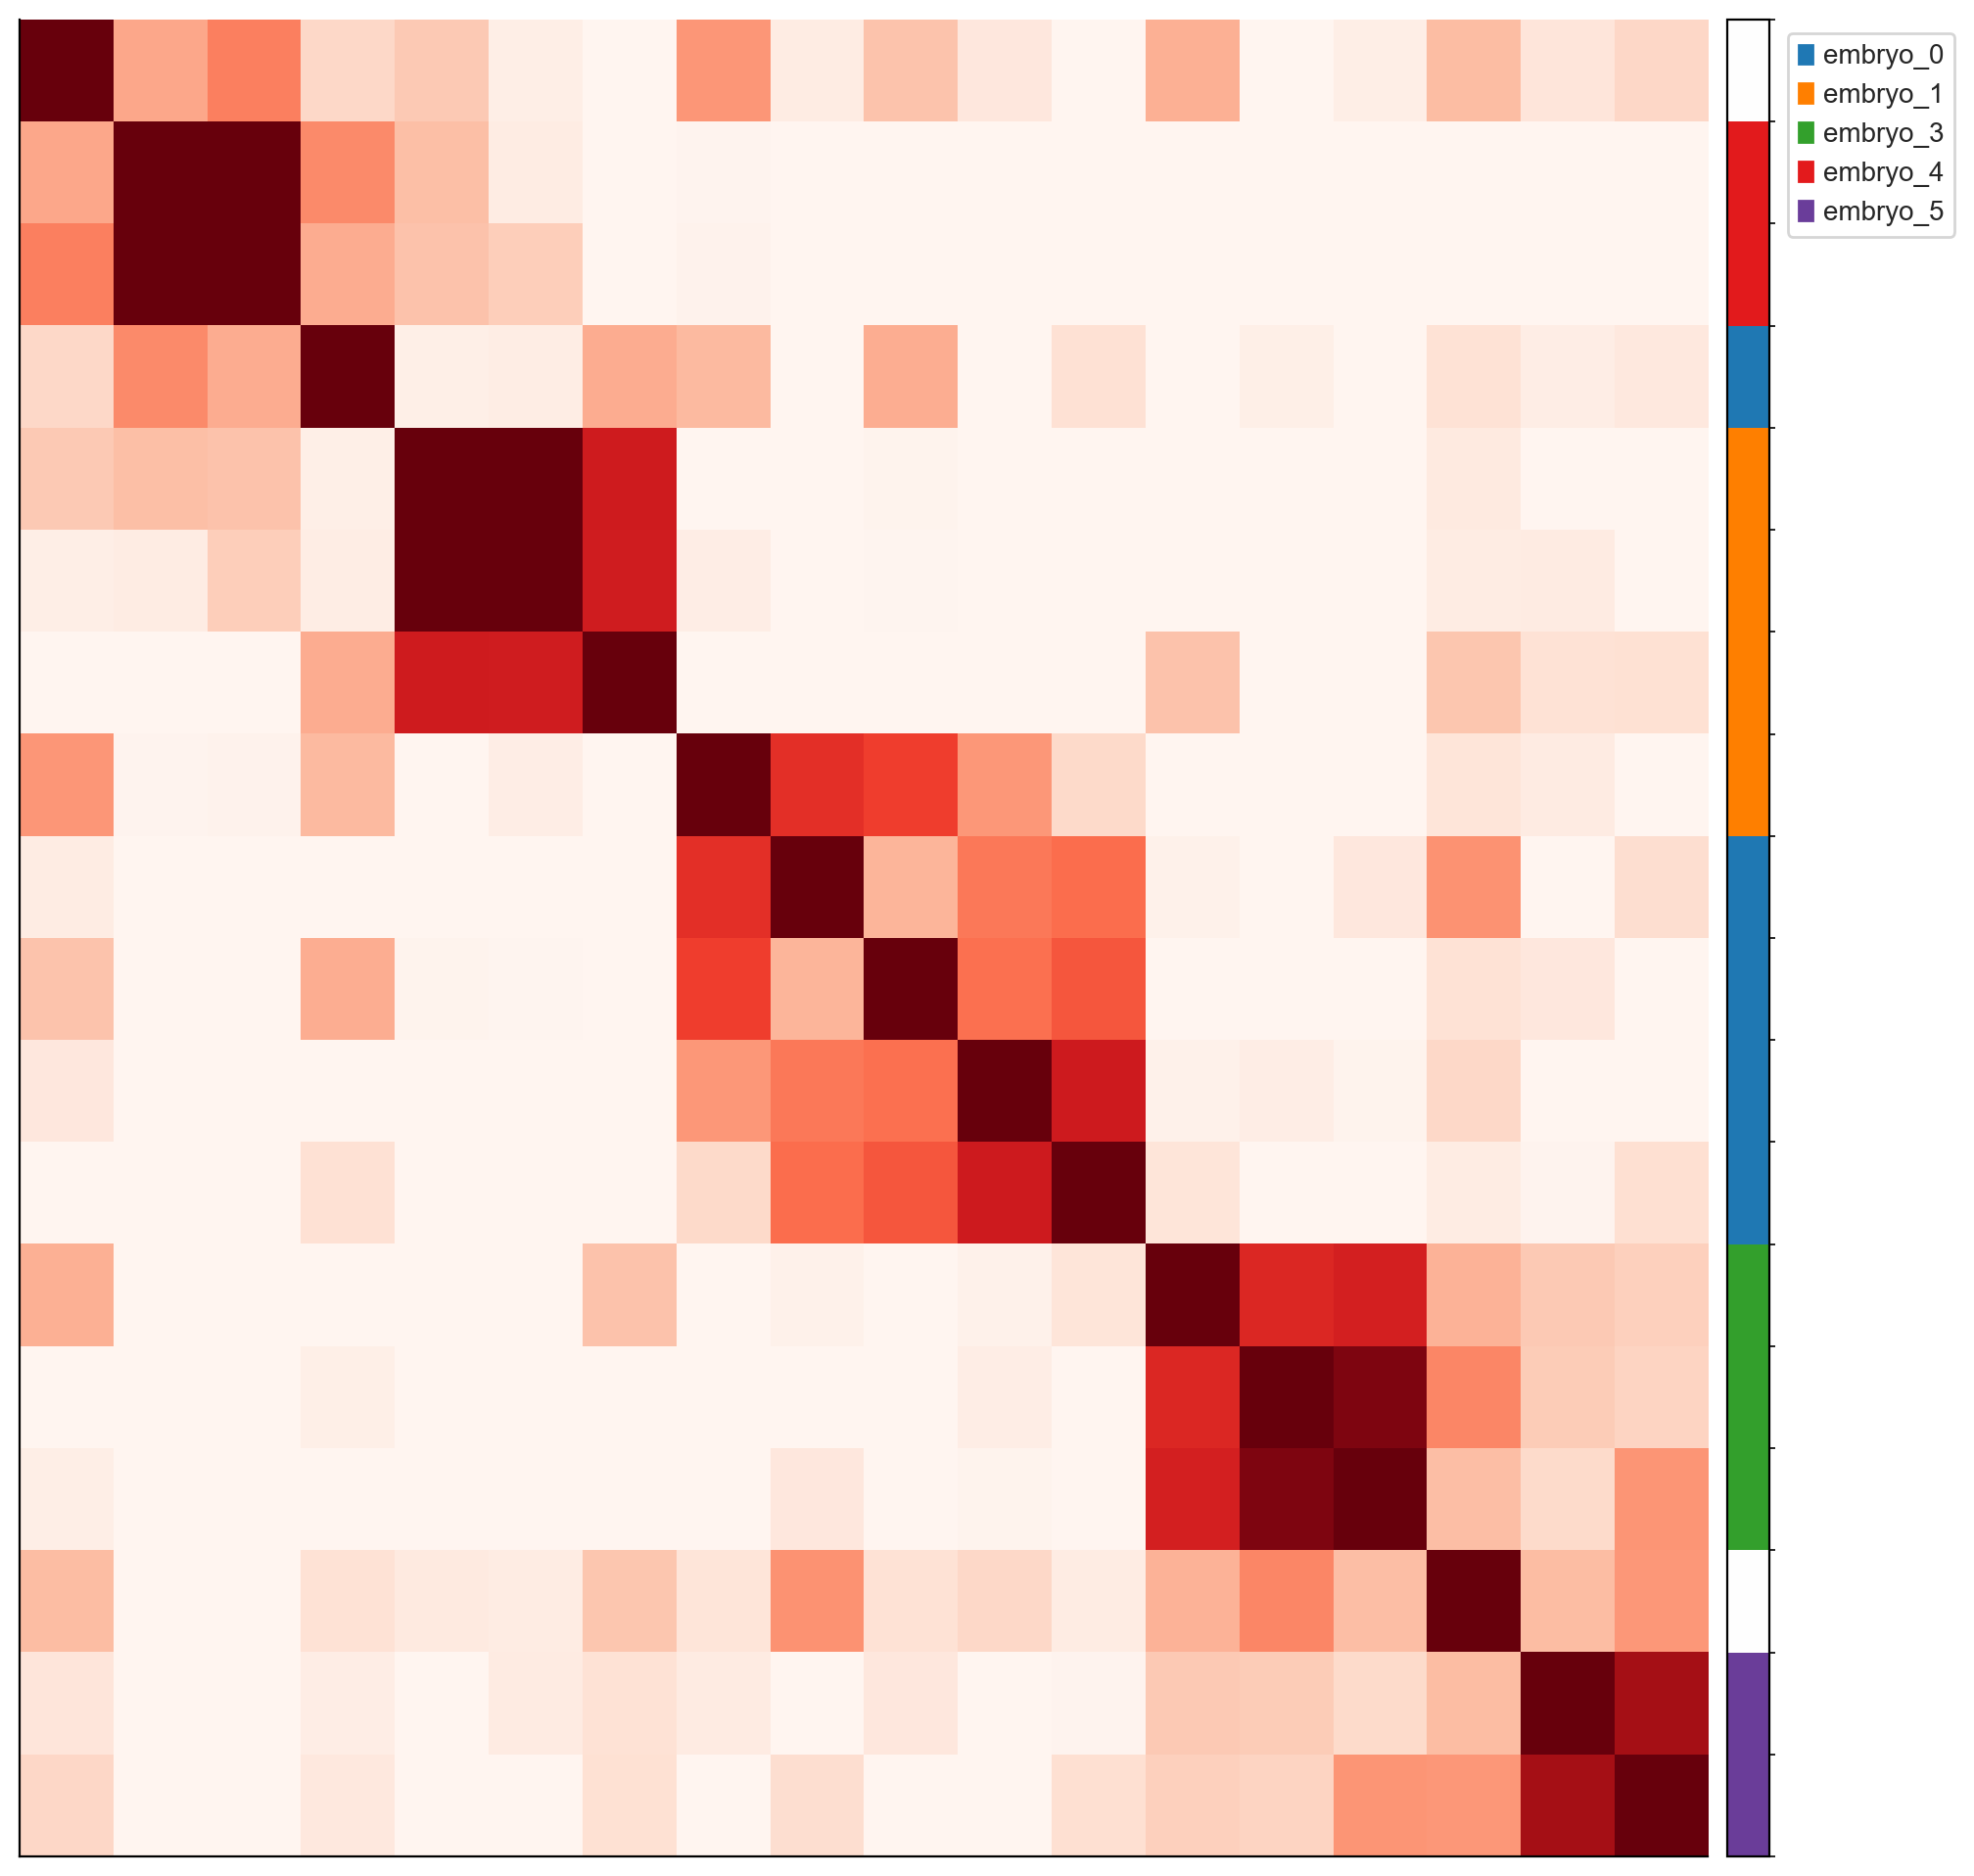

In [40]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## BlastoCyst

In [41]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/stage_BlastoCyst_neutral_thresh_Guo_2017_mouse_embryos_ICM_0.4_0.6_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (34, 124400)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 80.07it/s]


duration: 0.4871957302093506


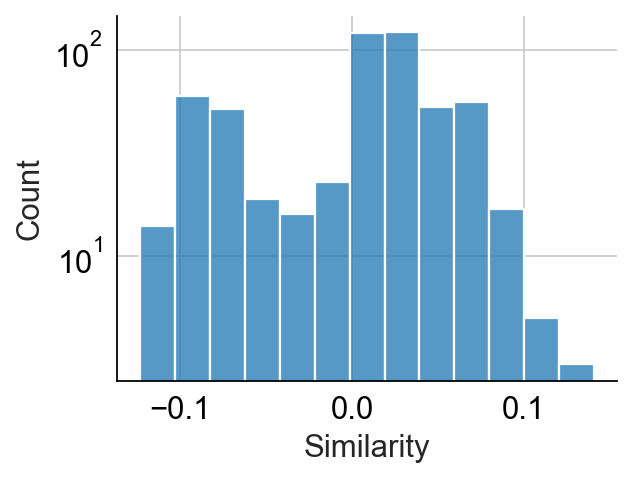

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0  embryo_1           7  0.571429    0.857143  0.350945    0.142857   
1  embryo_2           2  0.000000    0.500000  1.000000    0.500000   
2  embryo_3           3  0.666667    0.666667  0.579380    0.333333   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.600000           0.714286        0.455331           0.214286  
1         0.200000           0.600000        0.800000           0.400000  
2         0.266667           0.466667        0.831752           0.400000  
mean continuity: 0.6746031746031745
mean accuracy: 0.41269841269841273
mean entropy: 0.6434418357607119
mean wassertein: 0.32539682539682535
mean random_continuity: 0.5936507936507937
mean random_accuracy: 0.35555555555555557
mean random_entropy: 0.6956943237278287
mean random_wassertein: 0.33809523809523806


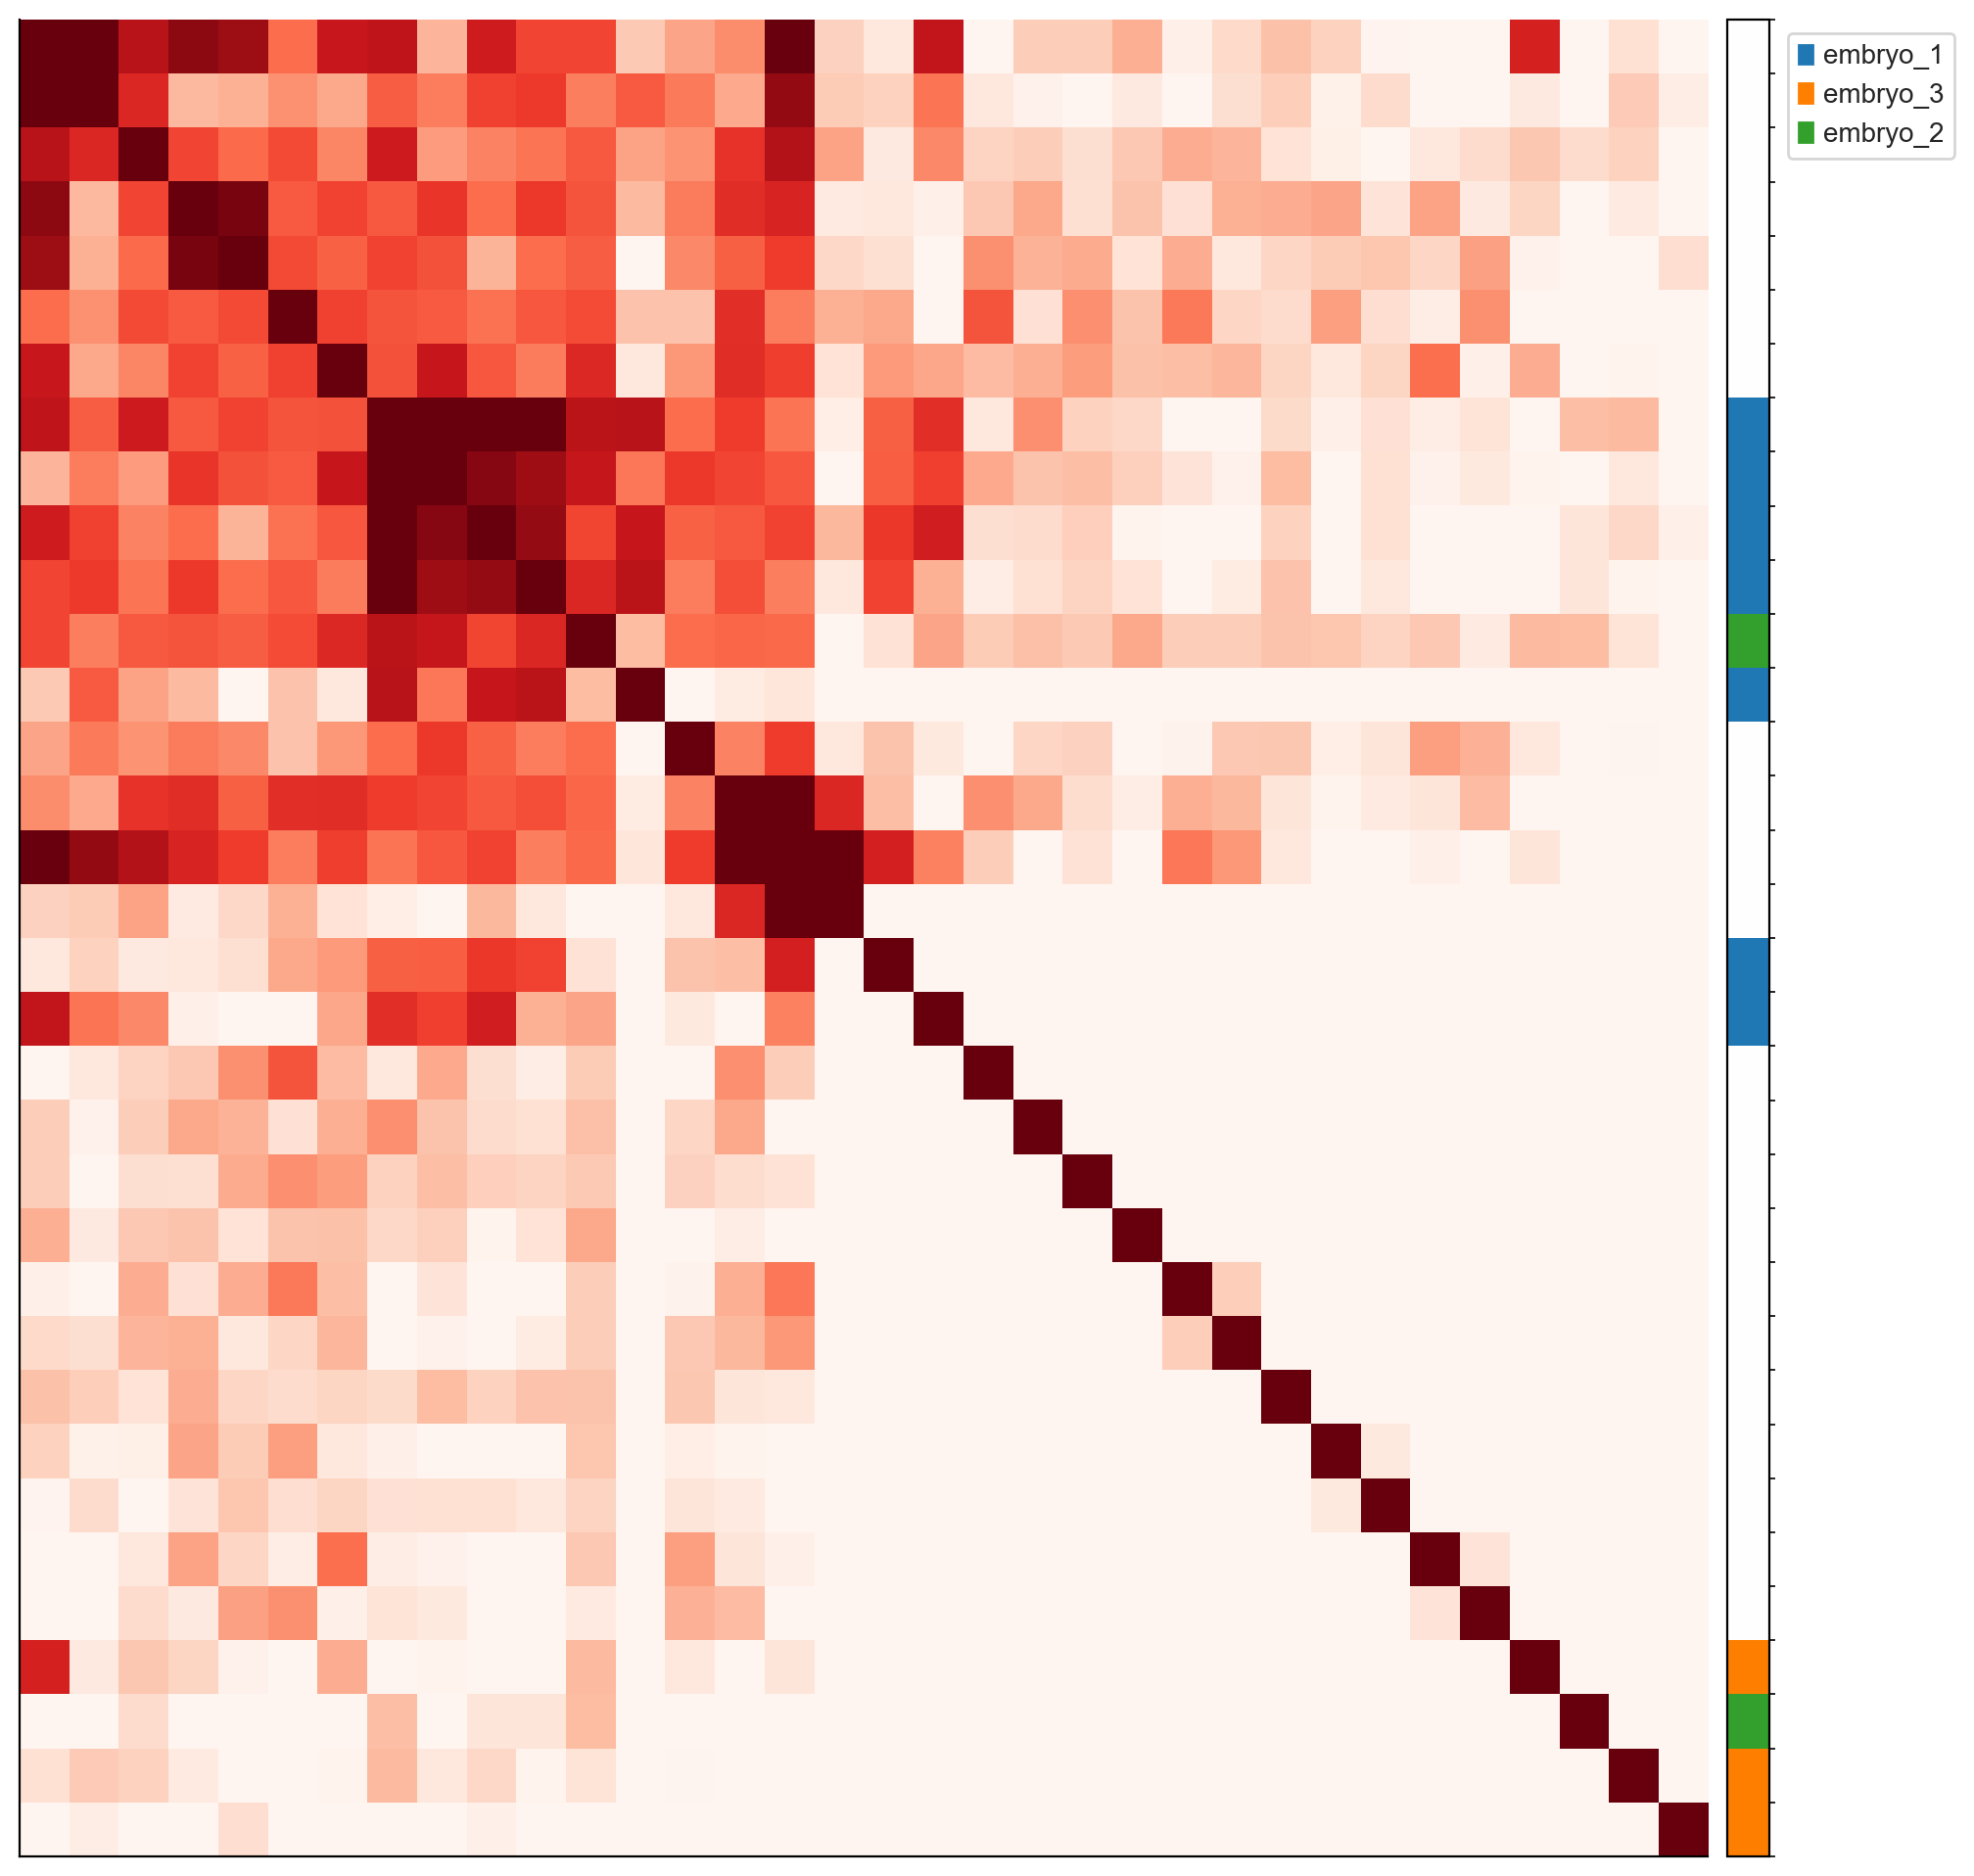

In [42]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=False,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# human_embryo (Fig5, ED.Fig5)

In [43]:
data_sets = 'human_embryo'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 440; config samples: 440; merged samples: 440
Genome reference: GRCh38


In [44]:
clone_key = 'embryo'

## D5

In [45]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/lineage_D5_neutral_thresh_2022_human_embryo_spindle_transfer_onlymet_D6_readNcutoff_5_0.2_0.5_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (122, 427108)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:25<00:00,  4.82it/s]


duration: 26.108815908432007
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|███▏                                                                                                                                                                                                                                                     | 13/1000 [00:00<00:00, 1952.80it/s]


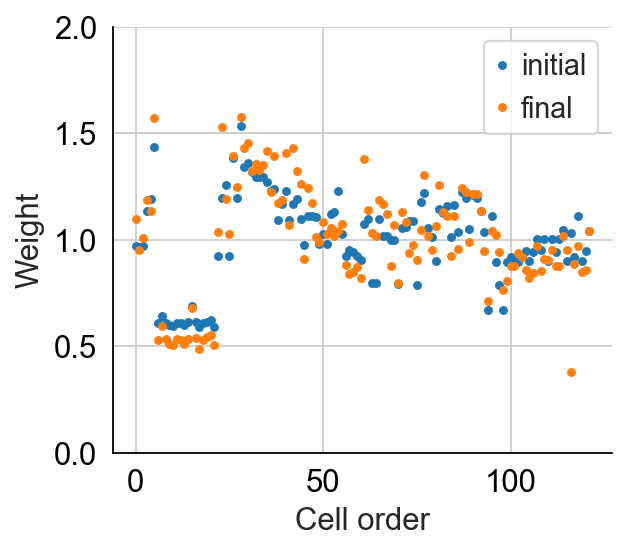

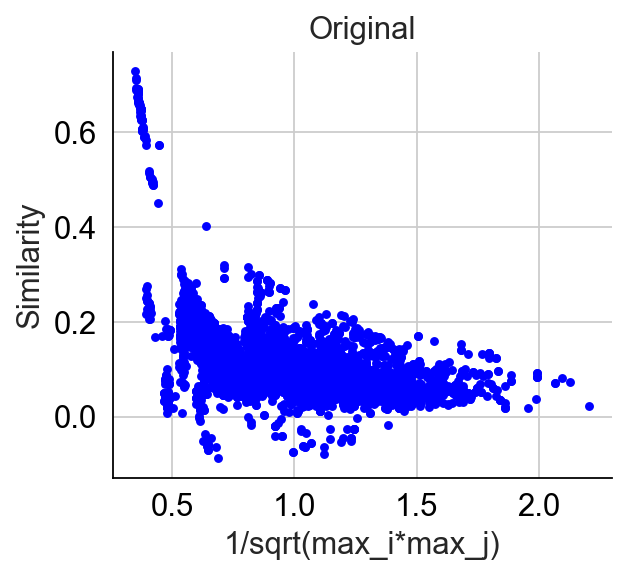

std: 0.085


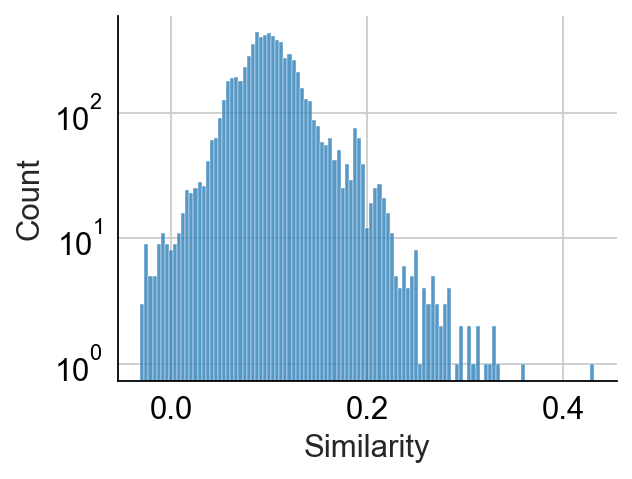

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   E11           3       1.0         1.0      0.0         0.0   
1   E12           3       1.0         1.0      0.0         0.0   
2   E15          16       1.0         1.0      0.0         0.0   
3    E2          18       1.0         1.0      0.0         0.0   
4   E23           4       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.133333           0.400000        0.915876           0.600000  
1         0.133333           0.400000        0.915876           0.600000  
2         0.106250           0.181250        0.939445           0.693750  
3         0.127778           0.238889        0.909052           0.677778  
4         0.050000           0.275000        0.975000           0.700000  
mean continuity: 0.9960474308300395
mean accuracy: 0.9960474308300395
mean entropy: 0.005185347925761157
mean wassertein: 0.

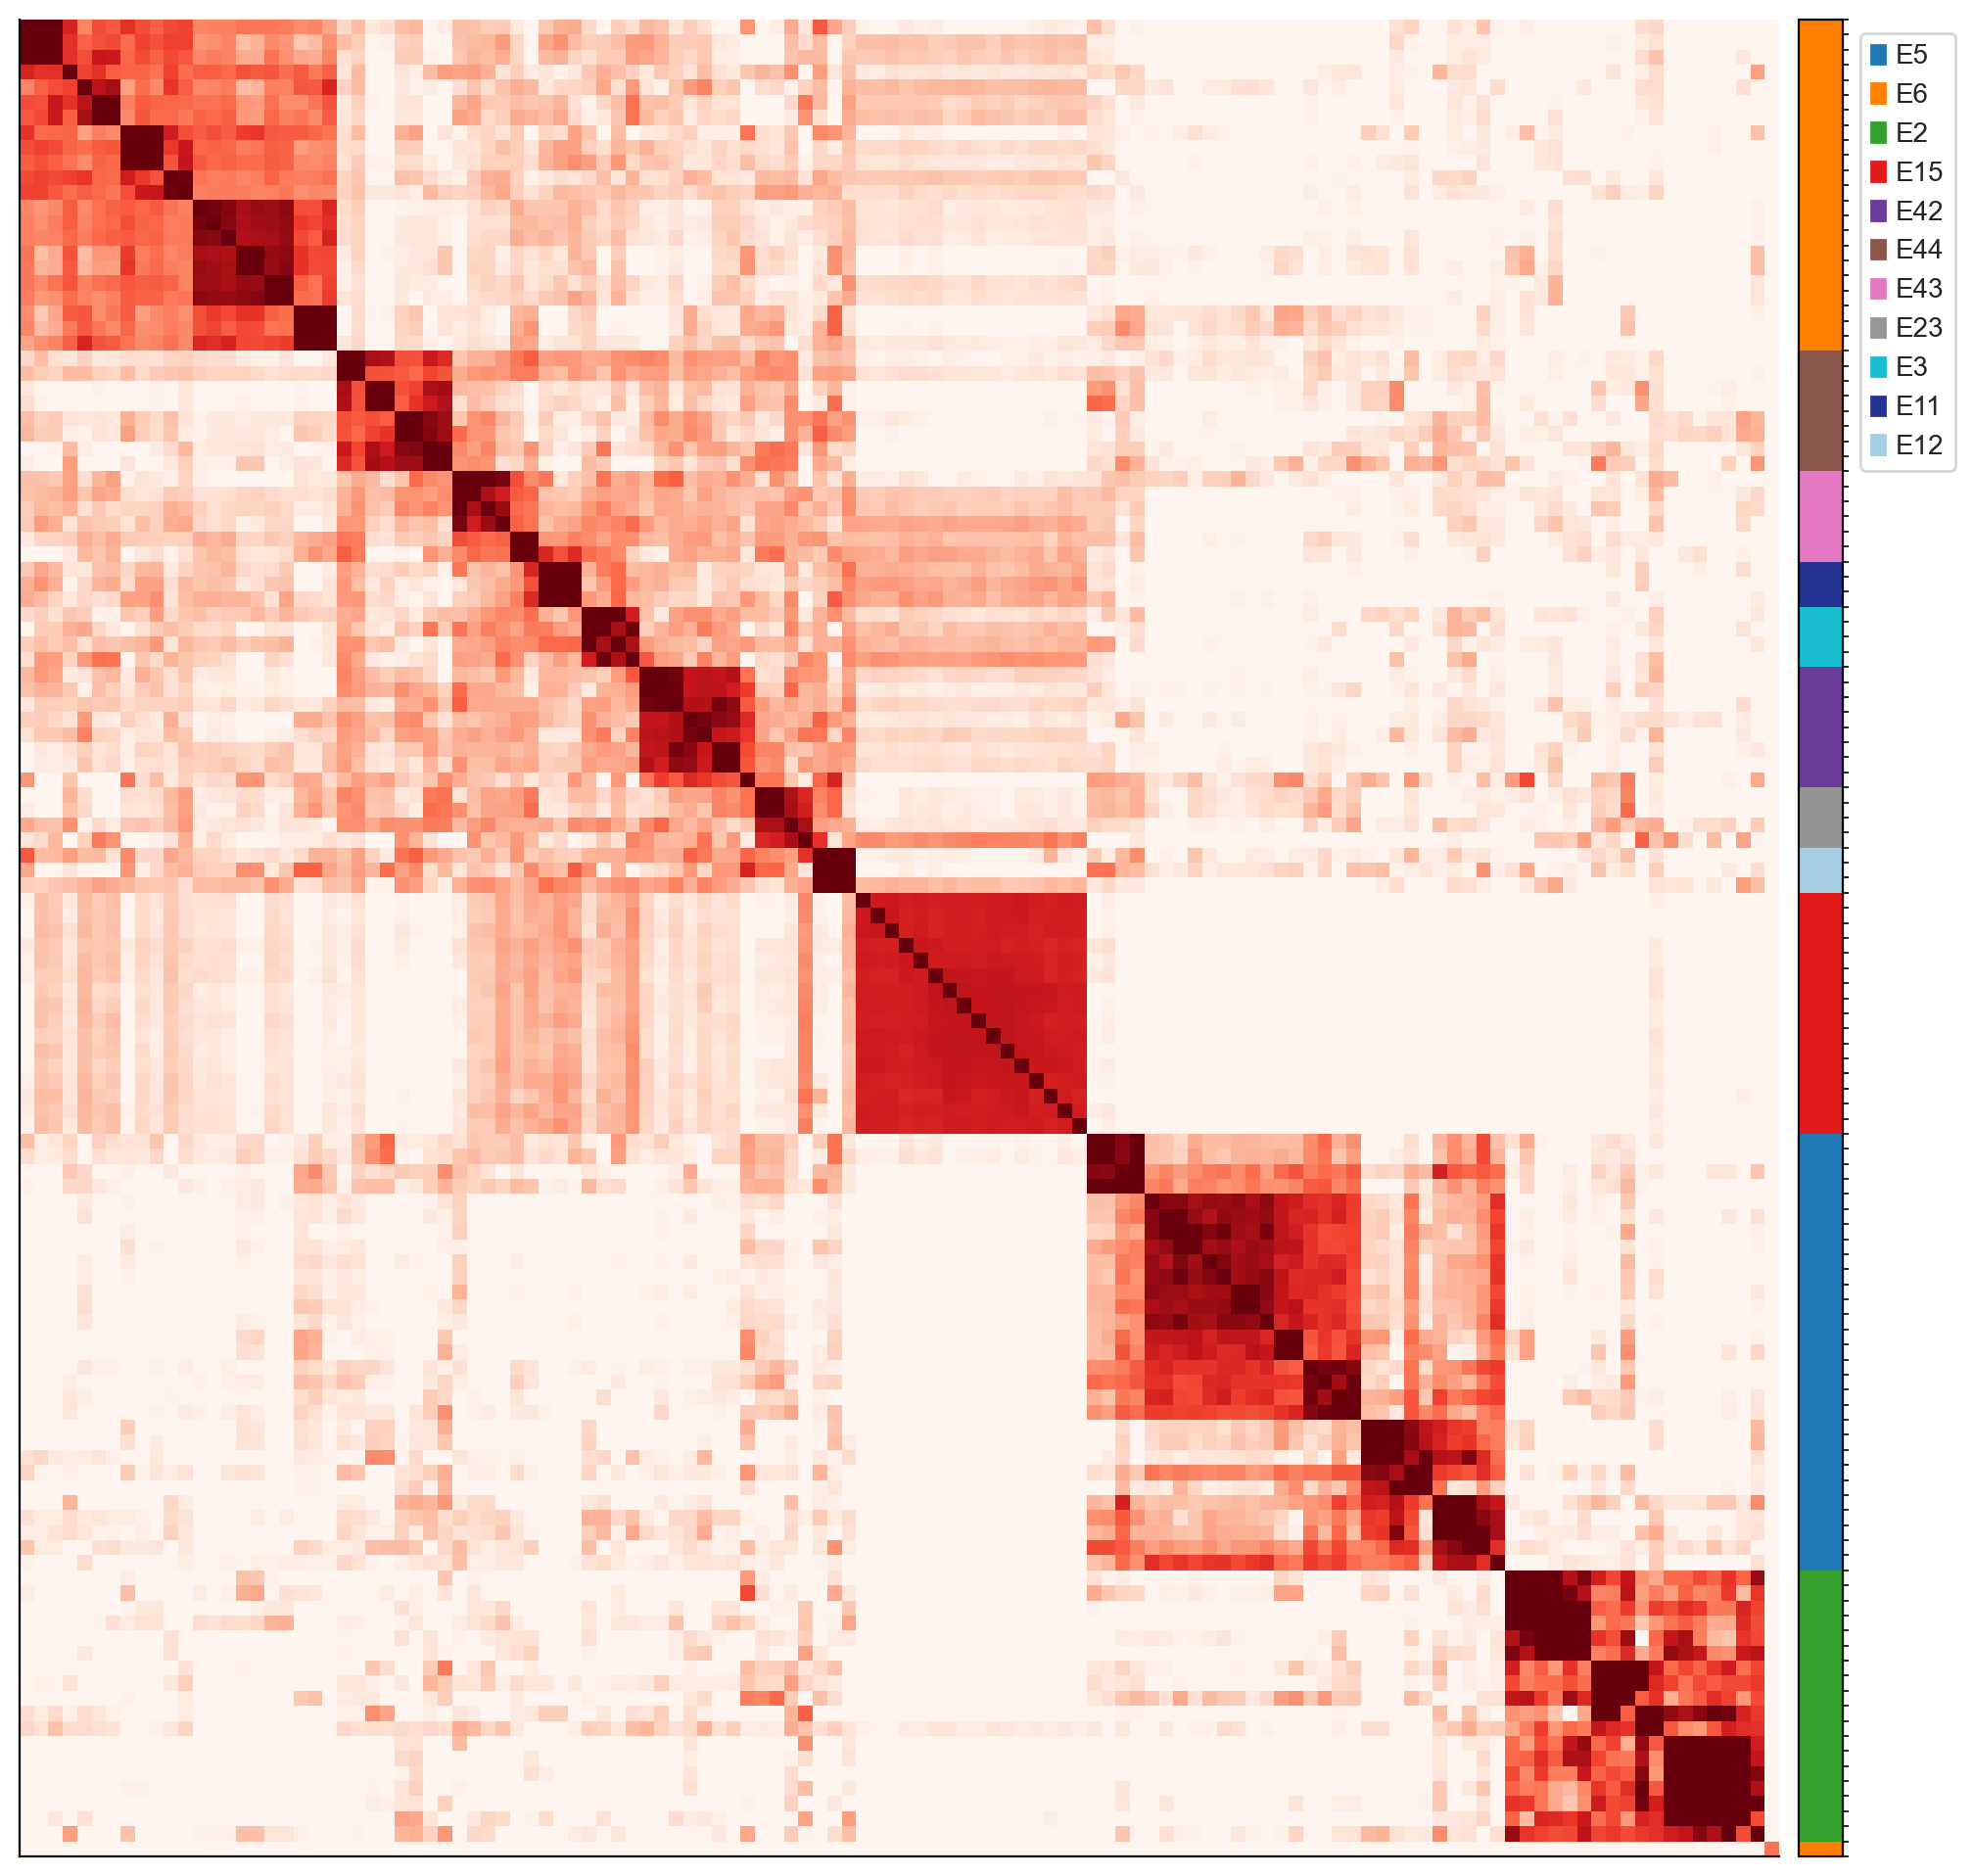

In [46]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## D6

In [47]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/lineage_D6_neutral_thresh_2022_human_embryo_spindle_transfer_onlymet_D6_readNcutoff_5_0.2_0.5_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (257, 470450)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 257/257 [02:09<00:00,  1.98it/s]


duration: 134.06011176109314
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  2%|██████▎                                                                                                                                                                                                                                                   | 25/1000 [00:00<00:01, 877.26it/s]


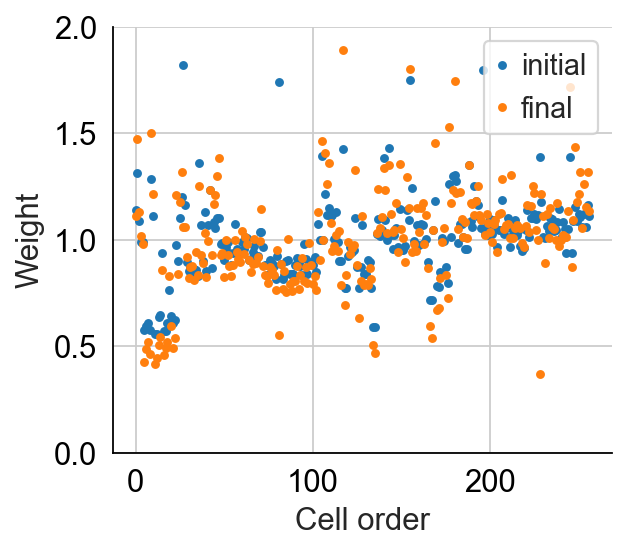

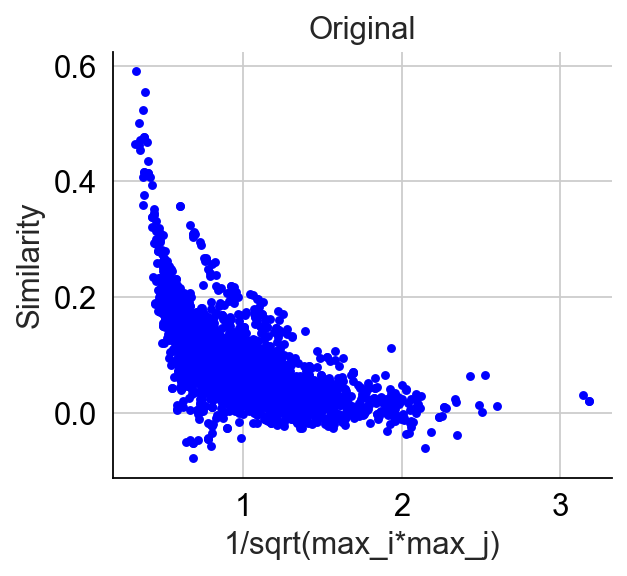

std: 0.052


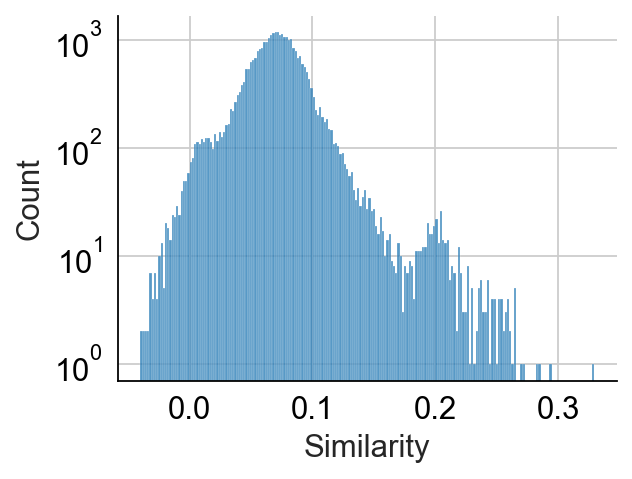

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   E14           3       1.0         1.0      0.0         0.0   
1   E16           4       1.0         1.0      0.0         0.0   
2   E17           2       1.0         1.0      0.0         0.0   
3   E18           2       1.0         1.0      0.0         0.0   
4   E19           2       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0              0.0           0.333333             1.0           0.666667  
1              0.0           0.250000             1.0           0.725000  
2              0.0           0.500000             1.0           0.500000  
3              0.0           0.500000             1.0           0.500000  
4              0.0           0.500000             1.0           0.500000  
mean continuity: 0.9476666666666667
mean accuracy: 0.9352222222222223
mean entropy: 0.0870301141766603
mean wassertein: 0.06

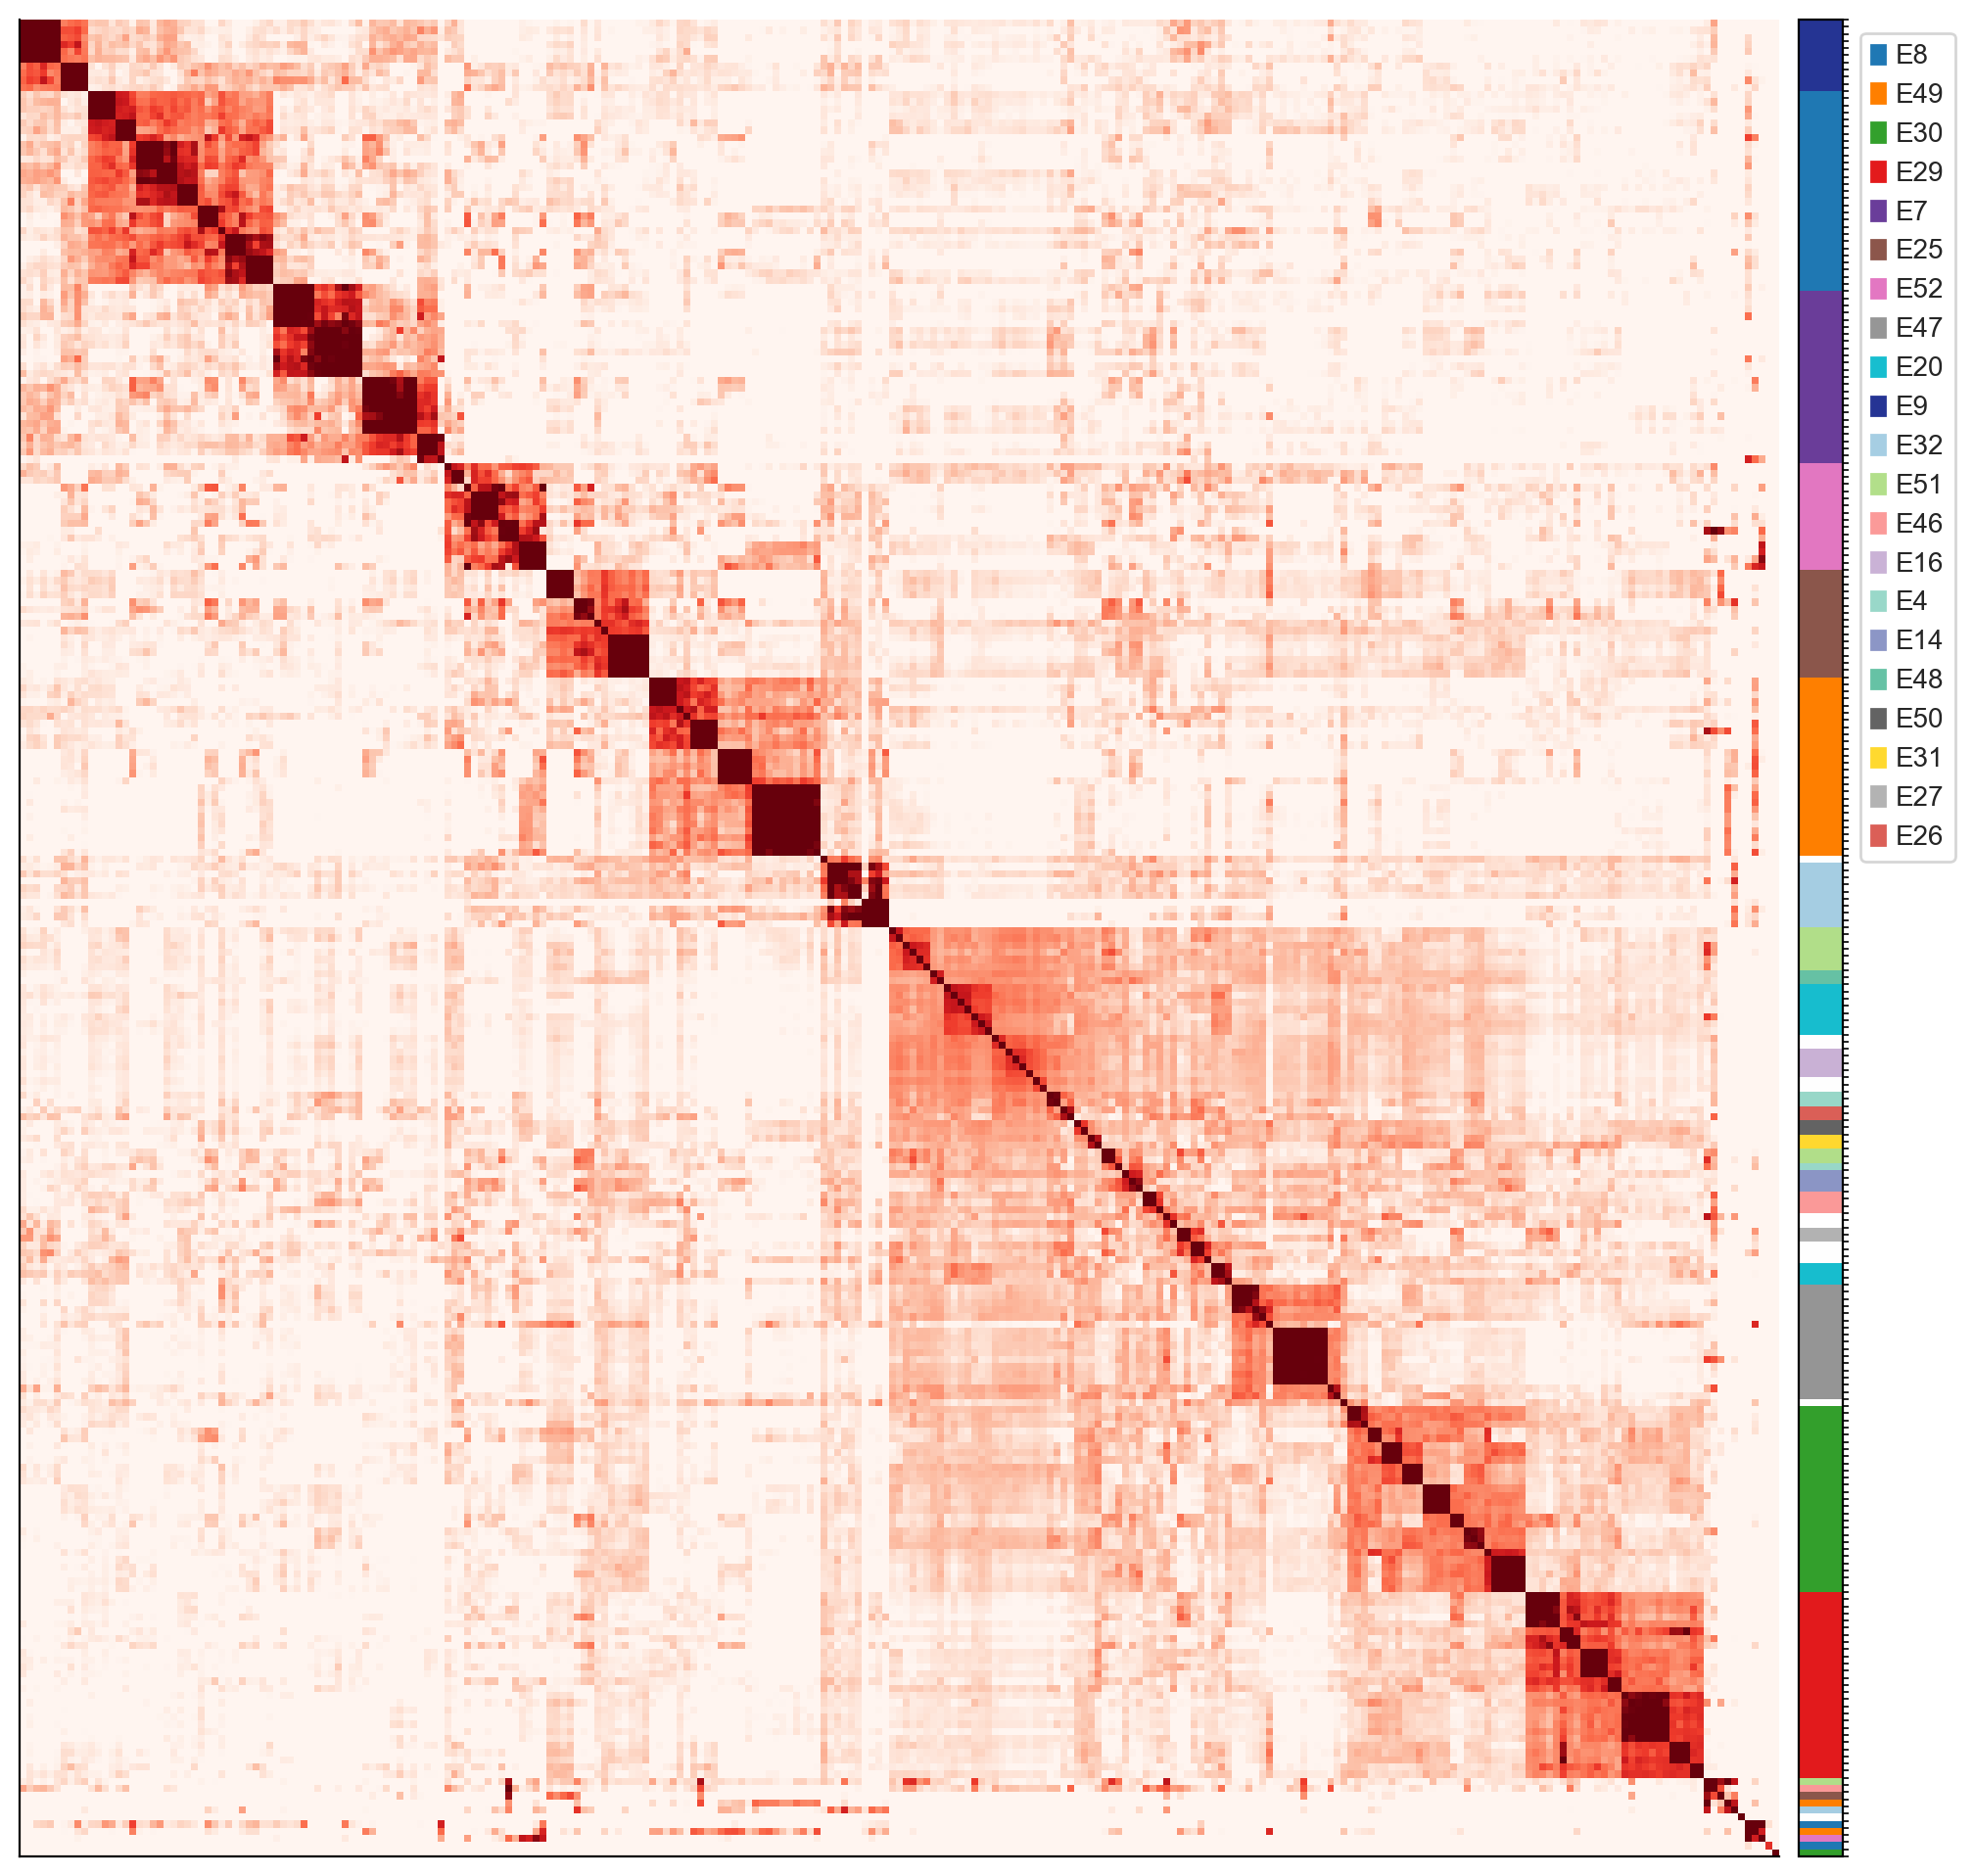

In [48]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## D7

In [49]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/lineage_D7_neutral_thresh_2022_human_embryo_spindle_transfer_onlymet_D6_readNcutoff_5_0.2_0.5_readcutoff3_minCov0.1_met_ExcludeSex1.h5ad')

Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex1', '.h5ad'].


use provided adata
adata shape:  (16, 465411)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 32.56it/s]


duration: 0.5896599292755127
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  1%|█▌                                                                                                                                                                                                                                                        | 6/1000 [00:00<00:00, 4065.56it/s]


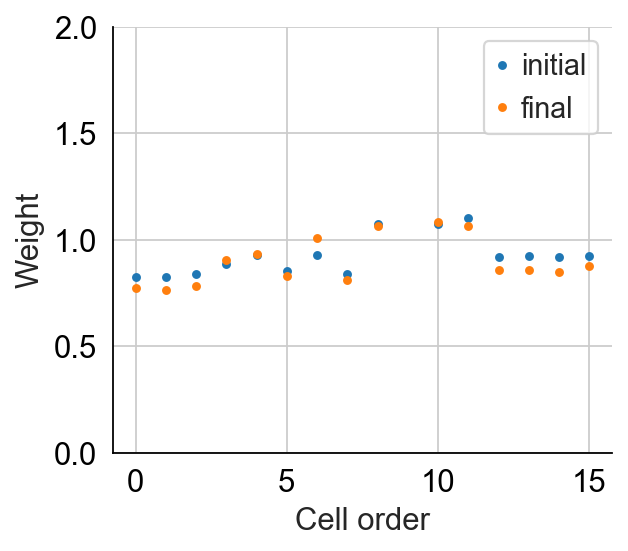

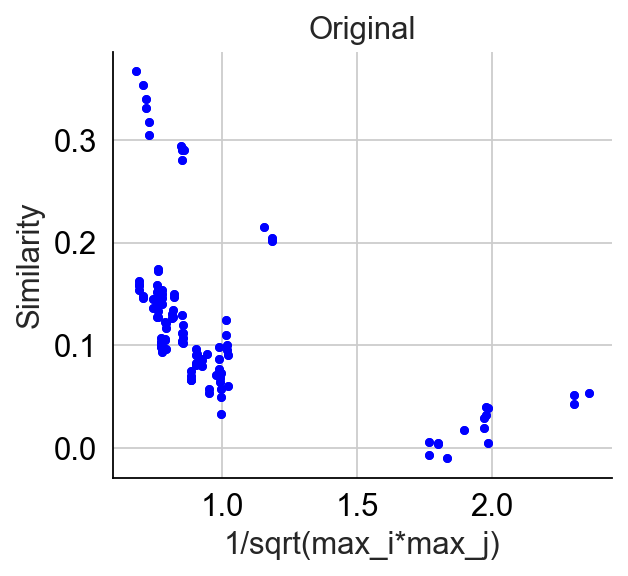

std: 0.350


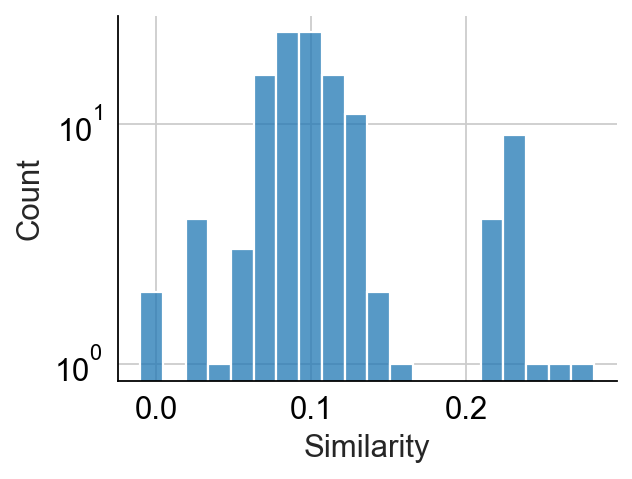

Reconstruction method: UPGMA
  clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   E34           8       1.0         1.0      0.0         0.0   
1   E35           4       1.0         1.0      0.0         0.0   
2   E45           4       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0           0.4125             0.5875        0.631128             0.3125  
1           0.2500             0.4000        0.850000             0.4750  
2           0.2500             0.3750        0.875000             0.4500  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuity: 0.45416666666666666
mean random_accuracy: 0.30416666666666664
mean random_entropy: 0.785375937481971
mean random_wassertein: 0.41250000000000003


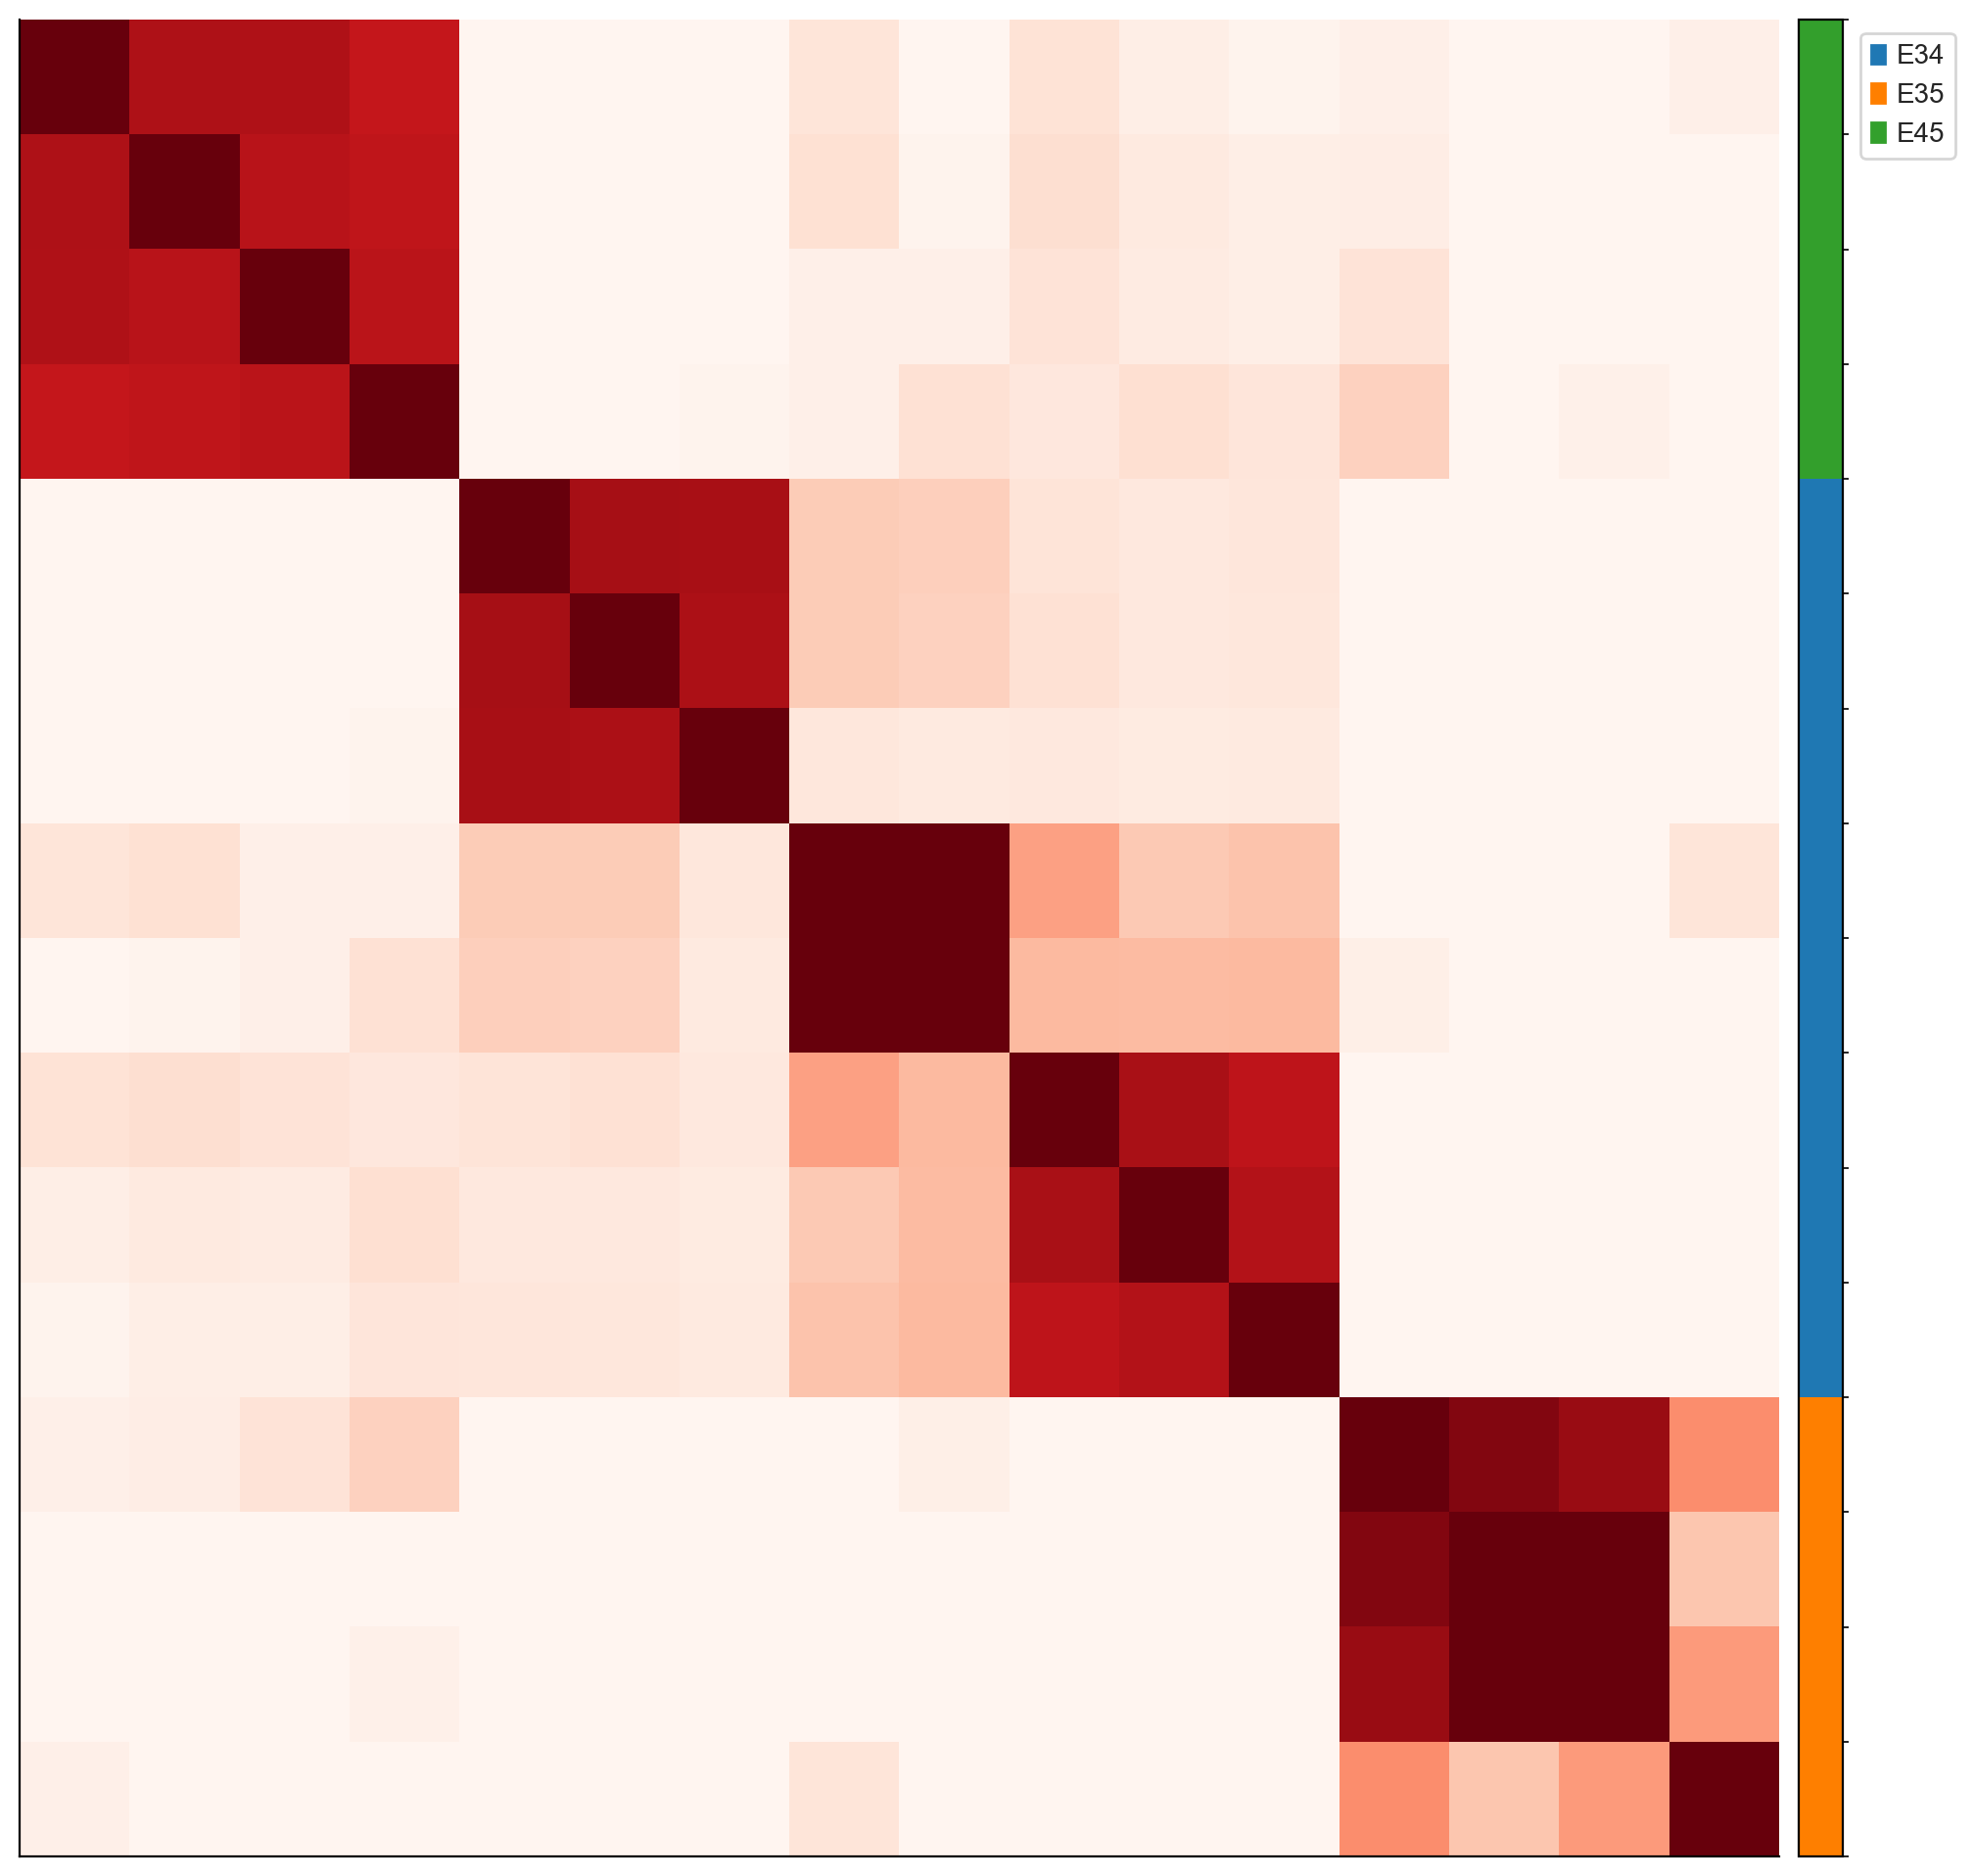

In [50]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


# DARLIN_HSC (Fig6, ED.Fig6)

In [51]:
data_sets = 'DARLIN_HSC'

current_directory = os.getcwd()

data_path=f'{current_directory}/metadata/{data_sets}/downstream_R/df_sample'
df_sample=methyltree.metadata.update_samples_from_config(data_path)

with open(f'{data_path}/../../config.yaml', 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)
    if 'reference' not in yaml_data['bismark']:
        genome_reference='mm10'
    else:
        genome_reference=yaml_data['bismark']['reference']
        
    if genome_reference=='mm10':
        profile_annotation='prom_2000_2000'
        ref_prefix=''
    else:
        ref_prefix=f'{genome_reference}_'
        profile_annotation=f'{genome_reference}_prom_2000_2000'
    print(f'Genome reference: {genome_reference}')

Initialize sample info
old_samples: 1365; config samples: 191; merged samples: 1365
Genome reference: mm10


In [52]:
clone_key = 'large_clone_id'

## LL731

In [53]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL731_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (206, 214726)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:16<00:00, 12.34it/s]


duration: 17.367406129837036
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|█▎                                                                                                                                                                                                                                                         | 5/1000 [00:00<00:01, 926.96it/s]


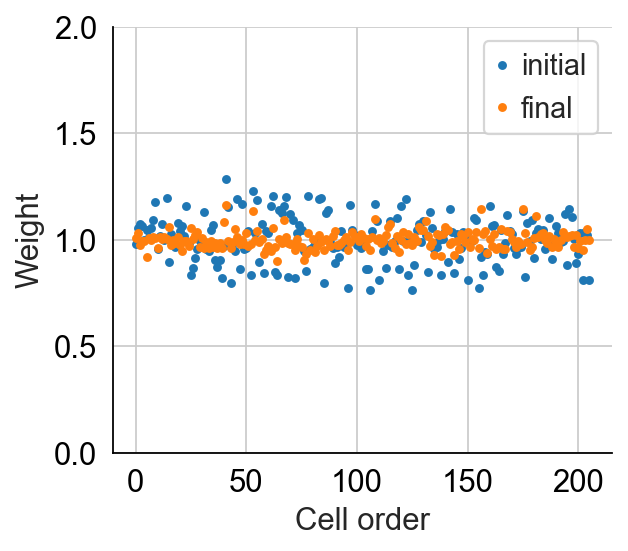

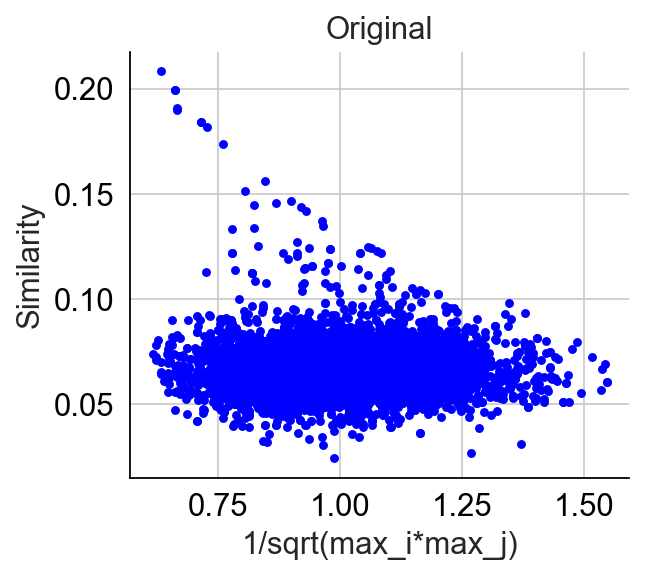

std: 0.007


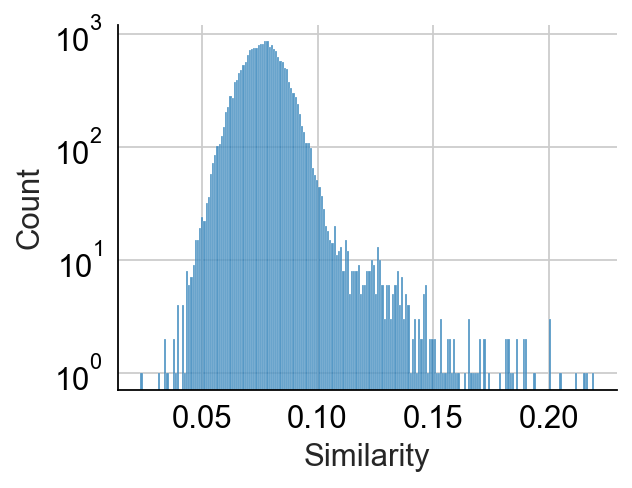

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0          12  0.833333    0.833333  0.22781    0.166667   
1   clone_1           8  1.000000    1.000000  0.00000    0.000000   
2  clone_10           3  1.000000    1.000000  0.00000    0.000000   
3  clone_11           2  1.000000    1.000000  0.00000    0.000000   
4  clone_12           2  1.000000    1.000000  0.00000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0            0.175           0.241667        0.905264           0.608333  
1            0.125           0.212500        0.935376           0.600000  
2            0.000           0.333333        1.000000           0.666667  
3            0.000           0.500000        1.000000           0.500000  
4            0.100           0.550000        0.900000           0.450000  
mean continuity: 0.9444444444444445
mean accuracy: 0.896825396825397
mean entropy: 0.106086174284558

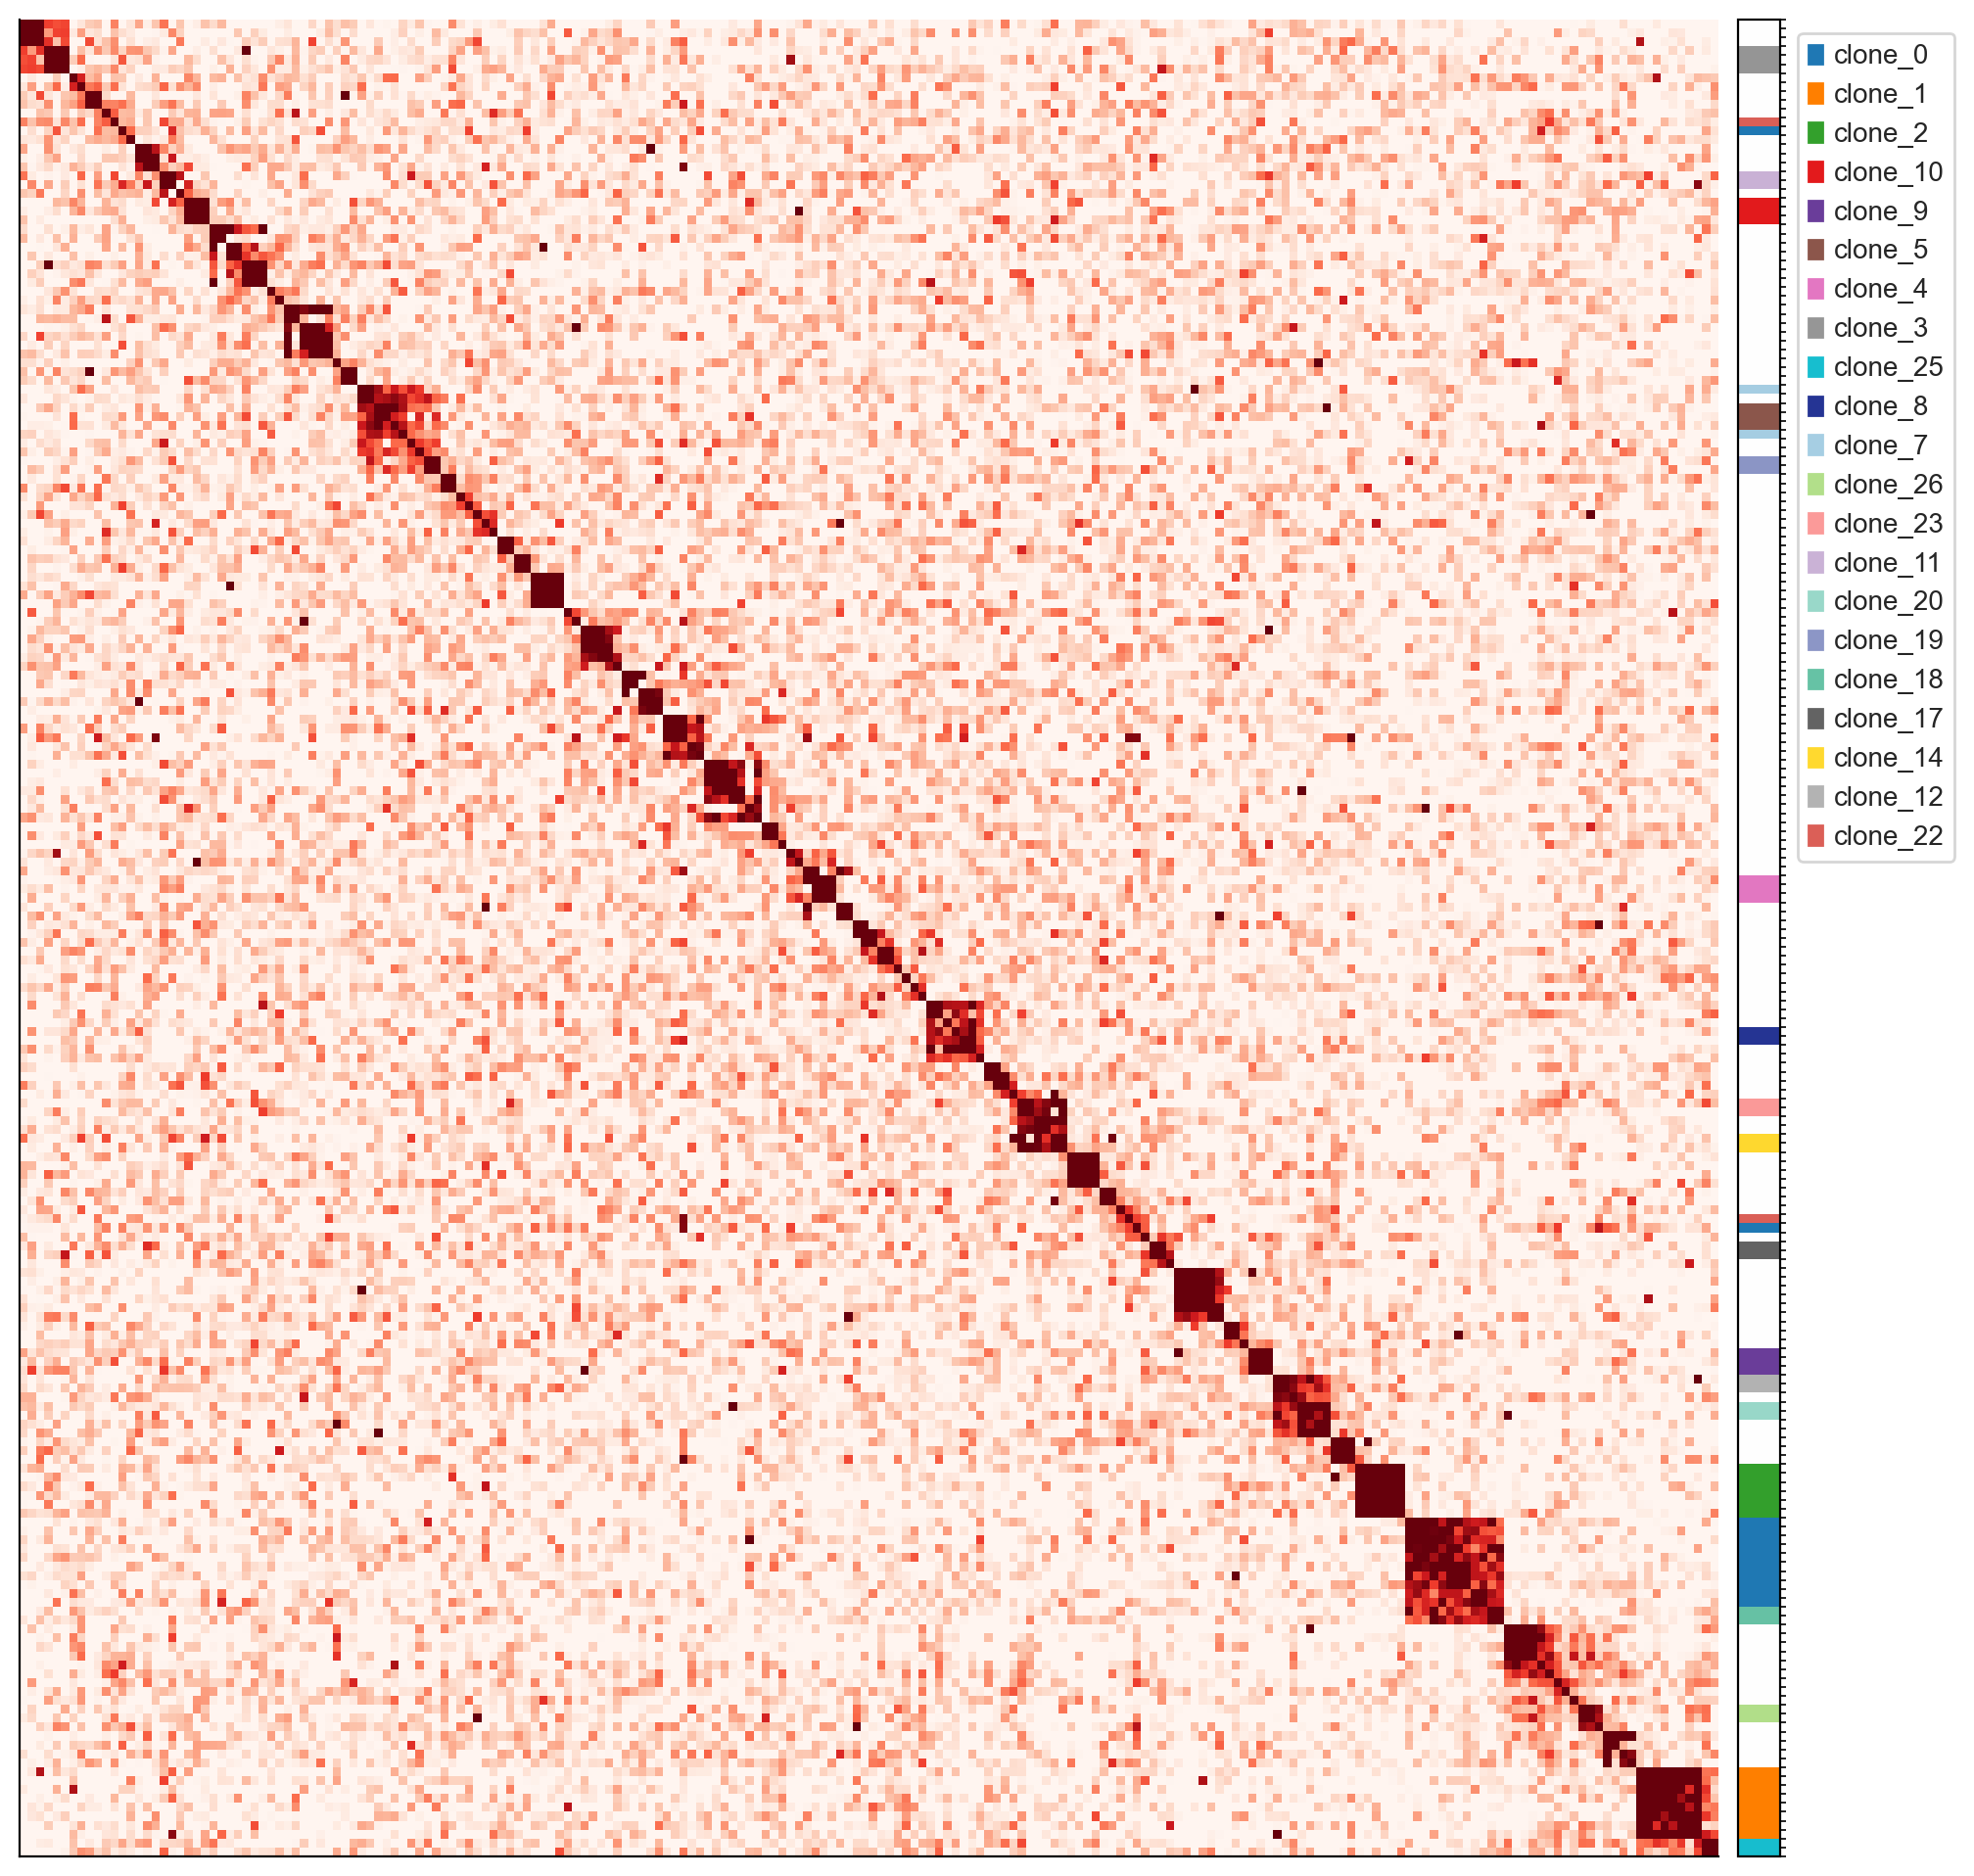

In [54]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## LL901

In [55]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL901_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (148, 155326)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:04<00:00, 31.33it/s]


duration: 5.033344030380249
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▊                                                                                                                                                                                                                                                         | 3/1000 [00:00<00:00, 1079.99it/s]


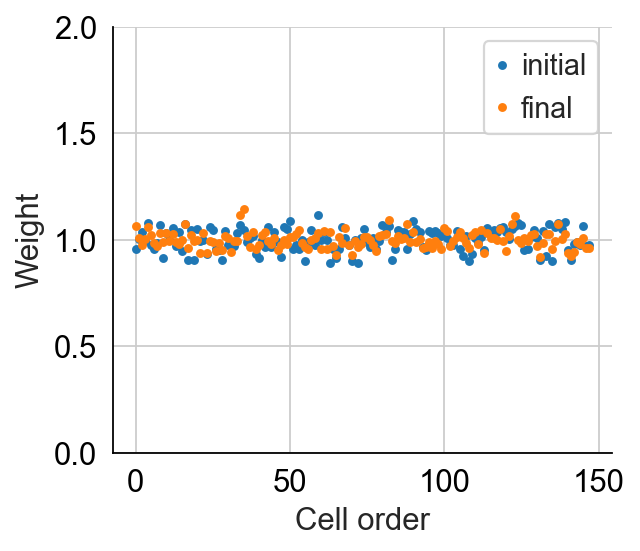

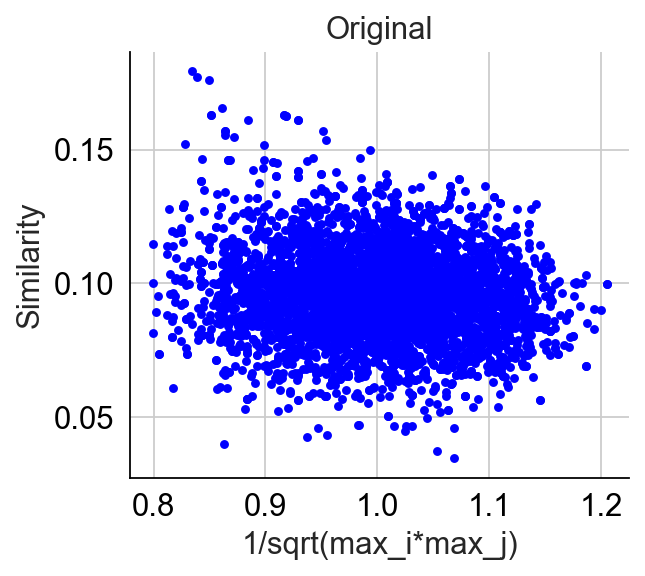

std: 0.008


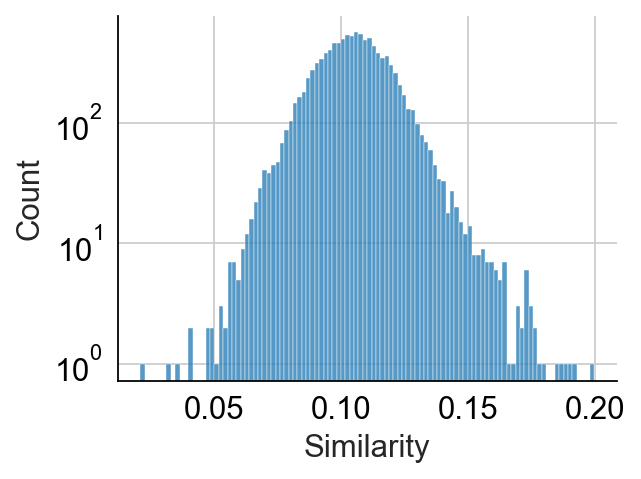

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity   entropy  wassertein  \
0   clone_0           5  0.600000    0.800000  0.418166    0.400000   
1   clone_1           3  0.666667    0.666667  0.579380    0.333333   
2  clone_10           2  1.000000    1.000000  0.000000    0.000000   
3  clone_11           2  1.000000    1.000000  0.000000    0.000000   
4  clone_14           2  1.000000    1.000000  0.000000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.120000               0.26        0.948319           0.600000  
1         0.133333               0.40        0.915876           0.566667  
2         0.000000               0.50        1.000000           0.500000  
3         0.200000               0.60        0.800000           0.400000  
4         0.000000               0.50        1.000000           0.500000  
mean continuity: 0.9380952380952381
mean accuracy: 0.9238095238095239
mean entropy: 0.11263757

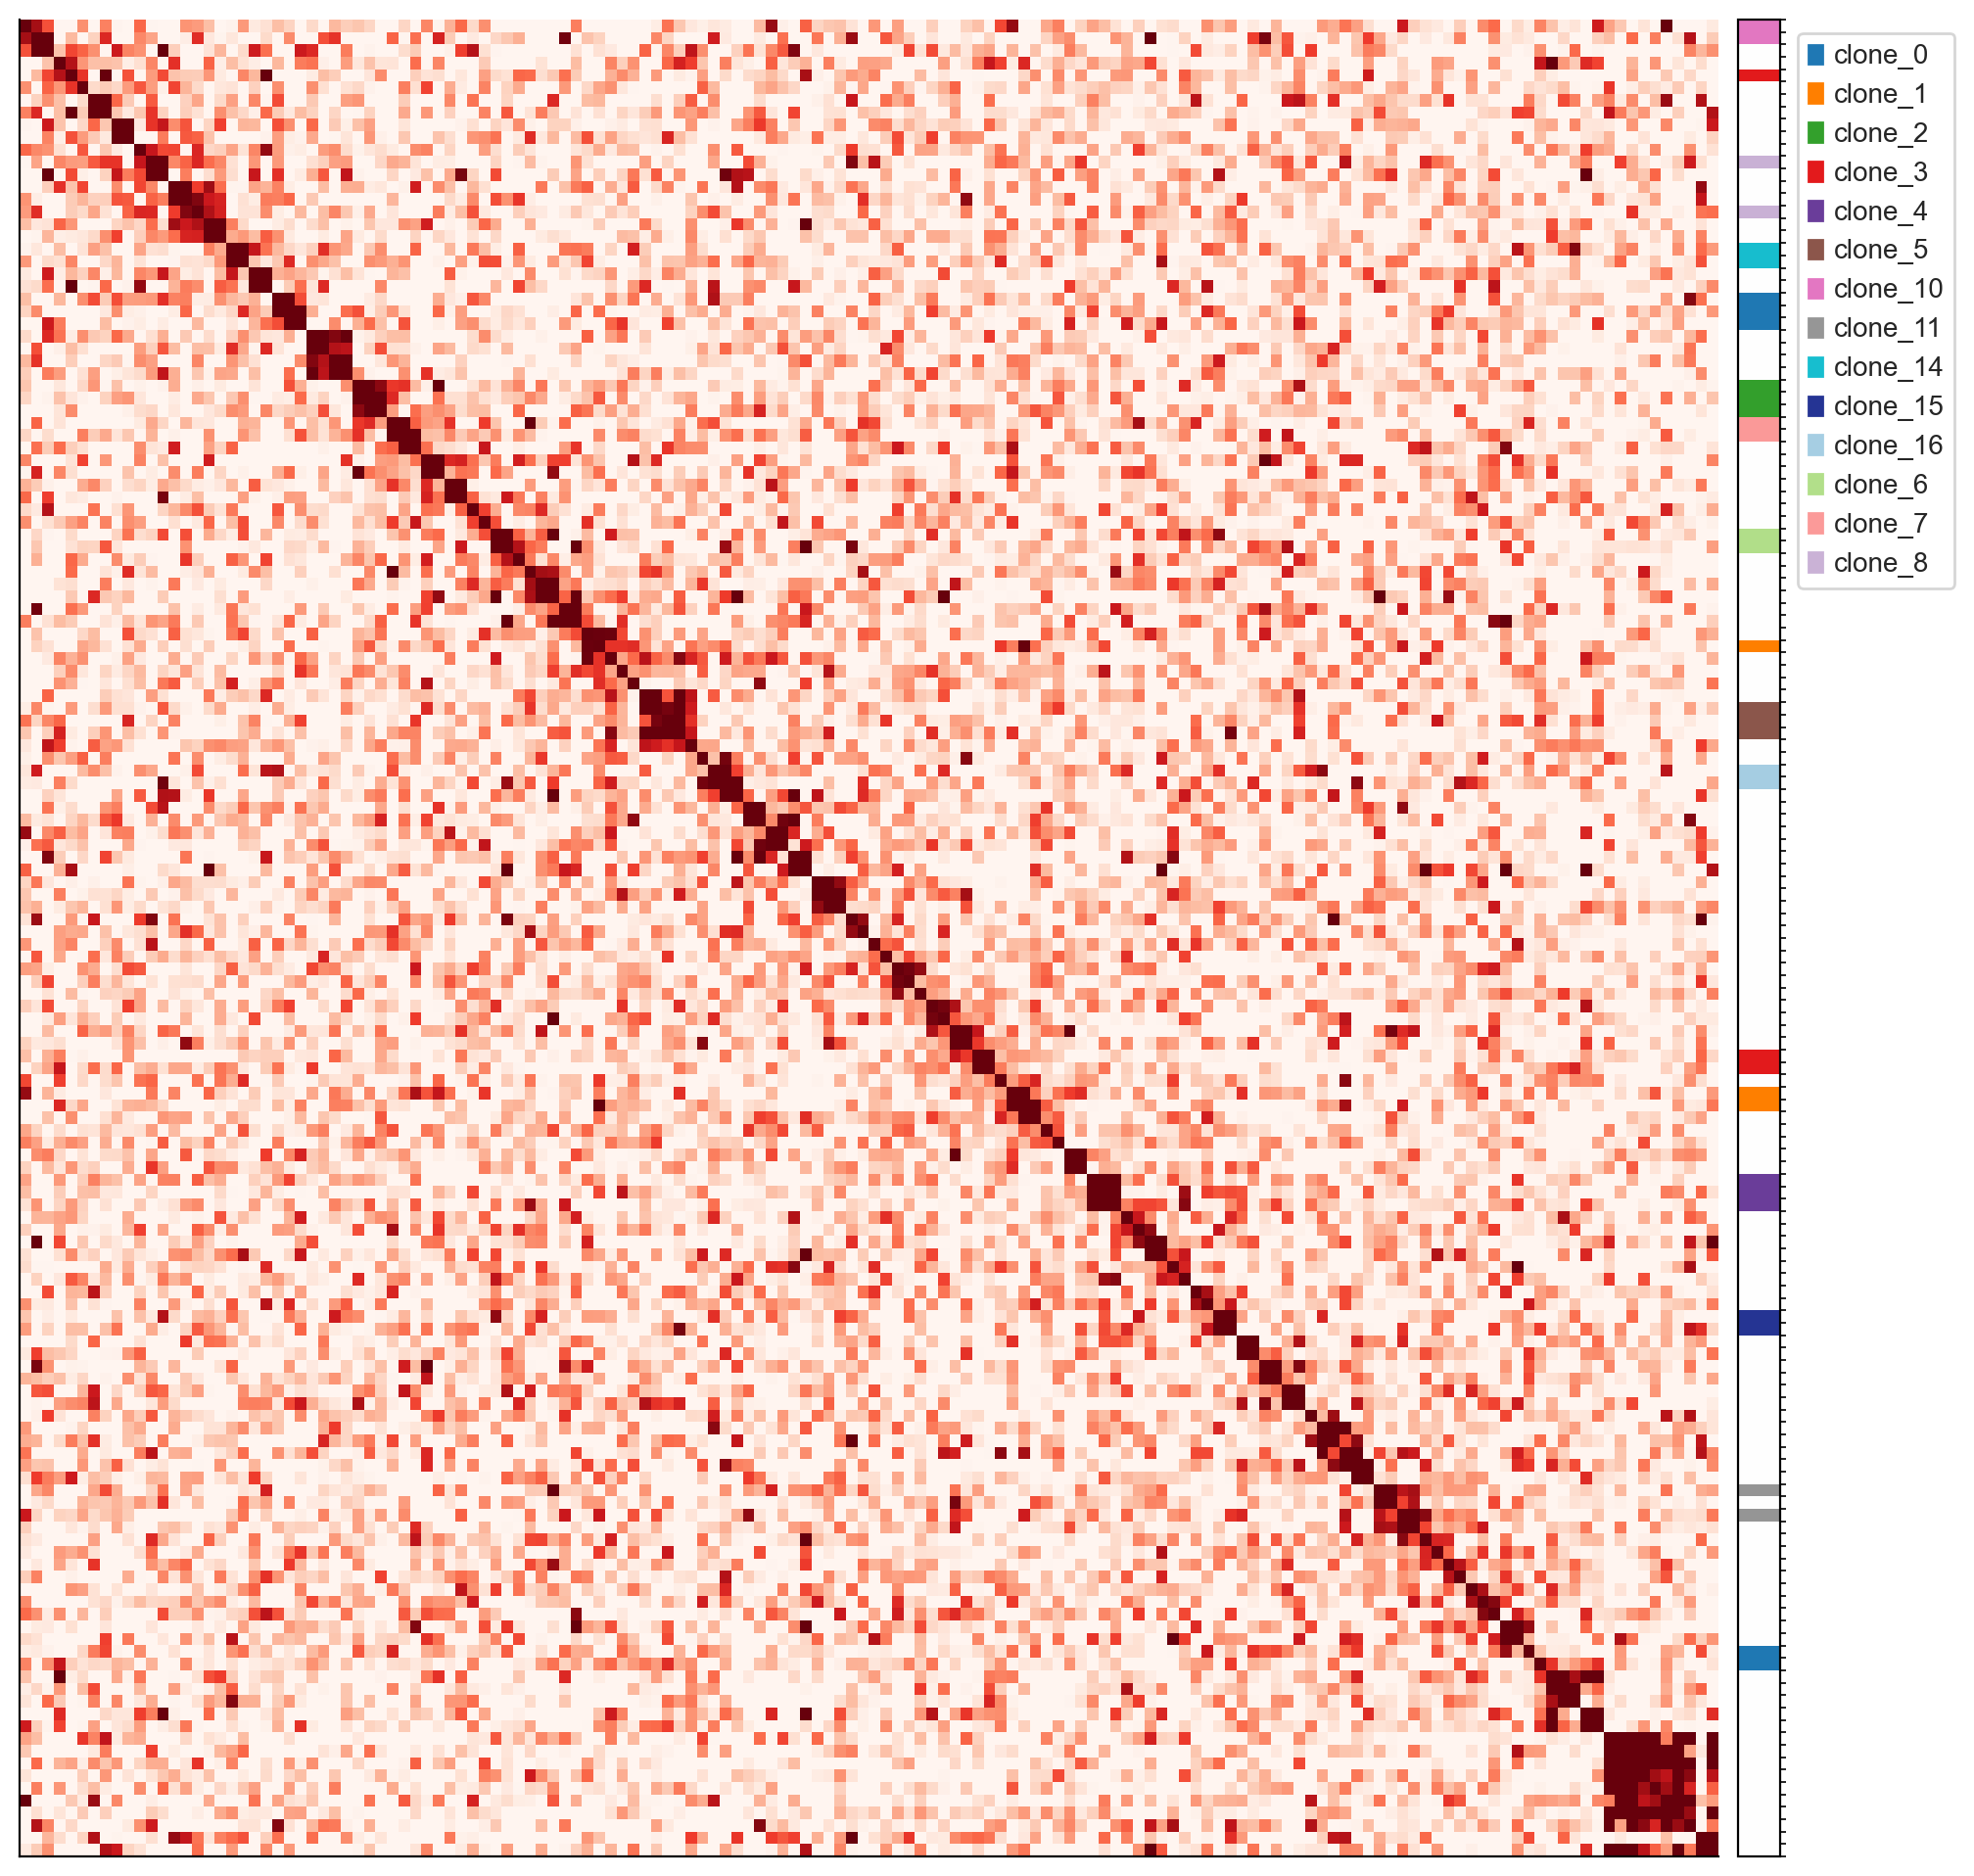

In [56]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## LL653E1

In [57]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL653E1_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (102, 181385)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102/102 [00:02<00:00, 37.53it/s]


duration: 2.9943931102752686
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▊                                                                                                                                                                                                                                                         | 3/1000 [00:00<00:00, 1567.18it/s]


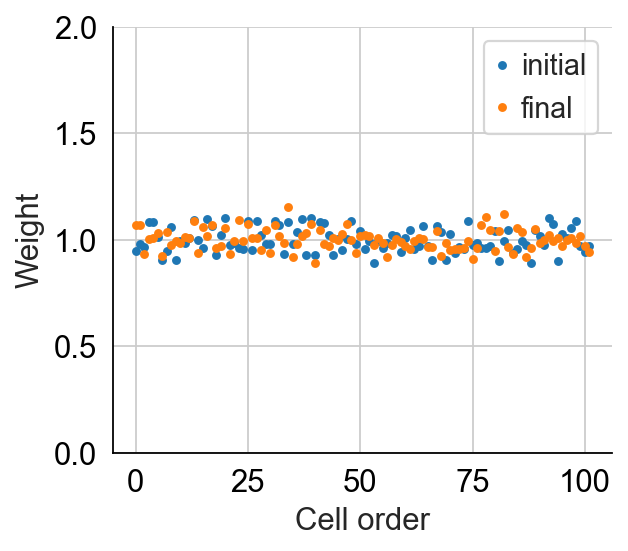

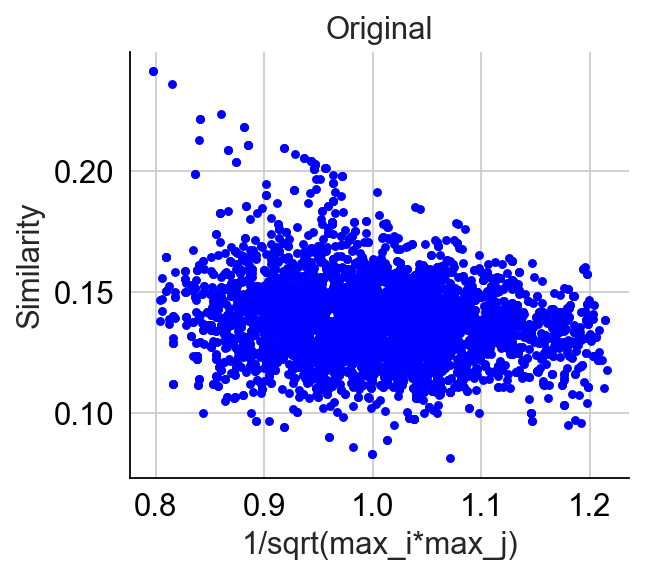

std: 0.014


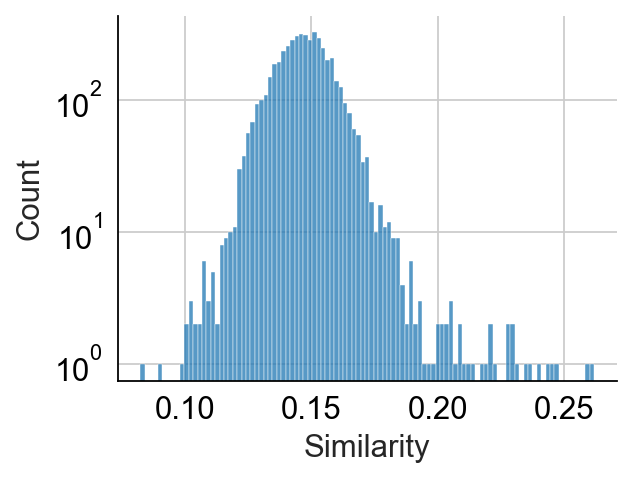

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0  clone_12           2       1.0         1.0      0.0         0.0   
1  clone_17           2       1.0         1.0      0.0         0.0   
2  clone_19           2       1.0         1.0      0.0         0.0   
3  clone_20           2       1.0         1.0      0.0         0.0   
4   clone_3           2       1.0         1.0      0.0         0.0   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0              0.1               0.55             0.9               0.45  
1              0.2               0.60             0.8               0.40  
2              0.1               0.55             0.9               0.45  
3              0.2               0.60             0.8               0.40  
4              0.3               0.65             0.7               0.35  
mean continuity: 1.0
mean accuracy: 1.0
mean entropy: 0.0
mean wassertein: 0.0
mean random_continuit

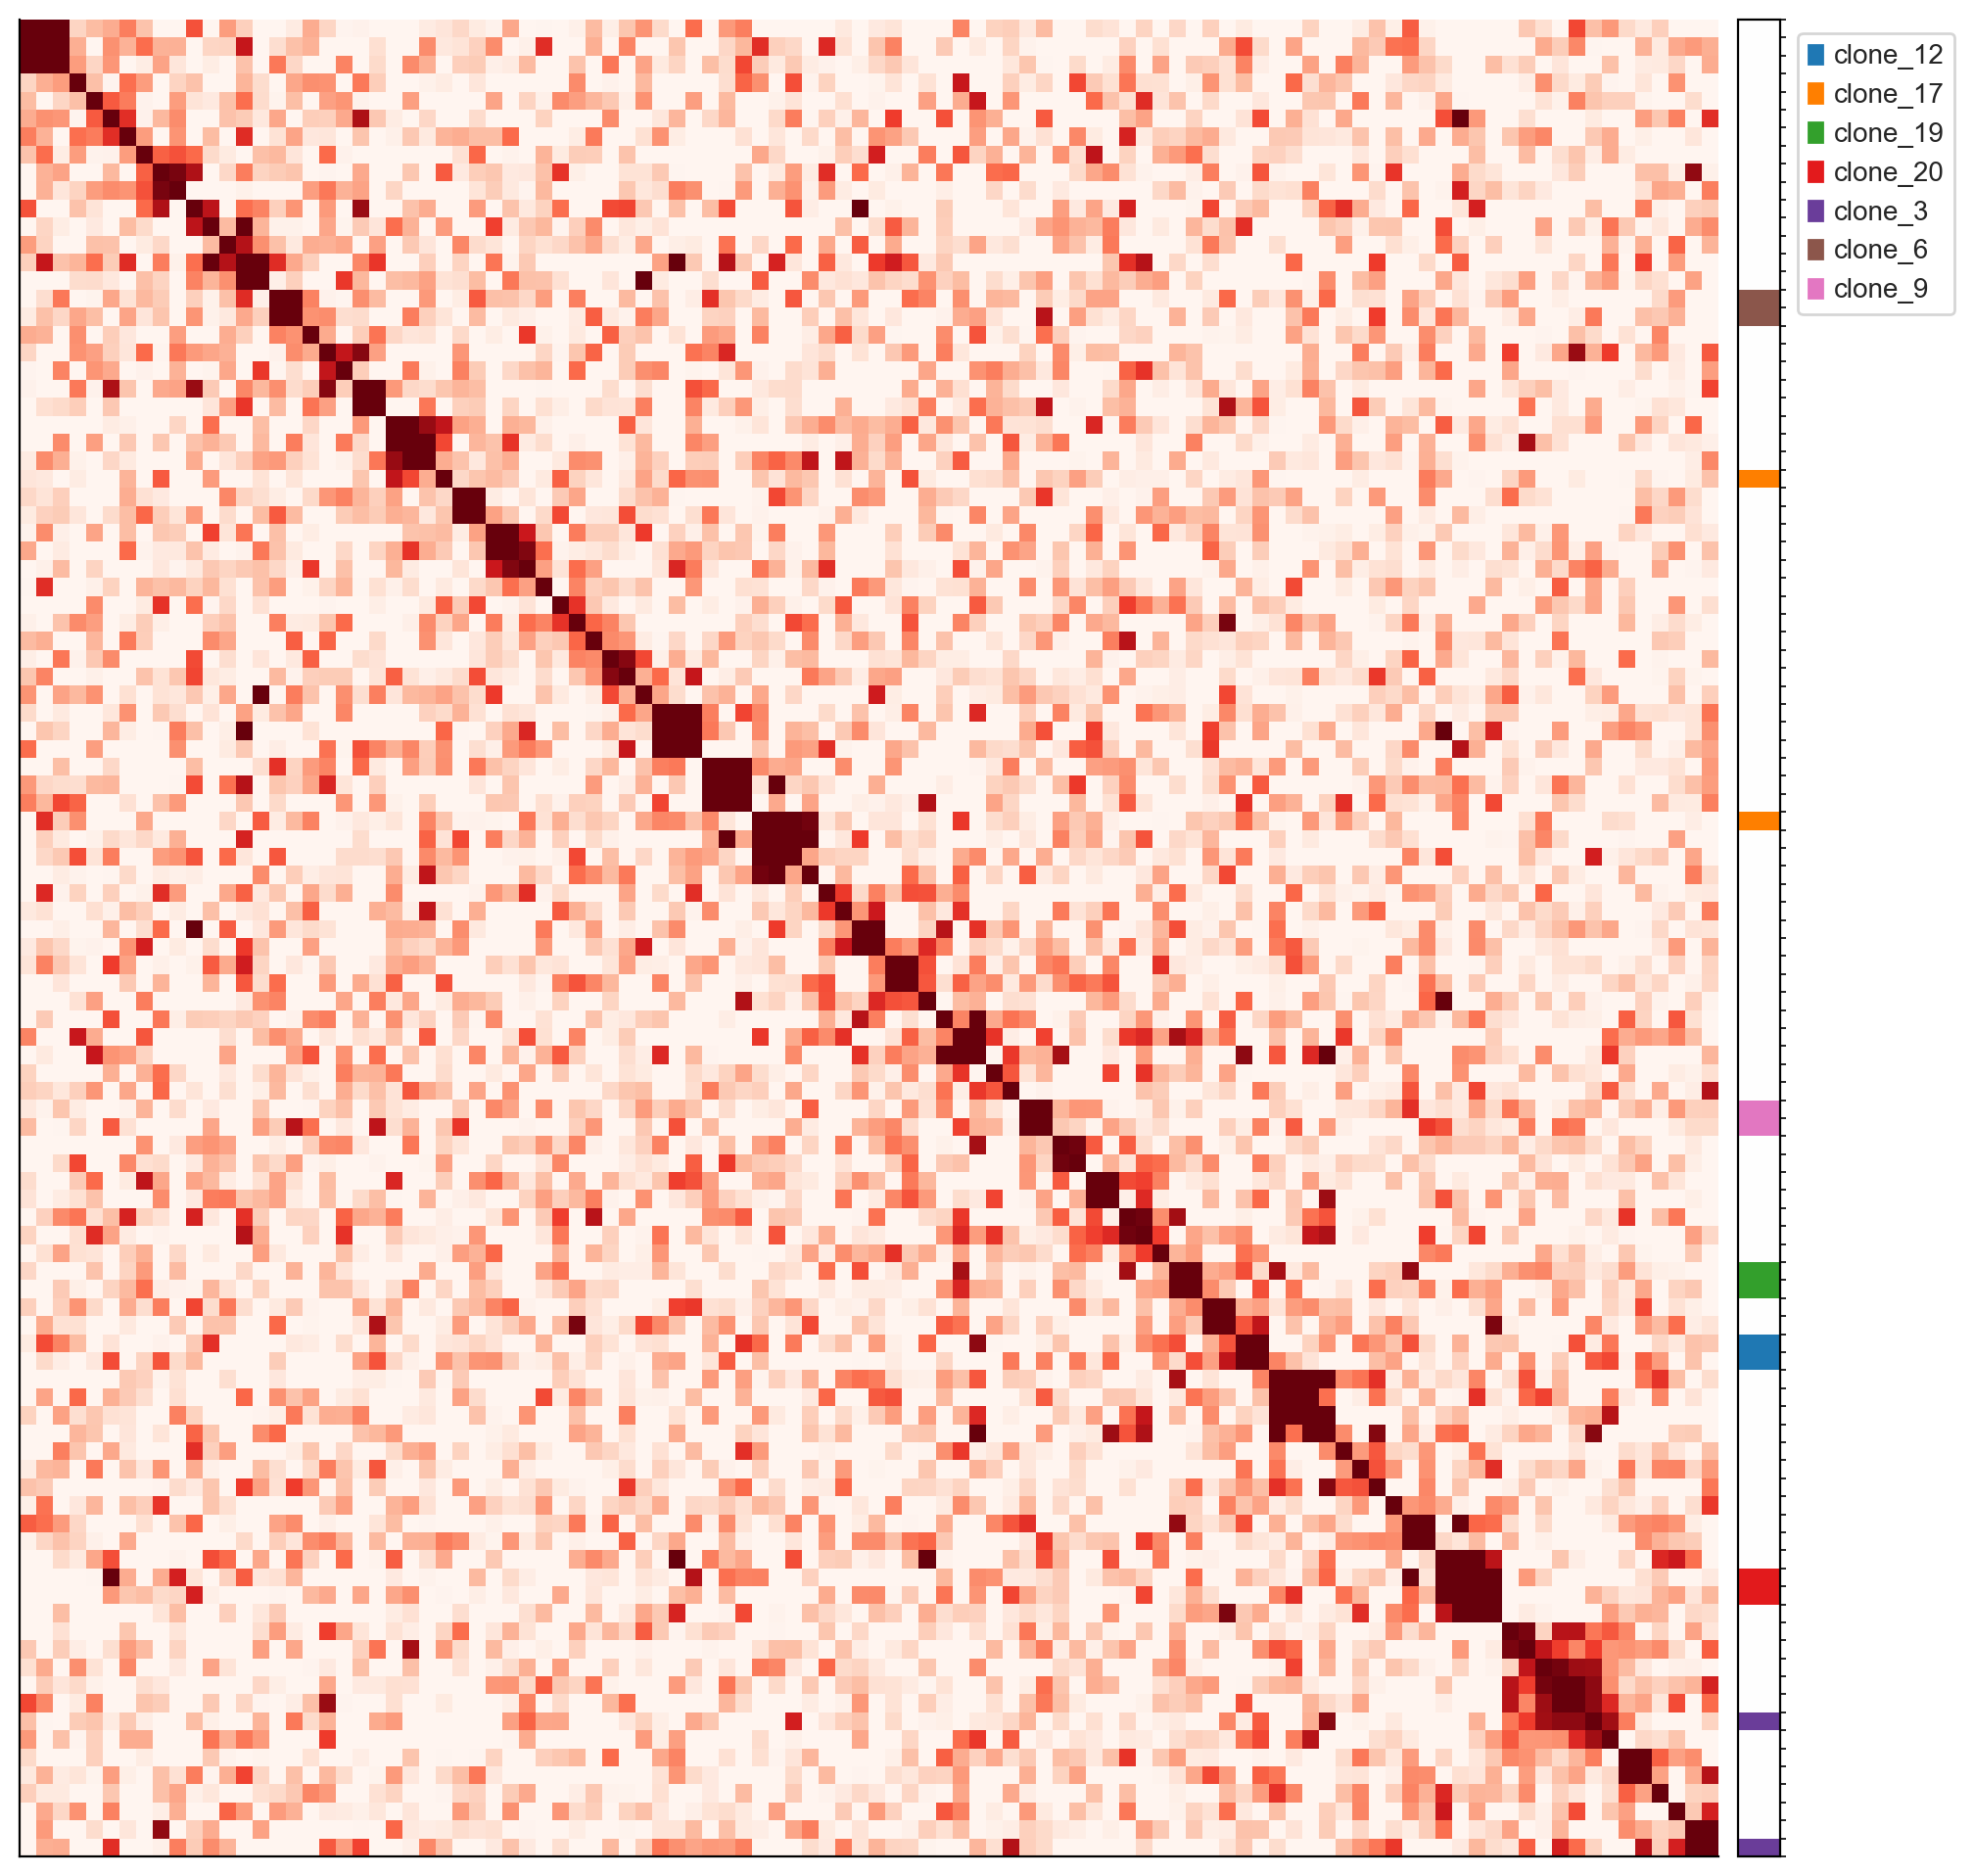

In [58]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)


## LL653E6

In [59]:
out_dir=f'{current_directory}/metadata/{data_sets}/downstream_R/out_dir'
adata = sc.read(f'{out_dir}/mouse_LL653E6_neutral_thresh_DARLIN_HSC_BM_0.66_0.92_readcutoff3_minCov0.1_met_ExcludeSex0.h5ad')

Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].
Only considering the two last: ['.1_met_ExcludeSex0', '.h5ad'].


use provided adata
adata shape:  (182, 193826)
X_similarity_correlation_fast_raw not found in adata.obsm
re-compute similarity matrix
Use correlation_fast for similarity
-------zero centered--------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:10<00:00, 18.06it/s]


duration: 10.602461099624634
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▊                                                                                                                                                                                                                                                          | 3/1000 [00:00<00:01, 867.79it/s]


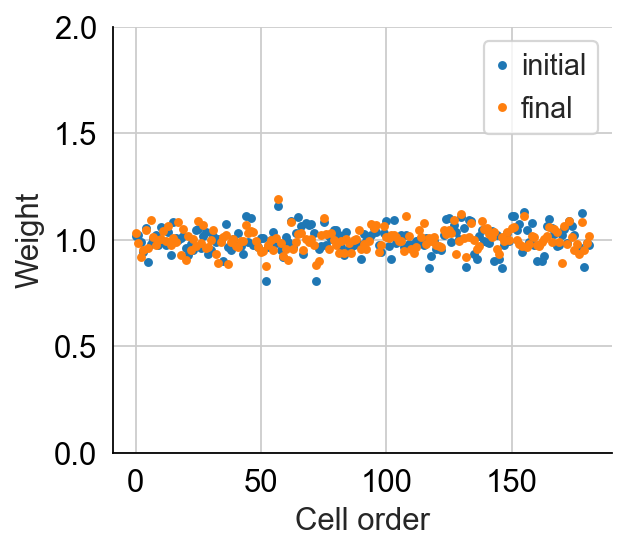

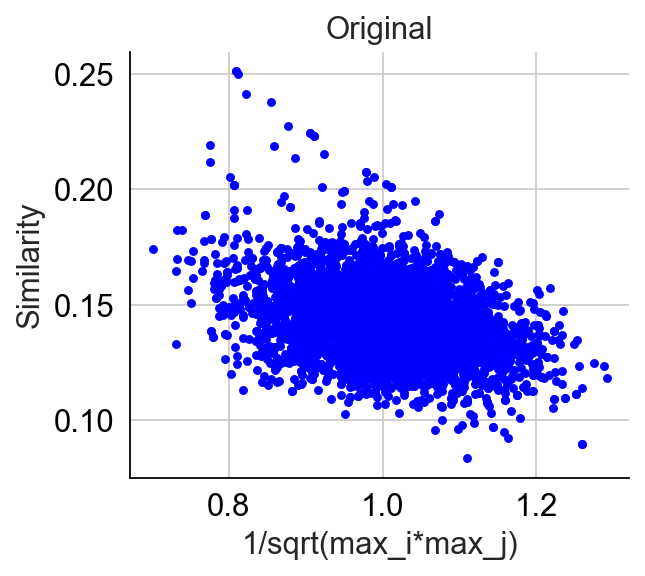

std: 0.013


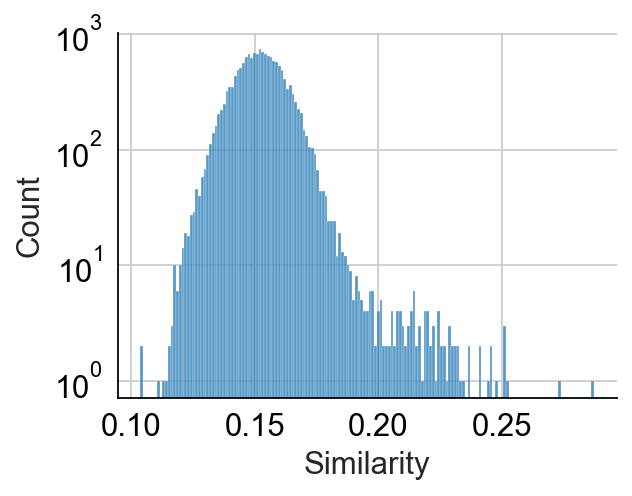

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0           4       0.5    0.500000     0.75    0.500000   
1   clone_1           3       0.0    0.333333     1.00    0.666667   
2  clone_10           2       0.0    0.500000     1.00    0.500000   
3  clone_11           2       0.0    0.500000     1.00    0.500000   
4  clone_12           2       1.0    1.000000     0.00    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.050000           0.275000        0.975000              0.575  
1         0.066667           0.366667        0.957938              0.600  
2         0.000000           0.500000        1.000000              0.500  
3         0.100000           0.550000        0.900000              0.450  
4         0.100000           0.550000        0.900000              0.450  
mean continuity: 0.8137254901960784
mean accuracy: 0.6764705882352942
mean entropy: 0.33823529411764

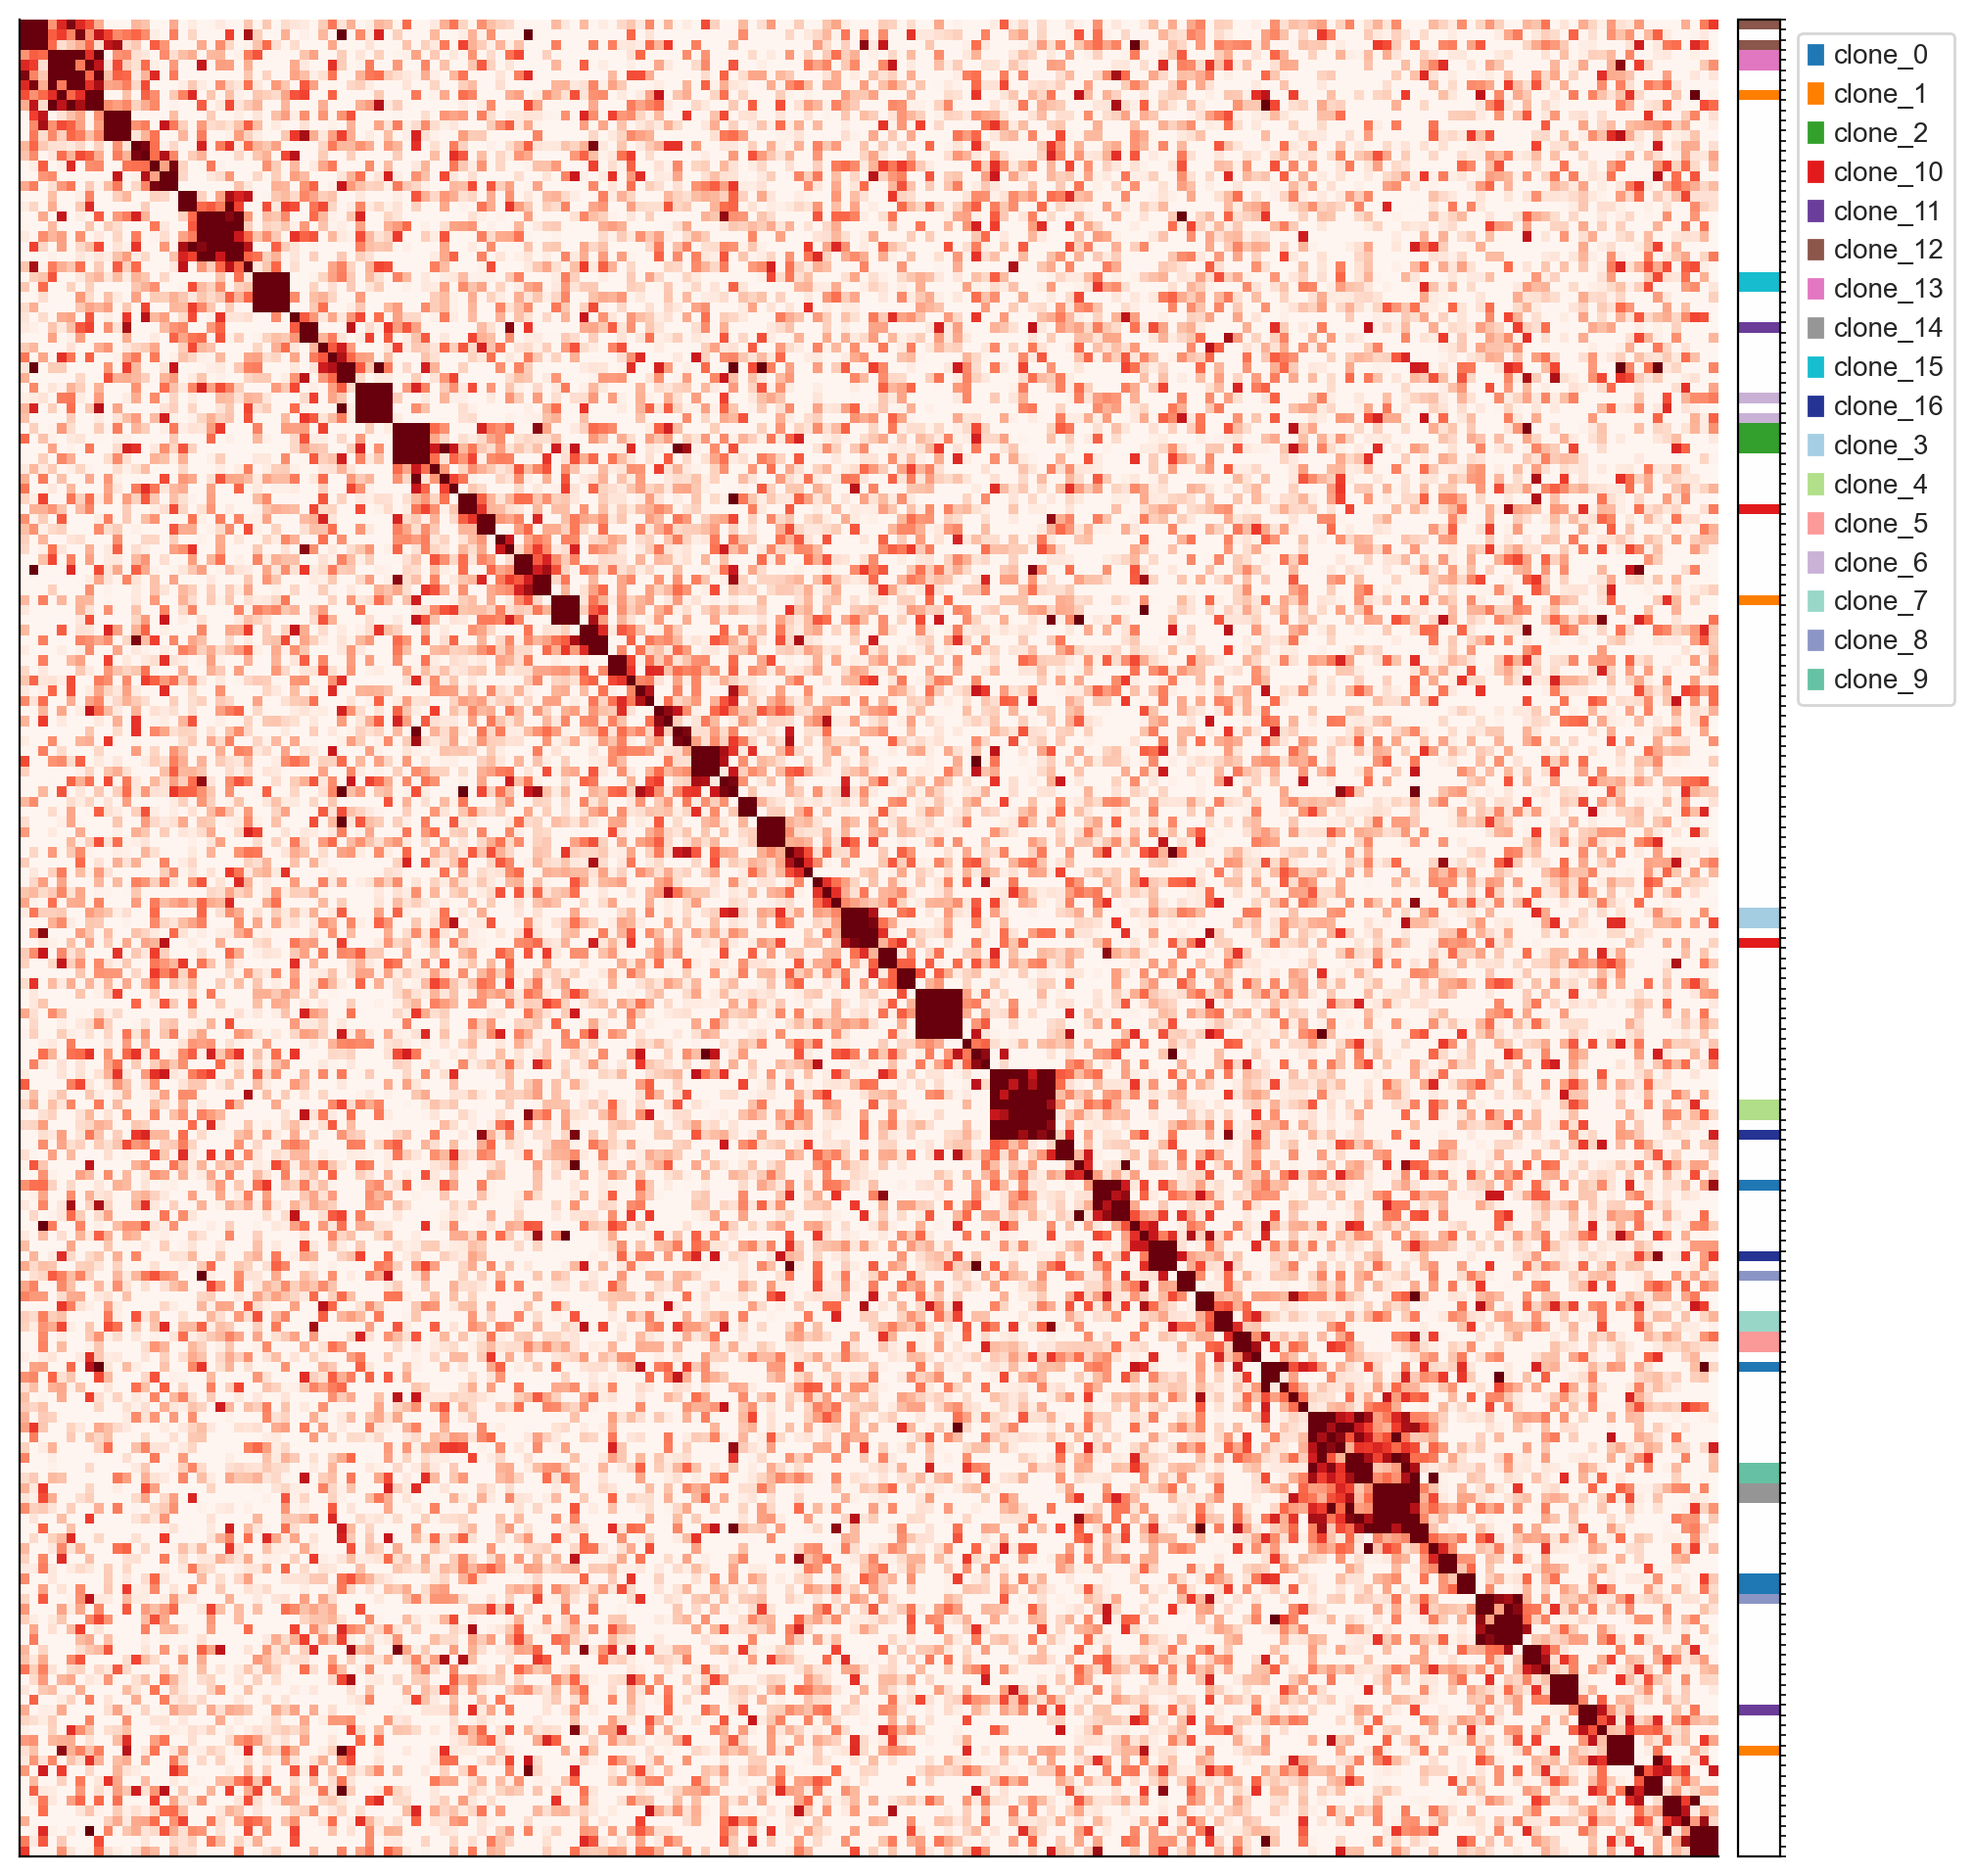

In [60]:
adata, statu_out = methyltree.analysis.comprehensive_lineage_analysis(
    out_dir,
    data_path,
    save_data_des=None,
    clone_key=clone_key,
    adata_orig=adata,
    compute_similarity=False,  # use pre-computed similarity
    similarity_method='correlation_fast',
    remove_celltype_signal=False,
    similarity_normalize=False,
    similarity_correction=True,
    perform_coarse_graining=False,
    fig_dir=None,
    heatmap_vmax_percentile=99.5,
    heatmap_vmin_percentile=40,
)
